In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pandas as pd
import math
import os

In [2]:
# make folder
if not os.path.isdir('figures'):
    os.makedirs('figures')

In [3]:
# make folder
if not os.path.isdir('./figures/tree_subgraph'):
    os.makedirs('./figures/tree_subgraph')

In [4]:
# make folder
if not os.path.isdir('./figures/cyclical_hybrid_subgraph'):
    os.makedirs('./figures/cyclical_hybrid_subgraph')

In [5]:
# make folder
if not os.path.isdir('./figures/components_graph'):
    os.makedirs('./figures/components_graph')

In [6]:
# make folder
if not os.path.isdir('indicators'):
    os.makedirs('indicators')

In [7]:
# load data
path = "./merge_data/merged_correlation_company_only.csv"
company_df = pd.read_csv(path)
display(company_df.head())

Stakeholders  3CNERGY LIMITED  \
0                         3CNERGY LIMITED              NaN   
1  8TELECOM INTL HOLDINGS COMPANY LIMITED              NaN   
2                A-SMART HOLDINGS LIMITED              NaN   
3               A-SONIC AEROSPACE LIMITED              NaN   
4               AA GROUP HOLDINGS LIMITED              NaN   

   8TELECOM INTL HOLDINGS COMPANY LIMITED  A-SMART HOLDINGS LIMITED  \
0                                     NaN                       NaN   
1                                     NaN                       NaN   
2                                     NaN                       NaN   
3                                     NaN                       NaN   
4                                     NaN                       NaN   

   A-SONIC AEROSPACE LIMITED  AA GROUP HOLDINGS LIMITED  ABR HOLDINGS LIMITED  \
0                        NaN                        NaN                   NaN   
1                        NaN                        NaN                   NaN   
2                        NaN                        NaN                   NaN   
3                        NaN                        NaN                   NaN   
4                        NaN                        NaN                   NaN   

   ABTERRA LIMITED  ABUNDANCE INTERNATIONAL LIMITED  \
0              NaN                              NaN   
1              NaN                              NaN   
2              NaN                              NaN   
3              NaN                              NaN   
4              NaN                              NaN   

   ACCORDIA GOLF TRUST MANAGEMENT PRIVATE LIMITED  ...  \
0                                             NaN  ...   
1                                             NaN  ...   
2                                             NaN  ...   
3                                             NaN  ...   
4                                             NaN  ...   

   YONGMAO HOLDINGS LIMITED  YONGNAM HOLDINGS LIMITED  \
0                       NaN                       NaN   
1                       NaN                       NaN   
2                       NaN                       NaN   
3                       NaN                       NaN   
4                       NaN                       NaN   

   YORKSHINE HOLDINGS LIMITED  YTL STARHILL GLOBAL REIT MANAGEMENT LIMITED  \
0                         NaN                                          NaN   
1                         NaN                                          NaN   
2                         NaN                                          NaN   
3                         NaN                                          NaN   
4                         NaN                                          NaN   

   YUNNAN ENERGY INTERNATIONAL COMPANY LIMITED  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   YUUZOO NETWORKS GROUP CORPORATION  \
0                                NaN   
1                                NaN   
2                                NaN   
3                                NaN   
4                                NaN   

   ZHENENG JINJIANG ENVIRONMENT HOLDING COMPANY LIMITED  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                                NaN      
4                                                NaN      

   ZHONGMIN BAIHUI RETAIL GROUP LIMITED  ZHONGXIN FRUIT AND JUICE LIMITED  \
0                                   NaN                               NaN   
1                                   NaN                               NaN   
2                                   NaN                               NaN   
3                                   NaN      

In [8]:
G2 = nx.MultiDiGraph()

In [9]:
listed_com_df = pd.read_csv("../raw_data/2018_stocklist_updated.csv")

In [10]:
listed_com_df.shape

(752, 7)

In [11]:
#  select the investment type we wanted
cond1 = listed_com_df["INVESTMENT_CHANNEL"] == "STOCKS"
cond2 = listed_com_df["INVESTMENT_CHANNEL"] == "REIT"
cond3 = listed_com_df["INVESTMENT_CHANNEL"] == "BTRUST"
cond4 = listed_com_df["INVESTMENT_CHANNEL"] == "OTHER"
filtered_df = listed_com_df[cond1 | cond2 | cond3 | cond4]

In [12]:
filtered_df.reset_index(inplace= True,drop=True)

In [13]:
filtered_df.head()

STOCK NAME                 STANDARDISED STOCK NAME CODE  \
0                3CNERGY LIMITED                         3CNERGY LIMITED  502   
1  8TELECOM INTL HOLDINGS CO LTD  8TELECOM INTL HOLDINGS COMPANY LIMITED  AZG   
2          A-SMART HOLDINGS LTD.                A-SMART HOLDINGS LIMITED  BQC   
3      A-SONIC AEROSPACE LIMITED               A-SONIC AEROSPACE LIMITED  BTJ   
4         AA GROUP HOLDINGS LTD.               AA GROUP HOLDINGS LIMITED  5GZ   

                                  ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
0  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   
1                                                NaN             STOCKS   
2  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   
3  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   
4  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

  DATA AVAILIABITY                  SECTOR  
0              Yes             Real Estate  
1               No  Information Technology  
2              Yes             Industrials  
3              Yes             Industrials  
4              Yes  Information Technology

In [14]:
invs_channel = filtered_df["INVESTMENT_CHANNEL"].tolist()
sectors = filtered_df["SECTOR"].tolist()

In [15]:
# number of company 
num_elements2 = len(company_df["Stakeholders"])
# convert company list to list
element_list2 = company_df["Stakeholders"].tolist()
# create node with number and name 
for i in range(num_elements2):
    G2.add_node(i ,name = element_list2[i],investment_channel = invs_channel[i],sector = sectors[i])

In [16]:
# set stakeholders as index 
company_df.set_index("Stakeholders", inplace=True)

In [17]:
# convert all the percentage numbers to float 
company_df.astype('float64').dtypes

3CNERGY LIMITED                                         float64
8TELECOM INTL HOLDINGS COMPANY LIMITED                  float64
A-SMART HOLDINGS LIMITED                                float64
A-SONIC AEROSPACE LIMITED                               float64
AA GROUP HOLDINGS LIMITED                               float64
                                                         ...   
YUUZOO NETWORKS GROUP CORPORATION                       float64
ZHENENG JINJIANG ENVIRONMENT HOLDING COMPANY LIMITED    float64
ZHONGMIN BAIHUI RETAIL GROUP LIMITED                    float64
ZHONGXIN FRUIT AND JUICE LIMITED                        float64
ZICO HOLDINGS INC                                       float64
Length: 724, dtype: object

In [18]:
# create 2 empty row
row_list2 = []
col_list2 = []

In [19]:
# add each pairing of stock buyer and stock seller
# row = seller
# col = buyer
for row in element_list2:
    for column in element_list2:
        item = company_df.loc[row, column]
        if math.isnan(item) == False:
            print(item)
            row_list2.append(row)
            col_list2.append(column)

25.98
41.74
41.74
26.43
36.62
42.55
7.93
5.27
9.62
9.51
2.33
20.7
28.93
22.24
8.54
44.91
1.05
10.23
18.13
1.28
1.29
35.47
52.98
6.92
18.0
1.91
4.4
30.06
0.77
40.37
28.45
1.32
0.5
37.45
5.34
5.37
0.72
18.09
9.04
54.98
34.01
41.48
5.32
17.75
78.94
77.59
29.93
40.98
0.53
24.43
29.91
1.75
0.8
10.1
3.94
35.79
28.48
4.31
42.01
11.6
25.5
1.06
24.28
0.29
21.01
28.33
0.54
10.3
87.9
42.55
0.32
9.83
1.94
11.99
16.32
2.23
28.66
2.05
50.41
11.97
16.2
14.02
5.1110000000000015
15.21
75.0
57.95
84.43
10.94
27.89
69.64
20.0
21.19
25.23
0.57
25.23
15.86
7.72
3.93
47.74
0.48
0.44
71.07
15.12
39.81
14.9
0.6
0.74
6.19
54.85
78.16
6.0
34.74
0.54
33.58
36.71
3.63
33.38
64.72
32.42
47.04
20.0
9.83
5.48
24.79
2.67
53.64
56.2
64.35
35.52
0.38
6.24
20.04
3.92
7.97
0.73
40.01
74.45
6.82
49.53
61.01
0.88
0.75
0.46
77.8
1.8
55.71
2.9
21.83
0.27
9.5
22.6
16.8
13.3
4.02
8.05
8.42
6.01
6.01
51.99
52.35
73.93
80.19
69.58
56.11
83.17
63.95
63.28
50.38
8.56
19.58
36.52
50.1
4.33
58.39
76.79
38.87
8.55
7.1
67.06
0.57
81.1

In [20]:
print(row_list2)
print("===============")
print(col_list2)

['ADVANCED SYSTEMS AUTOMATION LIMITED', 'AF GLOBAL LIMITED', 'AF GLOBAL LIMITED', 'ALPHA ENERGY HOLDINGS LIMITED', 'ALUMINUM CORP OF CHINA', 'AOXIN Q & M DENTAL GRP LIMITED', 'APTT MANAGEMENT PRIVATE LIMITED', 'ARA TRUST MANAGEMENT (CACHE) LIMITED', 'ARA TRUST MANAGEMENT (CACHE) LIMITED', 'ARA TRUST MANAGEMENT (SUNTEC) LIMITED', 'ASCENDAS FUNDS MANAGEMENT SINGAPORE LIMITED', 'ASCENDAS FUNDS MANAGEMENT SINGAPORE LIMITED', 'ASCENDAS HOSPITALITY FUND MANAGEMENT PRIVATE LIMITED', 'ASCENDAS PROPERTY FUND TRUSTEE PRIVATE LIMITED', 'ASCOTT RESIDENCE TRUST MANAGEMENT LIMITED', 'ASCOTT RESIDENCE TRUST MANAGEMENT LIMITED', 'ASCOTT RESIDENCE TRUST MANAGEMENT LIMITED', 'ASPEN (GROUP) HOLDINGS LIMITED', 'AUSGROUP LIMITED', 'AYONDO LIMITED', 'BHG RETAIL TRUST MANAGEMENT PRIVATE LIMITED', 'BIOLIDICS LIMITED', 'BOUSTEAD PROJECTS LIMITED', 'BOWSPRIT CAPITAL CORPORATION LIMITED', 'BOWSPRIT CAPITAL CORPORATION LIMITED', 'CAPITAL WORLD LIMITED', 'CAPITALAND COMMERCIAL TRUST MANAGEMENT LIMITED', 'CAPITALAN

### Legend

<table style="width:100%">
  <tr>
    <th style="text-align:center">Nodes</th>
    <th style="text-align:center">Edges</th>
    <th style="text-align:center">Weights</th>
  </tr>
  <tr>
    <td style="text-align:center">Represent the StakeHolders</td>
    <td style="text-align:center"> ( --> ) <br/>The nodes that the arrow points to shows who bought the shares</td>
    <td style="text-align:center">Represent the Percentage bought</td>
  </tr>

</table>

### Add edges

In [21]:
for i in range(len(row_list2)): 
    item = company_df.loc[row_list2[i], col_list2[i]]
    row_index = element_list2.index(row_list2[i])
    col_index = element_list2.index(col_list2[i])
    print(col_index , row_index,item)
#     add edge

# ------------------TODO need to check ---------------
# row_index--> col_index or col_index --> row_index----
# ===============currently===========================

# col_index(company) ---(buys)---> row_index(company)
# --------------------------------------------------
    G2.add_edge(col_index, row_index, weight = item)

65 16 25.98
63 21 41.74
218 21 41.74
204 29 26.43
30 30 36.62
513 39 42.55
639 42 7.93
510 44 5.27
644 44 9.62
644 45 9.51
48 48 2.33
639 48 20.7
639 49 28.93
639 50 22.24
51 51 8.54
105 51 44.91
639 51 1.05
482 62 10.23
204 67 18.13
611 73 1.28
82 82 1.29
152 83 35.47
90 89 52.98
91 91 6.92
477 91 18.0
661 103 1.91
104 104 4.4
105 104 30.06
639 104 0.77
639 105 40.37
105 106 28.45
106 106 1.32
639 106 0.5
105 107 37.45
107 107 5.34
510 107 5.37
639 107 0.72
639 111 18.09
649 111 9.04
75 114 54.98
208 114 34.01
204 116 41.48
85 118 5.32
480 119 17.75
88 155 78.94
331 169 77.59
639 173 29.93
65 180 40.98
348 184 0.53
639 184 24.43
316 185 29.91
187 187 1.75
201 201 0.8
173 206 10.1
212 212 3.94
150 215 35.79
640 219 28.48
220 220 4.31
224 220 42.01
221 221 11.6
224 221 25.5
222 222 1.06
224 222 24.28
223 223 0.29
224 223 21.01
640 224 28.33
226 226 0.54
550 233 10.3
480 251 87.9
513 253 42.55
583 265 0.32
677 265 9.83
678 265 1.94
173 278 11.99
173 281 16.32
573 281 2.23
677 281 28.66
1

Number of company analysed = 670

In [22]:
print("number of nodes : {}".format(num_elements2))

number of nodes : 724


In [23]:
print("number of edges : {}".format(len(G2.edges())))

number of edges : 183


In [24]:
missing_companies = num_elements2 - 670
print("missing companies:",missing_companies)

missing companies: 54


In [25]:
invest_df = filtered_df["INVESTMENT_CHANNEL"]

In [26]:
invest_types = invest_df.value_counts()
print(invest_types)

STOCKS    675
REIT       43
BTRUST      5
OTHER       1
Name: INVESTMENT_CHANNEL, dtype: int64


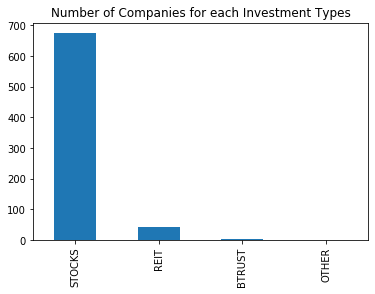

In [27]:
ax = invest_types.plot(kind='bar',title = "Number of Companies for each Investment Types")
plt.savefig("./figures/investment_types.png")

In [28]:
sec_df = filtered_df["SECTOR"]
print(len(sec_df))

724


In [29]:
sector_types = sec_df.value_counts()
print(sector_types)

Industrials               214
Real Estate               113
Consumer Discretionary    101
Information Technology     63
Energy                     50
Materials                  45
Consumer Staples           42
Financials                 35
Health Care                33
Communication Services     18
Utilities                  10
Name: SECTOR, dtype: int64


In [30]:
sector_df = pd.DataFrame(sector_types)

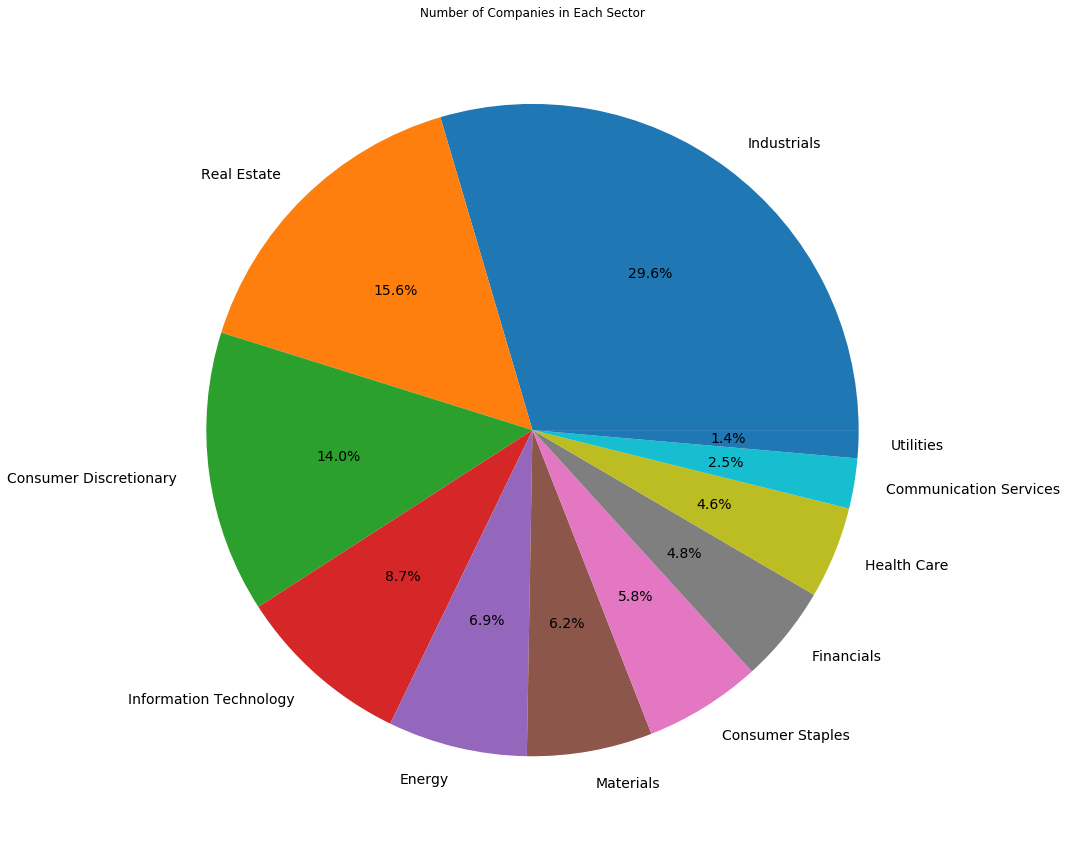

In [31]:
plt.figure(figsize=(15,15))
ax2 = plt.subplot(aspect='equal')
sector_df.plot(kind='pie',y = "SECTOR" ,ax = ax2,autopct='%1.1f%%', title = "Number of Companies in Each Sector",legend = False,fontsize=14)
ax2.axes.get_yaxis().set_visible(False)
plt.savefig("./figures/sector_types.png")
# plt.show()

### Set Variable for visualisation

In [32]:
name = nx.get_node_attributes(G2,'name')
sector = nx.get_node_attributes(G2,'sector')
investment_ch = nx.get_node_attributes(G2,'investment_channel')
arc_weight=nx.get_edge_attributes(G2,'weight')
removed_key_edges = dict()
for i,a in arc_weight.items():
    key = i[:2]
    removed_key_edges[key] = a

### IN, OUT and Total Degree

In [33]:
in_out_degree_df = pd.DataFrame(columns=["name","in_degree","out_degree","total_degree"])
for item in range(num_elements2):
    in_out_degree_df = in_out_degree_df.append({"name":name[item],"out_degree":G2.out_degree(item),"in_degree":G2.in_degree(item),"total_degree":G2.degree(item)},ignore_index = True)
in_out_degree_df.to_csv("./indicators/in_out_degree.csv")

In [34]:
in_out_degree_df[["name","total_degree"]].sort_values("total_degree",ascending=False).head(5)

name total_degree
639    TEMASEK HOLDINGS PRIVATE LIMITED           35
582    SINGAPORE PRESS HOLDINGS LIMITED            9
348          KEPPEL CORPORATION LIMITED            8
677        UNITED OVERSEAS BANK LIMITED            8
331  JARDINE STRATEGIC HOLDINGS LIMITED            6

In [35]:
in_out_degree_df[["name","in_degree"]].sort_values("in_degree",ascending=False).head()

name in_degree
582                  SINGAPORE PRESS HOLDINGS LIMITED         6
107  CAPITALAND RETAIL CHINA TRUST MANAGEMENT LIMITED         4
583         SINGAPORE REINSURANCE CORPORATION LIMITED         3
106          CAPITALAND MALL TRUST MANAGEMENT LIMITED         3
352                    KEPPEL REIT MANAGEMENT LIMITED         3

In [35]:
in_out_degree_df[["name","out_degree"]].sort_values("out_degree",ascending=False).head()

name out_degree
639    TEMASEK HOLDINGS PRIVATE LIMITED         35
677        UNITED OVERSEAS BANK LIMITED          7
348          KEPPEL CORPORATION LIMITED          7
331  JARDINE STRATEGIC HOLDINGS LIMITED          5
173          DBS GROUP HOLDINGS LIMITED          4

### Graph Density

m = number of edges
<br>
n = number of nodes

density = m/(n * (n-1))
<br/>
Check if the graph is a dense or a sparse graph
<br/>
Answer:Sparse

In [36]:
density = nx.density(G2)
print("density:",density)

density: 0.00034960225579422756


### Cyclical Nodes

Check the number of cycles it have using Johnson's Algorithm to determine if cross share holdings exist

In [37]:
#Johnson's algorithm
# single element list means self loop
for i in nx.simple_cycles(G2):
    print(i)

[30]
[48]
[51]
[82]
[91]
[104]
[106]
[107]
[187]
[201]
[212]
[220]
[221]
[222]
[223]
[226]
[352]
[387]
[397]
[405]
[407]
[494]
[534]
[543]
[717]
[330, 331]
[265, 677, 678, 583]
[265, 677, 678]
[265, 677, 583]
[265, 677]


### Percentage of isolated nodes

In [38]:
have_degrees = []
no_degrees = []
for n_degree in nx.degree(G2):
    if n_degree[1] != 0:
        have_degrees.append(n_degree[0])
    else:
        no_degrees.append(n_degree[0])

In [39]:
length_degree = len(nx.degree(G2))
# print(length_degree)

# print(total_company)
have_degree_ratio = len(have_degrees)/ length_degree
no_degree_ratio = len(no_degrees)/ length_degree
print("Isolated Percentage",no_degree_ratio )
print("Non isolated Percentage",have_degree_ratio)

Isolated Percentage 0.7458563535911602
Non isolated Percentage 0.2541436464088398


### Centrailty Measures

#### Degree Centrality

In [41]:
degreeCentrality = nx.degree_centrality(G2)

In [42]:
sorted_degree_count = dict(sorted(degreeCentrality.items(), key=lambda x: x[1],reverse=True))

In [43]:
degree_centrality_df = pd.DataFrame(columns=["Name","Degree Centrality"])
for key, value in sorted_degree_count.items() :
    degree_centrality_df = degree_centrality_df.append({'Name':name[key],"Degree Centrality":value},ignore_index = True)
display(degree_centrality_df.head())

Name  Degree Centrality
0    TEMASEK HOLDINGS PRIVATE LIMITED           0.048409
1    SINGAPORE PRESS HOLDINGS LIMITED           0.012448
2          KEPPEL CORPORATION LIMITED           0.011065
3        UNITED OVERSEAS BANK LIMITED           0.011065
4  JARDINE STRATEGIC HOLDINGS LIMITED           0.008299

#### Page Rank

In [44]:
reverse_G2 = G2.reverse()
pagerank = nx.pagerank_numpy(reverse_G2,weight="weight")
sorted_pagerank_count = dict(sorted(pagerank.items(), key=lambda x: x[1],reverse=True))

In [45]:
pagerank_centrality_df = pd.DataFrame(columns=["Name","PageRank"])
for key, value in sorted_pagerank_count.items() :
    pagerank_centrality_df = pagerank_centrality_df.append({'Name':name[key],"PageRank":value},ignore_index = True)
display(pagerank_centrality_df.head(10))
pagerank_centrality_df.to_csv("./indicators/pagerank.csv",index=False)

Name  PageRank
0           TEMASEK HOLDINGS PRIVATE LIMITED  0.035419
1               UNITED OVERSEAS BANK LIMITED  0.020667
2                HAW PAR CORPORATION LIMITED  0.019446
3         JARDINE STRATEGIC HOLDINGS LIMITED  0.019126
4          JARDINE MATHESON HOLDINGS LIMITED  0.017268
5  EC WORLD ASSET MANAGEMENT PRIVATE LIMITED  0.006740
6                   LMIRT MANAGEMENT LIMITED  0.006740
7                     ALUMINUM CORP OF CHINA  0.006740
8     ESR FUNDS MANAGEMENT SINGAPORE LIMITED  0.006740
9                M&C REIT MANAGEMENT LIMITED  0.006740

### Creating Legends

Real Estate #D6FF79
Information Technology #B0FF92
Industrials #FFF2F1
Consumer Discretionary #A09BE7
Communication Services #5F00BA
Energy #EF767A
Materials #456990
Health Care #49BEAA
Financials #49DCB1
Consumer Staples #EEB868
Utilities #877B66


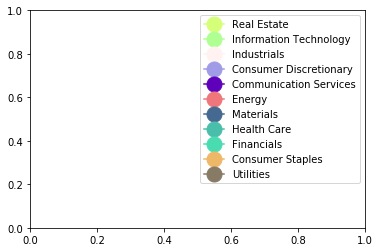

In [46]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
patches = []
sectors_unique = filtered_df["SECTOR"].unique()
unique_colors = ["#D6FF79","#B0FF92","#FFF2F1","#A09BE7",
                 "#5F00BA","#EF767A","#456990","#49BEAA",
                 "#49DCB1","#EEB868","#877B66"]
for index in range(len(unique_colors)):
    print(sectors_unique[index],unique_colors[index])
    patches.append(mlines.Line2D([], [], color=unique_colors[index], marker='o',
                          markersize=15, label=sectors_unique[index]))

plt.legend(handles=patches)

plt.show()

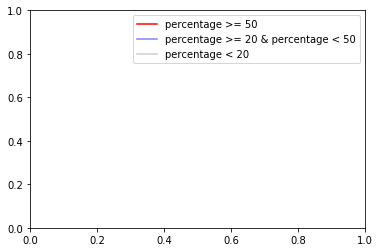

In [47]:
red_line = mlines.Line2D([], [], color='red', marker='',
                          markersize=20, label='percentage >= 50',alpha = 1)
blue_line = mlines.Line2D([], [], color='blue', marker='',
                          markersize=10, label='percentage >= 20 & percentage < 50',alpha = 0.5)
black_line = mlines.Line2D([], [], color='black', marker='',
                          markersize=5, label='percentage < 20',alpha = 0.2)
lines_legend = [red_line,blue_line,black_line]
plt.legend(handles=lines_legend)

plt.show()

In [48]:
final_list  = patches +lines_legend

### Main Graph

Plot Graph of all the nodes

In [49]:
sub_degreeCentrality = nx.degree_centrality(G2)
sorted_sub_degree = dict(sorted(sub_degreeCentrality.items(), key=lambda x: x[1],reverse=True))
top_ten_nodes_main = list(sorted_sub_degree)[0:10]

In [50]:
subgraph_names = dict()
for index in top_ten_nodes_main:
    subgraph_names[index] = name[index]

In [51]:
graph_names = dict()
stop_words = ["limited","private"]
for index,item in subgraph_names.items():
#     print(index,item)
    querywords = item.split()
    resultwords  = [word for word in querywords if word.lower() not in stop_words]
    result = ' '.join(resultwords)
    graph_names[index] = result

In [52]:
graph_names

{639: 'TEMASEK HOLDINGS',
 582: 'SINGAPORE PRESS HOLDINGS',
 348: 'KEPPEL CORPORATION',
 677: 'UNITED OVERSEAS BANK',
 331: 'JARDINE STRATEGIC HOLDINGS',
 105: 'CAPITALAND',
 107: 'CAPITALAND RETAIL CHINA TRUST MANAGEMENT',
 173: 'DBS GROUP HOLDINGS',
 224: 'FRASERS PROPERTY',
 265: 'HAW PAR CORPORATION'}

In [53]:
investment_ch_unique = filtered_df["INVESTMENT_CHANNEL"].unique()
color_map = []
for node in G2:
    if investment_ch[node] == investment_ch_unique[0]:
        color_map.append("#00bffe")
    elif investment_ch[node] == investment_ch_unique[1]:
        color_map.append("#ffff00")
    elif investment_ch[node] == investment_ch_unique[2]:
        color_map.append("#00b140")
    elif investment_ch[node] == investment_ch_unique[3]:
        color_map.append("#FFA500")

In [54]:
color_map_sector = []
for node in G2:
    if sector[node] == sectors_unique[0]:
        color_map_sector.append(unique_colors[0])
    elif sector[node] == sectors_unique[1]:
        color_map_sector.append(unique_colors[1])
    elif sector[node] == sectors_unique[2]:
        color_map_sector.append(unique_colors[2])
    elif sector[node] == sectors_unique[3]:
        color_map_sector.append(unique_colors[3])
    elif sector[node] == sectors_unique[4]:
        color_map_sector.append(unique_colors[4])
    elif sector[node] == sectors_unique[5]:
        color_map_sector.append(unique_colors[5])
    elif sector[node] == sectors_unique[6]:
        color_map_sector.append(unique_colors[6])
    elif sector[node] == sectors_unique[7]:
        color_map_sector.append(unique_colors[7])
    elif sector[node] == sectors_unique[8]:
        color_map_sector.append(unique_colors[8])
    elif sector[node] == sectors_unique[9]:
        color_map_sector.append(unique_colors[9])
    elif sector[node] == sectors_unique[10]:
        color_map_sector.append(unique_colors[10])    

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


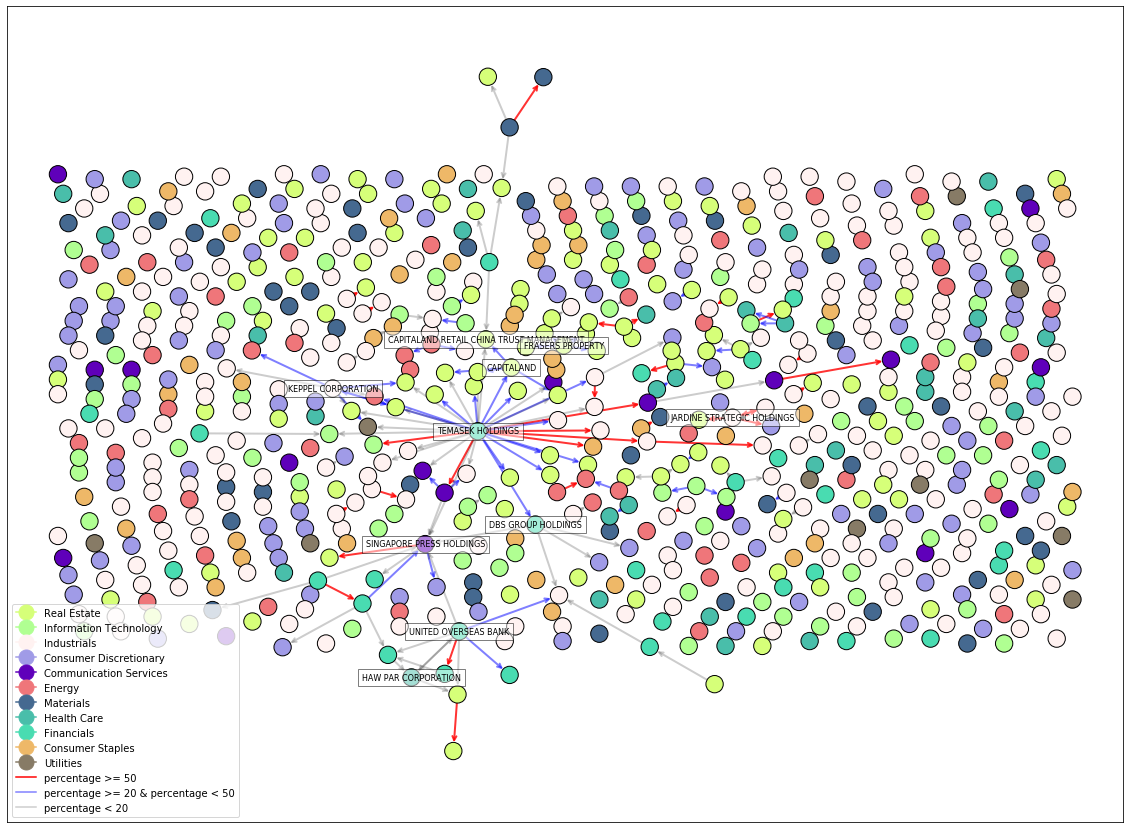

In [55]:
plt.figure(figsize =(20,15))
elarge = [(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] > 50]
esmed = [(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] >= 20 and d['weight'] <=50]
esmall = [(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] < 20]

pos =graphviz_layout(G2, prog='fdp')
nx.draw_networkx_nodes(G2,pos,node_color=color_map_sector,labels= False,edgecolors="black")
# nx.draw_networkx_edges(G2, pos)
nx.draw_networkx_edges(G2, pos, edgelist=elarge,alpha=0.8,arrowstyle='->',arrowsize=10,arrows=True,
                       width=2,edge_color='r')
nx.draw_networkx_edges(G2, pos,edgelist=esmed,alpha=0.5,arrowstyle='->',arrowsize=10,arrows=True,
                       width=2,edge_color='blue')
nx.draw_networkx_edges(G2, pos,edgelist=esmall,alpha=0.2,arrowstyle='->',arrowsize=10,arrows=True,
                       width=2,edge_color='black')
nx.draw_networkx_labels(G2,pos,labels=graph_names,font_size=8,bbox=dict(facecolor="white",alpha = 0.5))
plt.legend(handles = final_list)
# nx.draw_networkx_edge_labels(G2, pos, edge_labels=removed_key_edges)
plt.savefig("./figures/Listed_Companies_Only_graph.png")
plt.show()
plt.close("all")

### Number of Subsidaries and Associated Companies owned by Holding Companies
Subsidiaries  are companies that have more than 50% shares own by a holding company.
<br>
Associated Companies are companies that have more than or equal to 20% and less than 50 % shares own by a holding company.
<br/>
Affiliated  Companies = shares < 20%

In [56]:
subsidaries = [(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] > 50]
assoc_company = [(u, v) for (u, v, d) in G2.edges(data=True) if (d['weight'] <= 50 and d['weight'] >=20)]
affilated_company = [(u, v) for (u, v, d) in G2.edges(data=True) if d['weight'] < 20]

In [57]:
subsidaries_num = {}
for edges in subsidaries:
    key = edges[0]
    if edges[0] != edges[1]:            
        if key in subsidaries_num:
            current_count = subsidaries_num[key]
            new_count = current_count + 1
            subsidaries_num[key] = new_count
        else:
            subsidaries_num[key] = 1

In [58]:
subsidaries_df = pd.DataFrame(columns=["Name","Num_Subsidaries"])
for key,value in subsidaries_num.items():
    subsidaries_df = subsidaries_df.append({'Name':name[key],"Num_Subsidaries":value},ignore_index = True)

In [59]:
subsidaries_df.sort_values("Num_Subsidaries",ascending=False).head()

Name Num_Subsidaries
19    TEMASEK HOLDINGS PRIVATE LIMITED               6
9   JARDINE STRATEGIC HOLDINGS LIMITED               5
5    COMFORTDELGRO CORPORATION LIMITED               2
1           ASPIAL CORPORATION LIMITED               2
13                         OUE LIMITED               2

In [60]:
assoc_company_num = {}
for edges in assoc_company:
    key = edges[0]
    if edges[0] != edges[1]:
        if key in assoc_company_num:
            current_count = assoc_company_num[key]
            new_count = current_count + 1
            assoc_company_num[key] = new_count
        else:
            assoc_company_num[key] = 1

In [61]:
assoc_company_df = pd.DataFrame(columns=["Name","Num_Associated"])
for key,value in assoc_company_num.items():
    assoc_company_df = assoc_company_df.append({'Name':name[key],"Num_Associated":value},ignore_index = True)

In [62]:
assoc_company_df.sort_values("Num_Associated",ascending=False).head()

Name Num_Associated
17  TEMASEK HOLDINGS PRIVATE LIMITED             13
2                 CAPITALAND LIMITED              4
9           FRASERS PROPERTY LIMITED              4
13        KEPPEL CORPORATION LIMITED              4
21      WILMAR INTERNATIONAL LIMITED              2

In [63]:
aff_company_num = {}
for edges in affilated_company:
    key = edges[0]
    if edges[0] != edges[1]:
        if key in aff_company_num:
            current_count = aff_company_num[key]
            new_count = current_count + 1
            aff_company_num[key] = new_count
        else:
            aff_company_num[key] = 1

In [64]:
aff_company_df = pd.DataFrame(columns=["Name","Num_Affilated"])
for key,value in aff_company_num.items():
    aff_company_df = aff_company_df.append({'Name':name[key],"Num_Affilated":value},ignore_index = True)

In [65]:
aff_company_df.sort_values("Num_Affilated",ascending=False).head()

Name Num_Affilated
29  TEMASEK HOLDINGS PRIVATE LIMITED            16
3         DBS GROUP HOLDINGS LIMITED             4
33      UNITED OVERSEAS BANK LIMITED             4
19                    PRUDENTIAL PLC             3
1          CITY DEVELOPMENTS LIMITED             3

In [66]:
child_org_df = subsidaries_df.merge(assoc_company_df,how='outer')
child_org_df = child_org_df.merge(aff_company_df,how='outer')

In [67]:
child_org_df

Name Num_Subsidaries Num_Associated  \
0                   ACCRELIST LIMITED               1            NaN   
1          ASPIAL CORPORATION LIMITED               2              1   
2            BAKER TECHNOLOGY LIMITED               1            NaN   
3           BONVESTS HOLDINGS LIMITED               1            NaN   
4          BOUSTEAD SINGAPORE LIMITED               1            NaN   
..                                ...             ...            ...   
63          STARLAND HOLDINGS LIMITED             NaN            NaN   
64                        TIH LIMITED             NaN            NaN   
65              TRITECH GROUP LIMITED             NaN            NaN   
66  UNITED OVERSEAS INSURANCE LIMITED             NaN            NaN   
67                  USP GROUP LIMITED             NaN            NaN   

   Num_Affilated  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
63             1  
64             1  
65             1  
66             2  
67             1  

[68 rows x 4 columns]

In [68]:
child_org_df.fillna(0,inplace=True)

In [69]:
child_org_df.sort_values(["Num_Subsidaries","Num_Associated","Num_Affilated"],ascending=False).head()

Name  Num_Subsidaries  Num_Associated  \
19    TEMASEK HOLDINGS PRIVATE LIMITED                6              13   
9   JARDINE STRATEGIC HOLDINGS LIMITED                5               0   
1           ASPIAL CORPORATION LIMITED                2               1   
13                         OUE LIMITED                2               0   
5    COMFORTDELGRO CORPORATION LIMITED                2               0   

    Num_Affilated  
19             16  
9               0  
1               0  
13              1  
5               0

In [70]:
# orgainisations with more affliated and associated companies as compared to subsidaires
cond1 = child_org_df["Num_Affilated"] + child_org_df["Num_Associated"] >=  child_org_df["Num_Subsidaries"]
child_org_df[cond1]

Name  Num_Subsidaries  \
14  OVERSEA-CHINESE BANKING CORPORATION LIMITED                1   
15                  SEMBCORP INDUSTRIES LIMITED                1   
17             SINGAPORE PRESS HOLDINGS LIMITED                1   
19             TEMASEK HOLDINGS PRIVATE LIMITED                6   
20          THE STRAITS TRADING COMPANY LIMITED                1   
22                 UNITED OVERSEAS BANK LIMITED                1   
24                        ASTI HOLDINGS LIMITED                0   
25                           CAPITALAND LIMITED                0   
26                   CHUAN HUP HOLDINGS LIMITED                0   
27                    CITY DEVELOPMENTS LIMITED                0   
28                   CLEARBRIDGE HEALTH LIMITED                0   
29                       EZION HOLDINGS LIMITED                0   
30                  FALCON ENERGY GROUP LIMITED                0   
31                      FRAGRANCE GROUP LIMITED                0   
32                     FRASERS PROPERTY LIMITED                0   
33               GREAT EASTERN HOLDINGS LIMITED                0   
34              HC SURGICAL SPECIALISTS LIMITED                0   
35                              INTRACO LIMITED                0   
36                   KEPPEL CORPORATION LIMITED                0   
37         Q & M DENTAL GROUP SINGAPORE LIMITED                0   
38         SINGAPORE TELECOMMUNICATIONS LIMITED                0   
39         THAI BEVERAGE PUBLIC COMPANY LIMITED                0   
40                         UMS HOLDINGS LIMITED                0   
41                 WILMAR INTERNATIONAL LIMITED                0   
42                   YANLORD LAND GROUP LIMITED                0   
43              YOMA STRATEGIC HOLDINGS LIMITED                0   
44                        BLUMONT GROUP LIMITED                0   
45                  CREATIVE TECHNOLOGY LIMITED                0   
46                   DBS GROUP HOLDINGS LIMITED                0   
47                             ELLIPSIZ LIMITED                0   
48      ENVICTUS INTERNATIONAL HOLDINGS LIMITED                0   
49                      GKE CORPORATION LIMITED                0   
50                  HAW PAR CORPORATION LIMITED                0   
51                             HIAP HOE LIMITED                0   
52                 HWA HONG CORPORATION LIMITED                0   
53                          IFS CAPITAL LIMITED                0   
54                  KEONG HONG HOLDINGS LIMITED                0   
55                            NEO GROUP LIMITED                0   
56                       OXLEY HOLDINGS LIMITED                0   
57                               PRUDENTIAL PLC                0   
58                        SING HOLDINGS LIMITED                0   
59           SING INVESTMENTS & FINANCE LIMITED                0   
60    SINGAPORE REINSURANCE CORPORATION LIMITED                0   
61                    SINGAPURA FINANCE LIMITED                0   
62                              STARHUB LIMITED                0   
63                    STARLAND HOLDINGS LIMITED                0   
64                                  TIH LIMITED                0   
65                        TRITECH GROUP LIMITED                0   
66            UNITED OVERSEAS INSURANCE LIMITED                0   
67                            USP GROUP LIMITED                0   

    Num_Associated  Num_Affilated  
14               0              2  
15               0              1  
17               1              1  
19              13             16  
20               0              2  
22               2              4  
24               2              0  
25               4              0  
26               1              0  
27               1              3  
28               1              0  
29               2              1  
30               1              0  
31               1              0  
32               4              0 

In [71]:
# orgainisations with lesser affliated and associated companies as compared to subsidaires
cond1 = child_org_df["Num_Affilated"] + child_org_df["Num_Associated"] <  child_org_df["Num_Subsidaries"]
child_org_df[cond1]

Name  Num_Subsidaries  Num_Associated  \
0                    ACCRELIST LIMITED                1               0   
1           ASPIAL CORPORATION LIMITED                2               1   
2             BAKER TECHNOLOGY LIMITED                1               0   
3            BONVESTS HOLDINGS LIMITED                1               0   
4           BOUSTEAD SINGAPORE LIMITED                1               0   
5    COMFORTDELGRO CORPORATION LIMITED                2               0   
6                          GRP LIMITED                1               0   
7             HANWELL HOLDINGS LIMITED                1               0   
8    JARDINE MATHESON HOLDINGS LIMITED                1               0   
9   JARDINE STRATEGIC HOLDINGS LIMITED                5               0   
10          KOH BROTHERS GROUP LIMITED                1               0   
11             LIAN BENG GROUP LIMITED                1               0   
12                    MM2 ASIA LIMITED                1               0   
13                         OUE LIMITED                2               0   
16          SINGAPORE AIRLINES LIMITED                1               0   
18           TEE INTERNATIONAL LIMITED                1               0   
21          TUAN SING HOLDINGS LIMITED                1               0   
23                   UOL GROUP LIMITED                1               0   

    Num_Affilated  
0               0  
1               0  
2               0  
3               0  
4               0  
5               0  
6               0  
7               0  
8               0  
9               0  
10              0  
11              0  
12              0  
13              1  
16              0  
18              0  
21              0  
23              0

In [72]:
total_types_company = pd.DataFrame(child_org_df.sum())
display(total_types_company)

0
Name             ACCRELIST LIMITEDASPIAL CORPORATION LIMITEDBAK...
Num_Subsidaries                                                 36
Num_Associated                                                  52
Num_Affilated                                                   70

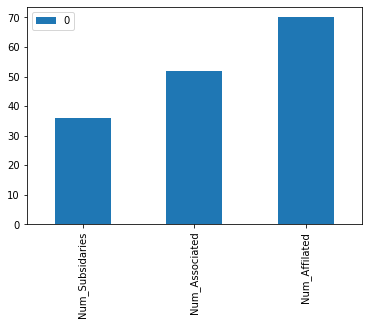

In [73]:
transposed = total_types_company[1:]
transposed.plot(kind="bar")

### Portfolio Diversification

In [74]:
unique_sector = set(sector.values())
num_unique_sector = len(unique_sector)

In [75]:
diversification_df = pd.DataFrame(columns=["name","num_sector","num_of_companies","diverse_level"])
for index in range(num_elements2):
    all_sector = set()
    diverse = 0
    all_companies = []
    all_companies.append(sector[index])
    all_sector.add(sector[index])
    for desc in nx.descendants(G2,index):
        sector_type = sector[desc]
        all_sector.add(sector_type)
        all_companies.append(sector_type)
#     print(all_sector)
    num_companies = len(all_companies)
    num_sectors = len(all_sector)
    diverse = num_sectors / num_unique_sector
#         print(diverse)
    diversification_df = diversification_df.append({'name':name[index],"num_sector":num_sectors,"num_of_companies":num_companies,"diverse_level":diverse},ignore_index = True)

In [76]:
diversification_df.sort_values("num_sector",ascending=False).head(20)

name num_sector num_of_companies  \
639             TEMASEK HOLDINGS PRIVATE LIMITED          9               48   
480  OVERSEA-CHINESE BANKING CORPORATION LIMITED          7               16   
265                  HAW PAR CORPORATION LIMITED          6               12   
583    SINGAPORE REINSURANCE CORPORATION LIMITED          6               12   
251               GREAT EASTERN HOLDINGS LIMITED          6               14   
677                 UNITED OVERSEAS BANK LIMITED          6               12   
678            UNITED OVERSEAS INSURANCE LIMITED          6               12   
586         SINGAPORE TELECOMMUNICATIONS LIMITED          5                7   
173                   DBS GROUP HOLDINGS LIMITED          5                8   
150                    CITY DEVELOPMENTS LIMITED          4                6   
330            JARDINE MATHESON HOLDINGS LIMITED          4                6   
331           JARDINE STRATEGIC HOLDINGS LIMITED          4                6   
348                   KEPPEL CORPORATION LIMITED          4                8   
513         Q & M DENTAL GROUP SINGAPORE LIMITED          4                5   
582             SINGAPORE PRESS HOLDINGS LIMITED          4                4   
572                        SING HOLDINGS LIMITED          3                3   
253                                  GRP LIMITED          3                3   
63                    ASPIAL CORPORATION LIMITED          3                4   
304                          IFS CAPITAL LIMITED          3                3   
683                            USP GROUP LIMITED          2                2   

     diverse_level  
639       0.818182  
480       0.636364  
265       0.545455  
583       0.545455  
251       0.545455  
677       0.545455  
678       0.545455  
586       0.454545  
173       0.454545  
150       0.363636  
330       0.363636  
331       0.363636  
348       0.363636  
513       0.363636  
582       0.363636  
572       0.272727  
253       0.272727  
63        0.272727  
304       0.272727  
683       0.181818

In [77]:
# company that cross share with only 1 sector
cond1 = diversification_df["num_of_companies"] > 1
cond2 = diversification_df["num_sector"] == 1
filtered_diverse = diversification_df[cond1 & cond2]
display(filtered_diverse)

name num_sector num_of_companies  \
9                          ACCRELIST LIMITED          1                2   
65                     ASTI HOLDINGS LIMITED          1                3   
75                  BAKER TECHNOLOGY LIMITED          1                2   
88                 BONVESTS HOLDINGS LIMITED          1                2   
90                BOUSTEAD SINGAPORE LIMITED          1                2   
105                       CAPITALAND LIMITED          1                5   
152               CLEARBRIDGE HEALTH LIMITED          1                2   
157        COMFORTDELGRO CORPORATION LIMITED          1                3   
164              CREATIVE TECHNOLOGY LIMITED          1                2   
197  ENVICTUS INTERNATIONAL HOLDINGS LIMITED          1                2   
208              FALCON ENERGY GROUP LIMITED          1                2   
224                 FRASERS PROPERTY LIMITED          1                5   
266          HC SURGICAL SPECIALISTS LIMITED          1                2   
347              KEONG HONG HOLDINGS LIMITED          1                2   
362               KOH BROTHERS GROUP LIMITED          1                2   
433                         MM2 ASIA LIMITED          1                2   
448                        NEO GROUP LIMITED          1                2   
482                   OXLEY HOLDINGS LIMITED          1                3   
574               SINGAPORE AIRLINES LIMITED          1                2   
610                          STARHUB LIMITED          1                3   
682                        UOL GROUP LIMITED          1                2   
708               YANLORD LAND GROUP LIMITED          1                2   

     diverse_level  
9         0.090909  
65        0.090909  
75        0.090909  
88        0.090909  
90        0.090909  
105       0.090909  
152       0.090909  
157       0.090909  
164       0.090909  
197       0.090909  
208       0.090909  
224       0.090909  
266       0.090909  
347       0.090909  
362       0.090909  
433       0.090909  
448       0.090909  
482       0.090909  
574       0.090909  
610       0.090909  
682       0.090909  
708       0.090909

In [78]:
filtered_diverse.to_csv("indicators/not_diversed.csv",index=False)

#### STI TOP 30

In [79]:
# the top 30 sti was manually retrieved
sti_top30  = pd.read_excel("../raw_data/STI Top 30.xlsx")

In [80]:
sti_top30.columns

Index(['Name', 'SGX Code', 'Market Cap (S$M)', 'Total Return YTD (%)',
       'Total Return 1Y (%)', 'Total Return 3Y (%)', 'P/E (x)', 'P/B (x)',
       'Div Yld (%)', 'Market Cap Percentage', 'Unnamed: 10',
       'https://api2.sgx.com/sites/default/files/2019-01/SGX%20Monthly%20Market%20Statistics%20Report%20Dec%202018.pdf'],
      dtype='object')

In [81]:
filtered_sti  = sti_top30[["SGX Code","Market Cap Percentage"]].dropna()

In [82]:
sti_names = []
sti_keys = []
for item in filtered_sti["SGX Code"]:
    print(item)
    df = filtered_df[filtered_df['CODE'].str.contains(item,na=False)]
    display(df)
    sti_names.append(df["STANDARDISED STOCK NAME"].values[0])
    sti_keys.append(df.index[0])

J36


STOCK NAME            STANDARDISED STOCK NAME CODE  \
330  JARDINE MATHESON HOLDINGS LTD  JARDINE MATHESON HOLDINGS LIMITED  J36   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
330  https://links.sgx.com/FileOpen/Jardine%20Mathe...             STOCKS   

    DATA AVAILIABITY       SECTOR  
330              Yes  Industrials

D05


STOCK NAME     STANDARDISED STOCK NAME CODE  \
173  DBS GROUP HOLDINGS LTD  DBS GROUP HOLDINGS LIMITED  D05   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
173  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY      SECTOR  
173              Yes  Financials

J37


STOCK NAME             STANDARDISED STOCK NAME CODE  \
331  JARDINE STRATEGIC HOLDINGS LTD  JARDINE STRATEGIC HOLDINGS LIMITED  J37   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
331  https://links.sgx.com/FileOpen/Jardine%20Strat...             STOCKS   

    DATA AVAILIABITY       SECTOR  
331              Yes  Industrials

O39


STOCK NAME  \
480  OVERSEA-CHINESE BANKING CORPORATION LIMITED   

                         STANDARDISED STOCK NAME CODE  \
480  OVERSEA-CHINESE BANKING CORPORATION LIMITED  O39   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
480  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY      SECTOR  
480              Yes  Financials

Z74


STOCK NAME  \
586  SINGAPORE TELECOMMUNICATIONS LIMITED   

                  STANDARDISED STOCK NAME CODE  \
586  SINGAPORE TELECOMMUNICATIONS LIMITED  Z74   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
586  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY                  SECTOR  
586              Yes  Communication Services

U11


STOCK NAME       STANDARDISED STOCK NAME CODE  \
677  UNITED OVERSEAS BANK LIMITED  UNITED OVERSEAS BANK LIMITED  U11   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
677  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY      SECTOR  
677              Yes  Financials

H78


STOCK NAME         STANDARDISED STOCK NAME CODE  \
286  HONGKONG LAND HOLDINGS LIMITED  HONGKONG LAND HOLDINGS LIMITED  H78   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
286  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY       SECTOR  
286              Yes  Real Estate

F34


STOCK NAME       STANDARDISED STOCK NAME CODE  \
697  WILMAR INTERNATIONAL LIMITED  WILMAR INTERNATIONAL LIMITED  F34   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
697  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY            SECTOR  
697              Yes  Consumer Staples

Y92


STOCK NAME               STANDARDISED STOCK NAME CODE  \
640  THAI BEVERAGE PUBLIC CO LTD  THAI BEVERAGE PUBLIC COMPANY LIMITED  Y92   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
640  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY            SECTOR  
640              Yes  Consumer Staples

D01


STOCK NAME            STANDARDISED STOCK NAME CODE  \
169  DAIRY FARM INT'L HOLDINGS LTD  DAIRY FARM INT'L HOLDINGS LIMITED  D01   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
169  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY            SECTOR  
169              Yes  Consumer Staples

C07


STOCK NAME           STANDARDISED STOCK NAME CODE  \
329  JARDINE CYCLE & CARRIAGE LIMITED  JARDINE CYCLE & CARRIAGE LIMITED  C07   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
329  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY                  SECTOR  
329              Yes  Consumer Discretionary

C31


STOCK NAME STANDARDISED STOCK NAME CODE  \
105  CAPITALAND LIMITED      CAPITALAND LIMITED  C31   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
105  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY       SECTOR  
105              Yes  Real Estate

G13


STOCK NAME    STANDARDISED STOCK NAME CODE  \
236  GENTING SINGAPORE LIMITED  GENTING SINGAPORE LIMITED  G13   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
236  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY                  SECTOR  
236              Yes  Consumer Discretionary

C6L


STOCK NAME     STANDARDISED STOCK NAME CODE  \
574  SINGAPORE AIRLINES LIMITED  SINGAPORE AIRLINES LIMITED  C6L   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
574  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY       SECTOR  
574              Yes  Industrials

S63


STOCK NAME  \
585  SINGAPORE TECHNOLOGIES ENGINEERING LTD   

                        STANDARDISED STOCK NAME CODE  \
585  SINGAPORE TECHNOLOGIES ENGINEERING LIMITED  S63   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
585  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY       SECTOR  
585              Yes  Industrials

BN4


STOCK NAME     STANDARDISED STOCK NAME CODE  \
348  KEPPEL CORPORATION LIMITED  KEPPEL CORPORATION LIMITED  BN4   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
348  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY       SECTOR  
348              Yes  Industrials

C38U


STOCK NAME  \
106  CAPITALAND MALL TRUST MANAGEMENT LIMITED   

                      STANDARDISED STOCK NAME  CODE  \
106  CAPITALAND MALL TRUST MANAGEMENT LIMITED  C38U   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
106  https://links.sgx.com/1.0.0/corporate-announce...               REIT   

    DATA AVAILIABITY       SECTOR  
106              Yes  Real Estate

A17U


STOCK NAME  \
48  ASCENDAS FUNDS MANAGEMENT (S) LIMITED   

                        STANDARDISED STOCK NAME  CODE  \
48  ASCENDAS FUNDS MANAGEMENT SINGAPORE LIMITED  A17U   

                                   ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
48  https://links.sgx.com/1.0.0/corporate-announce...               REIT   

   DATA AVAILIABITY       SECTOR  
48              Yes  Real Estate

C09


STOCK NAME    STANDARDISED STOCK NAME CODE  \
150  CITY DEVELOPMENTS LIMITED  CITY DEVELOPMENTS LIMITED  C09   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
150  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY       SECTOR  
150              Yes  Real Estate

S68


STOCK NAME     STANDARDISED STOCK NAME CODE  \
576  SINGAPORE EXCHANGE LIMITED  SINGAPORE EXCHANGE LIMITED  S68   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
576  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY      SECTOR  
576              Yes  Financials

C61U


STOCK NAME  \
104  CAPITALAND COMMERCIAL TRUST MANAGEMENT LIMITED   

                            STANDARDISED STOCK NAME  CODE  \
104  CAPITALAND COMMERCIAL TRUST MANAGEMENT LIMITED  C61U   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
104  https://links.sgx.com/1.0.0/corporate-announce...               REIT   

    DATA AVAILIABITY       SECTOR  
104              Yes  Real Estate

U14


STOCK NAME STANDARDISED STOCK NAME CODE  \
682  UOL GROUP LIMITED       UOL GROUP LIMITED  U14   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
682  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY       SECTOR  
682              Yes  Real Estate

S58


STOCK NAME STANDARDISED STOCK NAME CODE  \
544  SATS LTD.            SATS LIMITED  S58   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
544  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY       SECTOR  
544              Yes  Industrials

BS6


STOCK NAME  \
707  YANGZIJIANG SHIPBUILDING (HOLDINGS) LTD.   

                       STANDARDISED STOCK NAME CODE  \
707  YANGZIJIANG SHIPBUILDING HOLDINGS LIMITED  BS6   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
707  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY       SECTOR  
707              Yes  Industrials

U96


STOCK NAME      STANDARDISED STOCK NAME CODE  \
550  SEMBCORP INDUSTRIES LTD  SEMBCORP INDUSTRIES LIMITED  U96   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
550  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY       SECTOR  
550              Yes  Industrials

C52


STOCK NAME            STANDARDISED STOCK NAME  \
157  COMFORTDELGRO CORPORATION LIMITED  COMFORTDELGRO CORPORATION LIMITED   

    CODE                                 ANNUAL_REPORT_2018  \
157  C52  https://links.sgx.com/1.0.0/corporate-announce...   

    INVESTMENT_CHANNEL DATA AVAILIABITY       SECTOR  
157             STOCKS              Yes  Industrials

V03


STOCK NAME      STANDARDISED STOCK NAME CODE  \
687  VENTURE CORPORATION LIMITED  VENTURE CORPORATION LIMITED  V03   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
687  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY                  SECTOR  
687              Yes  Information Technology

T39


STOCK NAME           STANDARDISED STOCK NAME CODE  \
582  SINGAPORE PRESS HOLDINGS LIMITED  SINGAPORE PRESS HOLDINGS LIMITED  T39   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
582  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY                  SECTOR  
582              Yes  Communication Services

E5H


STOCK NAME        STANDARDISED STOCK NAME CODE  \
245  GOLDEN AGRI-RESOURCES LTD  GOLDEN AGRI-RESOURCES LIMITED  E5H   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
245  https://links.sgx.com/1.0.0/corporate-announce...             STOCKS   

    DATA AVAILIABITY            SECTOR  
245              Yes  Consumer Staples

NS8U


STOCK NAME  \
297  HUTCHISON PORT HOLDINGS MANAGEMENT PTE. LIMITED   

                               STANDARDISED STOCK NAME           CODE  \
297  HUTCHISON PORT HOLDINGS MANAGEMENT PRIVATE LIM...  [P7VU , NS8U]   

                                    ANNUAL_REPORT_2018 INVESTMENT_CHANNEL  \
297  https://links.sgx.com/1.0.0/corporate-announce...             BTRUST   

    DATA AVAILIABITY       SECTOR  
297              Yes  Industrials

In [83]:
filtered_sti["Name"] = sti_names
filtered_sti["Key"] = sti_keys
filtered_sti.head()

SGX Code  Market Cap Percentage  \
0      J36               0.071209   
1      D05               0.068552   
2      J37               0.058904   
3      O39               0.053385   
4      Z74               0.053334   

                                          Name  Key  
0            JARDINE MATHESON HOLDINGS LIMITED  330  
1                   DBS GROUP HOLDINGS LIMITED  173  
2           JARDINE STRATEGIC HOLDINGS LIMITED  331  
3  OVERSEA-CHINESE BANKING CORPORATION LIMITED  480  
4         SINGAPORE TELECOMMUNICATIONS LIMITED  586

In [84]:
filtered_sti["Market Cap Percentage"].sum()

0.6032212614570446

In [85]:
sti_sectors = []
for i in filtered_sti["Key"]:
    sti_sectors.append(sector[i])

In [86]:
filtered_sti["Sector"] =sti_sectors

In [87]:
sti_grp_by = filtered_sti.groupby("Sector").count()

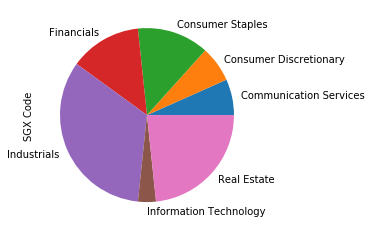

In [88]:
sti_grp_by["SGX Code"].plot(kind="pie")

In [89]:
def check_node_type(item):
    if G2.in_degree(item) == 0 and G2.out_degree(item) == 0:
        print(name[item],item,G2.degree(item),"isolated")
        return "isolated"
    elif G2.in_degree(item) > 0 and G2.out_degree(item) == 0:
        print(name[item],item,G2.degree(item),"leaf")
        return "leaf"
    elif G2.in_degree(item) == 0 and G2.out_degree(item) > 0:
        print(name[item],item,G2.degree(item),"root")
        return "root"
    else:
        print(name[item],item,G2.degree(item),"intermediate") 
        return "intermediate"

In [90]:
filtered_sti["Node Type"] = filtered_sti["Key"].apply(check_node_type)

JARDINE MATHESON HOLDINGS LIMITED 330 2 intermediate
DBS GROUP HOLDINGS LIMITED 173 5 intermediate
JARDINE STRATEGIC HOLDINGS LIMITED 331 6 intermediate
OVERSEA-CHINESE BANKING CORPORATION LIMITED 480 3 root
SINGAPORE TELECOMMUNICATIONS LIMITED 586 4 intermediate
UNITED OVERSEAS BANK LIMITED 677 8 intermediate
HONGKONG LAND HOLDINGS LIMITED 286 1 leaf
WILMAR INTERNATIONAL LIMITED 697 2 root
THAI BEVERAGE PUBLIC COMPANY LIMITED 640 2 root
DAIRY FARM INT'L HOLDINGS LIMITED 169 1 leaf
JARDINE CYCLE & CARRIAGE LIMITED 329 1 leaf
CAPITALAND LIMITED 105 5 intermediate
GENTING SINGAPORE LIMITED 236 0 isolated
SINGAPORE AIRLINES LIMITED 574 2 intermediate
SINGAPORE TECHNOLOGIES ENGINEERING LIMITED 585 1 leaf
KEPPEL CORPORATION LIMITED 348 8 intermediate
CAPITALAND MALL TRUST MANAGEMENT LIMITED 106 4 intermediate
ASCENDAS FUNDS MANAGEMENT SINGAPORE LIMITED 48 3 intermediate
CITY DEVELOPMENTS LIMITED 150 4 root
SINGAPORE EXCHANGE LIMITED 576 0 isolated
CAPITALAND COMMERCIAL TRUST MANAGEMENT LIMI

In [91]:
filtered_sti

SGX Code  Market Cap Percentage  \
0       J36               0.071209   
1       D05               0.068552   
2       J37               0.058904   
3       O39               0.053385   
4       Z74               0.053334   
5       U11               0.047258   
6       H78               0.023643   
7       F34               0.021948   
8       Y92               0.019432   
9       D01               0.019069   
10      C07               0.015605   
11      C31               0.014663   
12      G13               0.013885   
13      C6L               0.012331   
14      S63               0.012121   
15      BN4               0.012071   
16     C38U               0.009169   
17     A17U               0.009097   
18      C09               0.008567   
19      S68               0.008476   
20     C61U               0.007314   
21      U14               0.005982   
22      S58               0.005828   
23      BS6               0.005433   
24      U96               0.005105   
25      C52               0.004922   
26      V03               0.004700   
27      T39               0.004333   
28      E5H               0.003670   
29     NS8U               0.003212   

                                                 Name  Key  \
0                   JARDINE MATHESON HOLDINGS LIMITED  330   
1                          DBS GROUP HOLDINGS LIMITED  173   
2                  JARDINE STRATEGIC HOLDINGS LIMITED  331   
3         OVERSEA-CHINESE BANKING CORPORATION LIMITED  480   
4                SINGAPORE TELECOMMUNICATIONS LIMITED  586   
5                        UNITED OVERSEAS BANK LIMITED  677   
6                      HONGKONG LAND HOLDINGS LIMITED  286   
7                        WILMAR INTERNATIONAL LIMITED  697   
8                THAI BEVERAGE PUBLIC COMPANY LIMITED  640   
9                   DAIRY FARM INT'L HOLDINGS LIMITED  169   
10                   JARDINE CYCLE & CARRIAGE LIMITED  329   
11                                 CAPITALAND LIMITED  105   
12                          GENTING SINGAPORE LIMITED  236   
13                         SINGAPORE AIRLINES LIMITED  574   
14         SINGAPORE TECHNOLOGIES ENGINEERING LIMITED  585   
15                         KEPPEL CORPORATION LIMITED  348   
16           CAPITALAND MALL TRUST MANAGEMENT LIMITED  106   
17        ASCENDAS FUNDS MANAGEMENT SINGAPORE LIMITED   48   
18                          CITY DEVELOPMENTS LIMITED  150   
19                         SINGAPORE EXCHANGE LIMITED  576   
20     CAPITALAND COMMERCIAL TRUST MANAGEMENT LIMITED  104   
21                                  UOL GROUP LIMITED  682   
22                                       SATS LIMITED  544   
23          YANGZIJIANG SHIPBUILDING HOLDINGS LIMITED  707   
24                        SEMBCORP INDUSTRIES LIMITED  550   
25                  COMFORTDELGRO CORPORATION LIMITED  157   
26                        VENTURE CORPORATION LIMITED  687   
27                   SINGAPORE PRESS HOLDINGS LIMITED  582   
28                      GOLDEN AGRI-RESOURCES LIMITED  245   
29  HUTCHISON PORT HOLDINGS MANAGEMENT PRIVATE LIM...  297   

                    Sector     Node Type  
0              Industrials  intermediate  
1               Financials  intermediate  
2              Industrials  intermediate  
3               Financials          root  
4   Communication Services  intermediate  
5               Financials  intermediate  
6              Real Estate          leaf  
7         Consumer Staples          root  
8         Consumer Staples          root  
9         Consumer Staples          leaf  
10  Consumer Discretionary          leaf  
11             Real Estate  intermediate  
12  Consumer Discretionary      isolated  
13             Industrials  intermediate  
14             Industrials          leaf  
15             Industrials  intermediate  
16             Real Estate  intermediate  
17             Real Estate  intermediate  
18             Real Estate          root  
19              Financials      isolated 

In [92]:
sorted_sti = filtered_sti[["Name","Market Cap Percentage","Sector","Node Type"]]

In [93]:
sorted_sti.to_csv("./indicators/sti_30_with_sectors.csv",index= False)

### Create Function for visualisation 

In [94]:
def shorten_names(all_names = {}):
    
    shorten_subgraph = {}
    for key,text in all_names.items():
        split_txt = text.split()
        short_text = split_txt[0:4]
        merge_text =' '.join(short_text)
        shorten_subgraph[key] = merge_text

    stop_words = ["limited","private"]
    for index,item in shorten_subgraph.items():
    #     print(index,item)
        querywords = item.split()
        resultwords  = [word for word in querywords if word.lower() not in stop_words]
        result = ' '.join(resultwords)
        shorten_subgraph[index] = result
    return shorten_subgraph

In [95]:
def sector_colors(graph):
    sectors_unique = filtered_df["SECTOR"].unique()
    unique_colors = ["#D6FF79","#B0FF92","#FFF2F1","#A09BE7",
                     "#5F00BA","#EF767A","#456990","#49BEAA",
                     "#49DCB1","#EEB868","#877B66"]
    color_map_sector = []
    for node in graph:
        if sector[node] == sectors_unique[0]:
            color_map_sector.append(unique_colors[0])
        elif sector[node] == sectors_unique[1]:
            color_map_sector.append(unique_colors[1])
        elif sector[node] == sectors_unique[2]:
            color_map_sector.append(unique_colors[2])
        elif sector[node] == sectors_unique[3]:
            color_map_sector.append(unique_colors[3])
        elif sector[node] == sectors_unique[4]:
            color_map_sector.append(unique_colors[4])
        elif sector[node] == sectors_unique[5]:
            color_map_sector.append(unique_colors[5])
        elif sector[node] == sectors_unique[6]:
            color_map_sector.append(unique_colors[6])
        elif sector[node] == sectors_unique[7]:
            color_map_sector.append(unique_colors[7])
        elif sector[node] == sectors_unique[8]:
            color_map_sector.append(unique_colors[8])
        elif sector[node] == sectors_unique[9]:
            color_map_sector.append(unique_colors[9])
        elif sector[node] == sectors_unique[10]:
            color_map_sector.append(unique_colors[10])  
    return color_map_sector

In [96]:
def cleaned_edges (graph):
    subgraph_arcweight = nx.get_edge_attributes(graph,'weight')
    cleaned_subgraph = {}
    for key,item in subgraph_arcweight.items():
        cleaned_subgraph[key[:2]] = item
    return cleaned_subgraph

In [97]:
def sti_normal_names(all_node):
    name_list = {}
    name_sti = {}
    for n in all_node:
        if n in filtered_sti["Key"].tolist():
            name_sti[n] = name[n]
        else:
            name_list[n] = name[n]
    return name_list,name_sti

In [98]:
def edge_colors(Graph):
    edge_colors = []
    self_loops = []
    for cyc in nx.simple_cycles(Graph):
        if len(cyc) == 1:
            self_loops.append(cyc[0])
    for names in Graph:
        if names in self_loops:
            edge_colors.append("red")
        else:
            edge_colors.append("black")
    return edge_colors

### Each individual components

subgraph 9 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

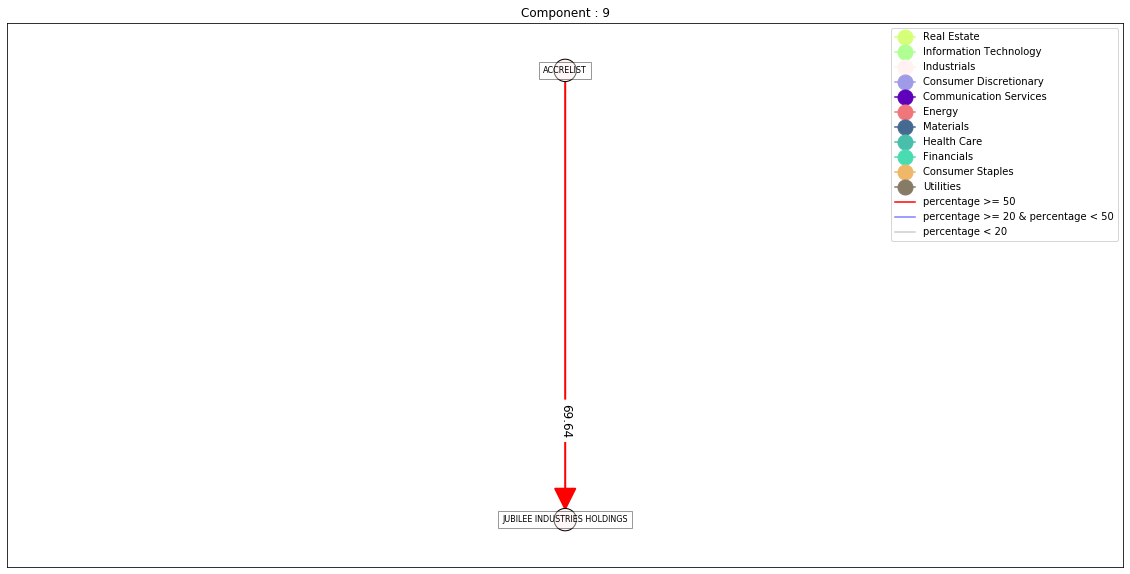

subgraph 16 has 3 nodes


<Figure size 1800x1800 with 0 Axes>

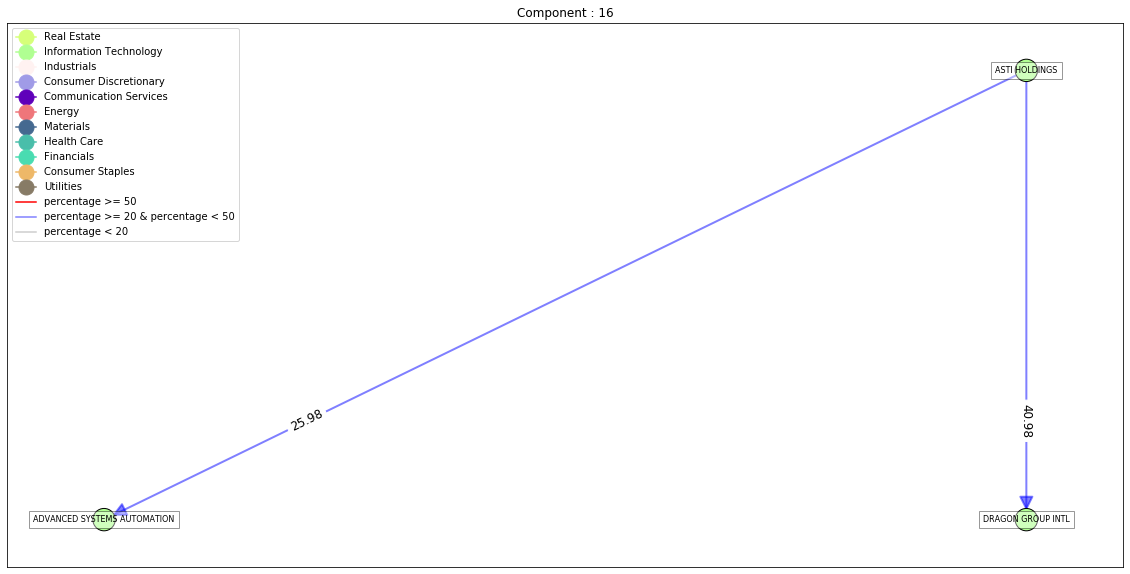

subgraph 21 has 5 nodes


<Figure size 1800x1800 with 0 Axes>

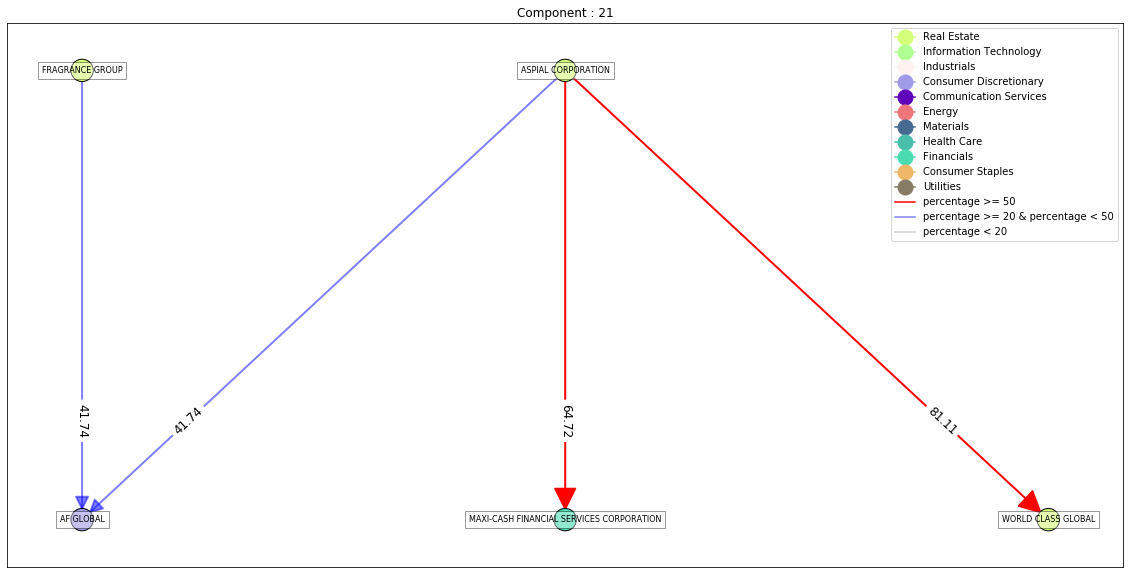

subgraph 29 has 4 nodes


<Figure size 1800x1800 with 0 Axes>

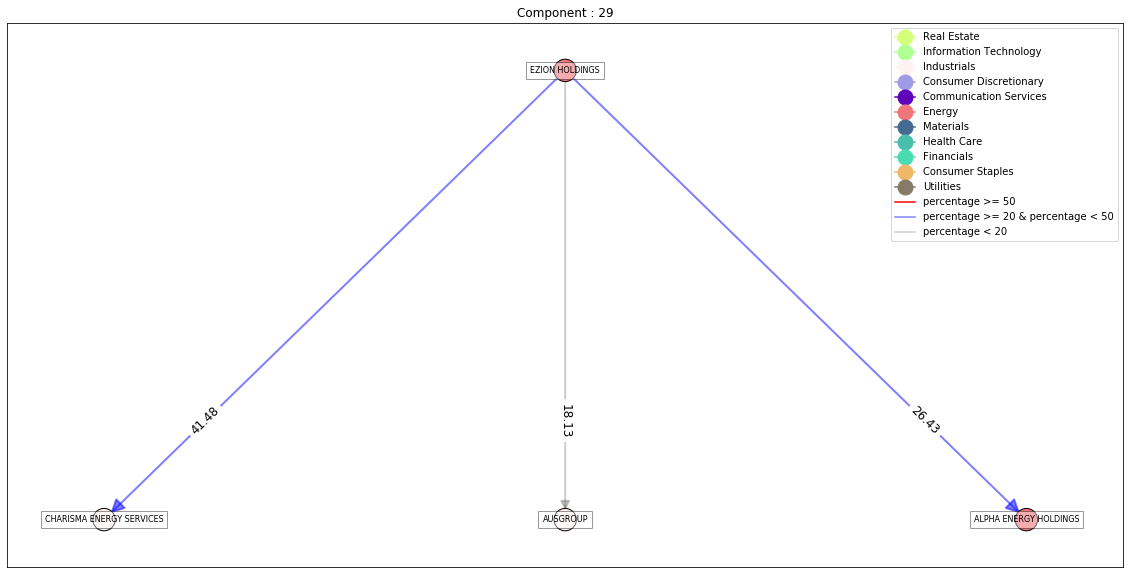

subgraph 39 has 5 nodes


<Figure size 1800x1800 with 0 Axes>

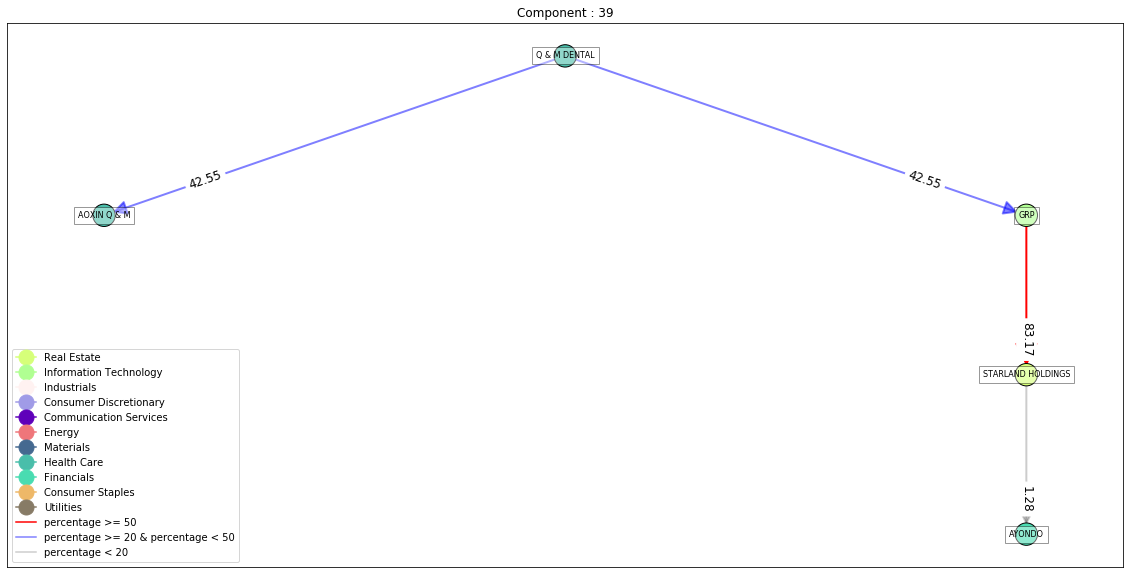

subgraph 42 has 68 nodes


<Figure size 1800x1800 with 0 Axes>

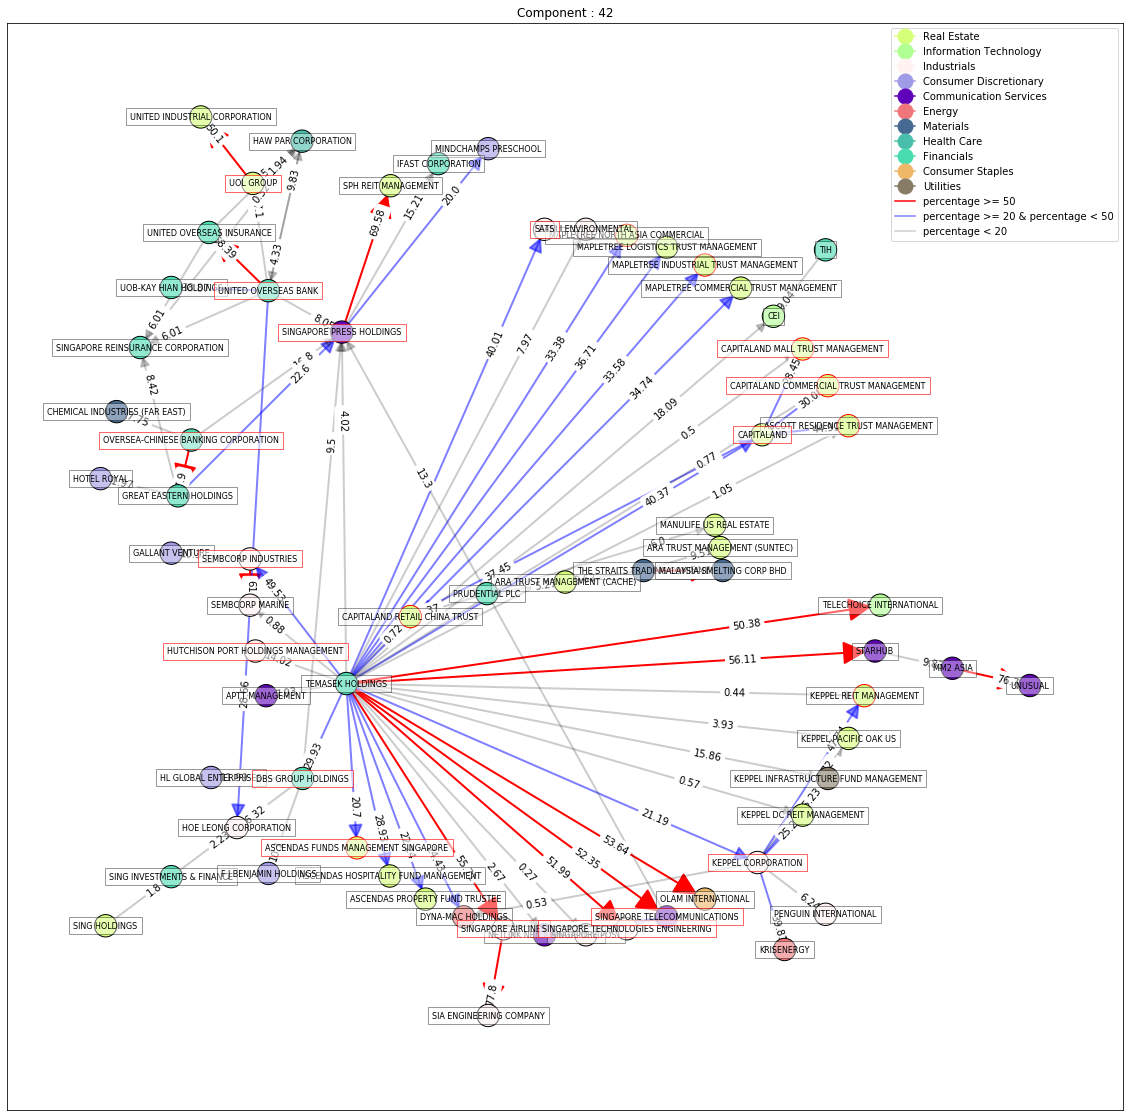

subgraph 56 has 4 nodes


<Figure size 1800x1800 with 0 Axes>

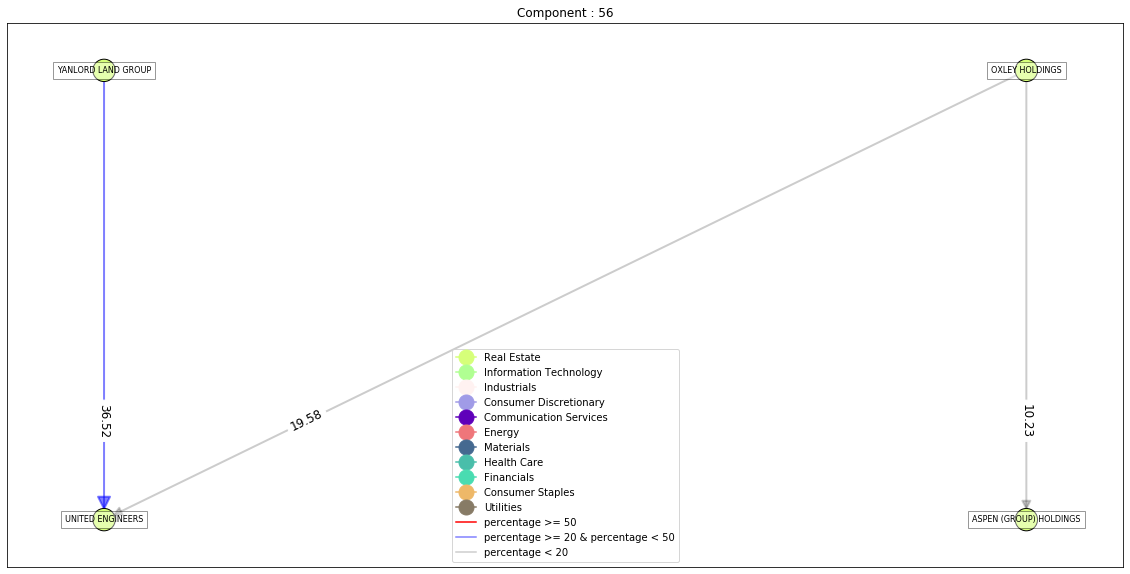

subgraph 65 has 3 nodes


<Figure size 1800x1800 with 0 Axes>

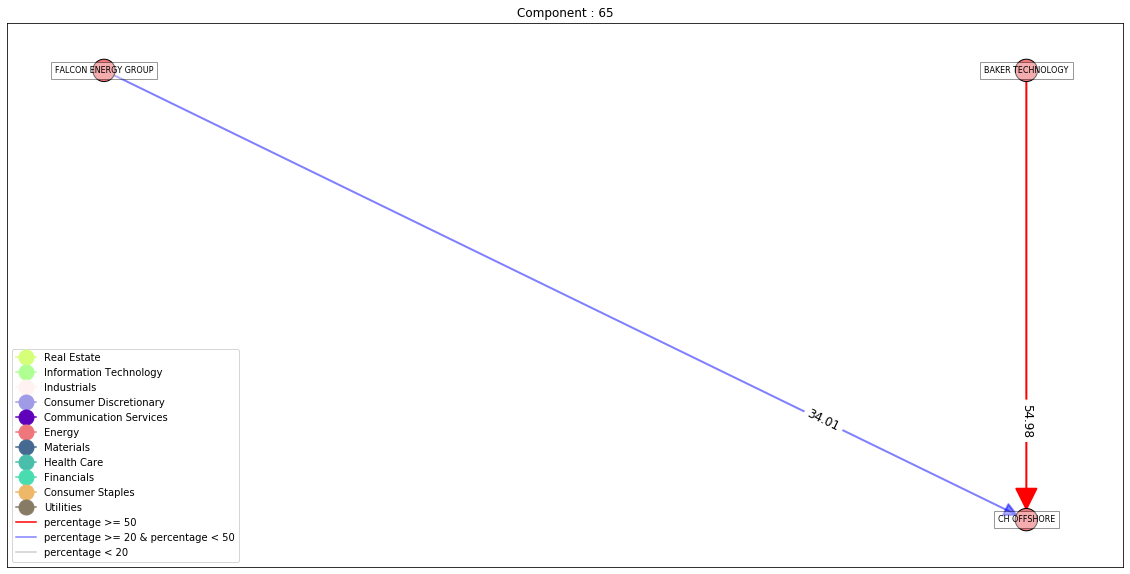

subgraph 73 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

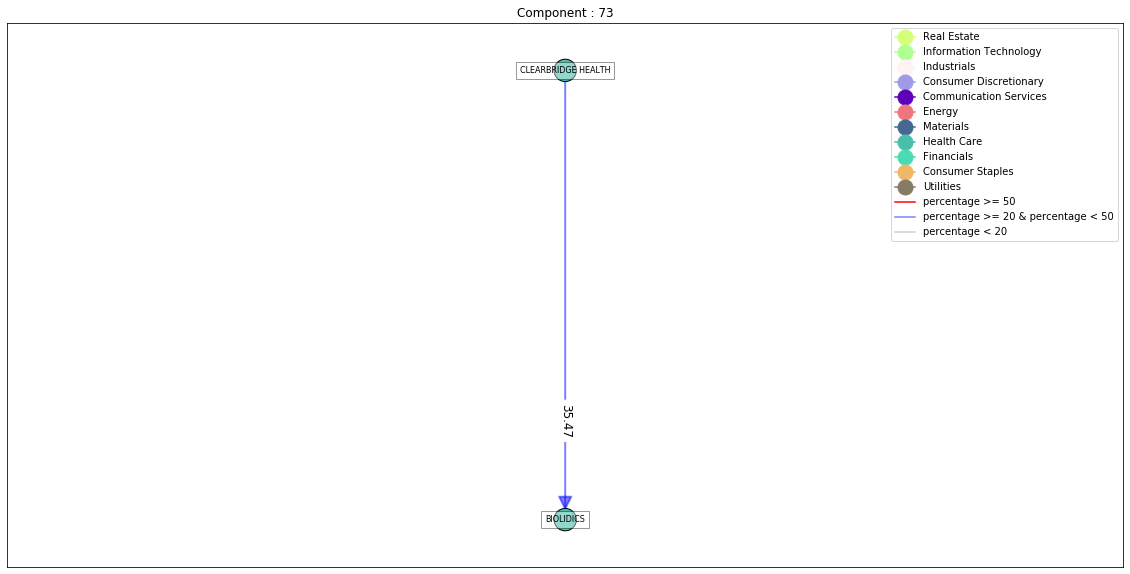

subgraph 75 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

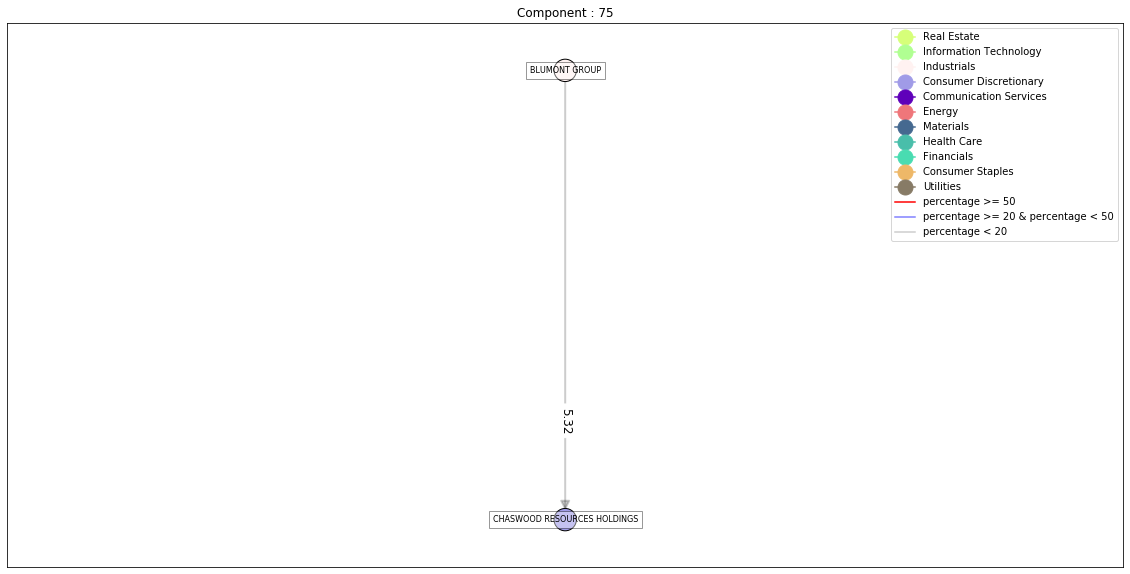

subgraph 78 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

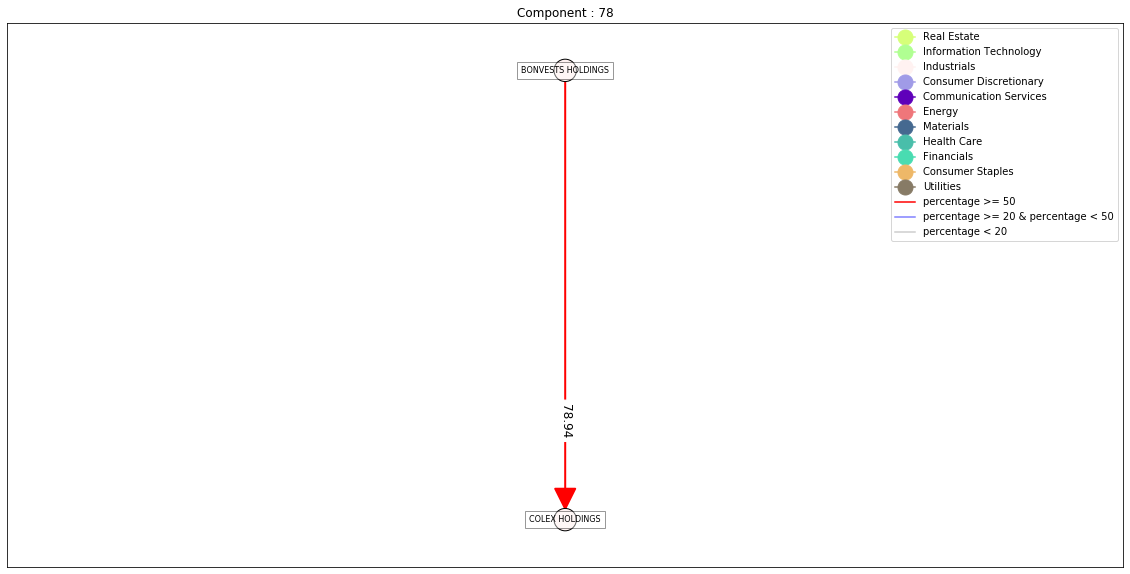

subgraph 79 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

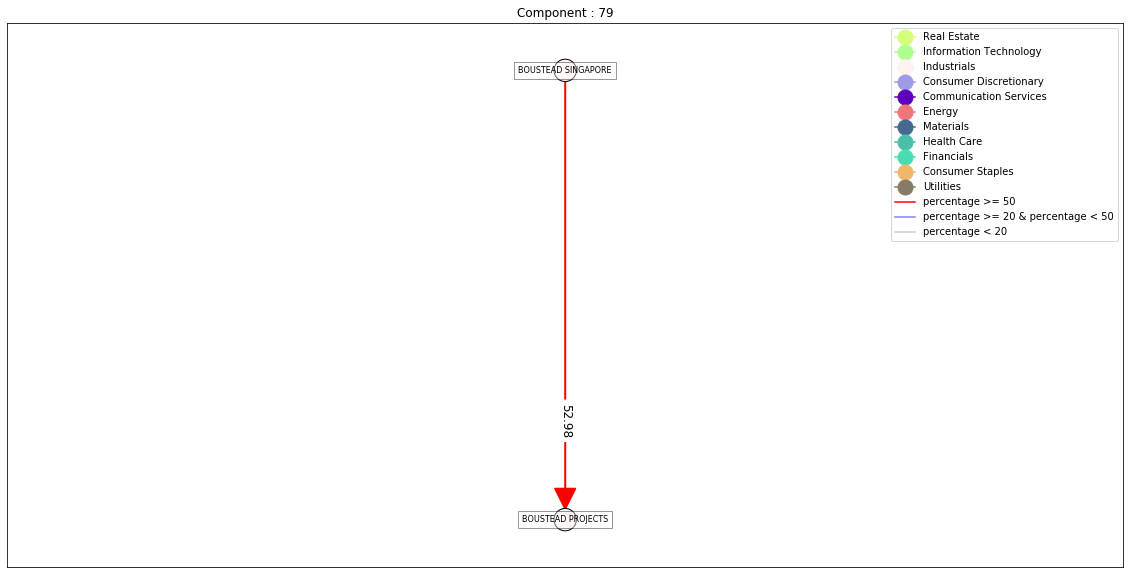

subgraph 80 has 4 nodes


<Figure size 1800x1800 with 0 Axes>

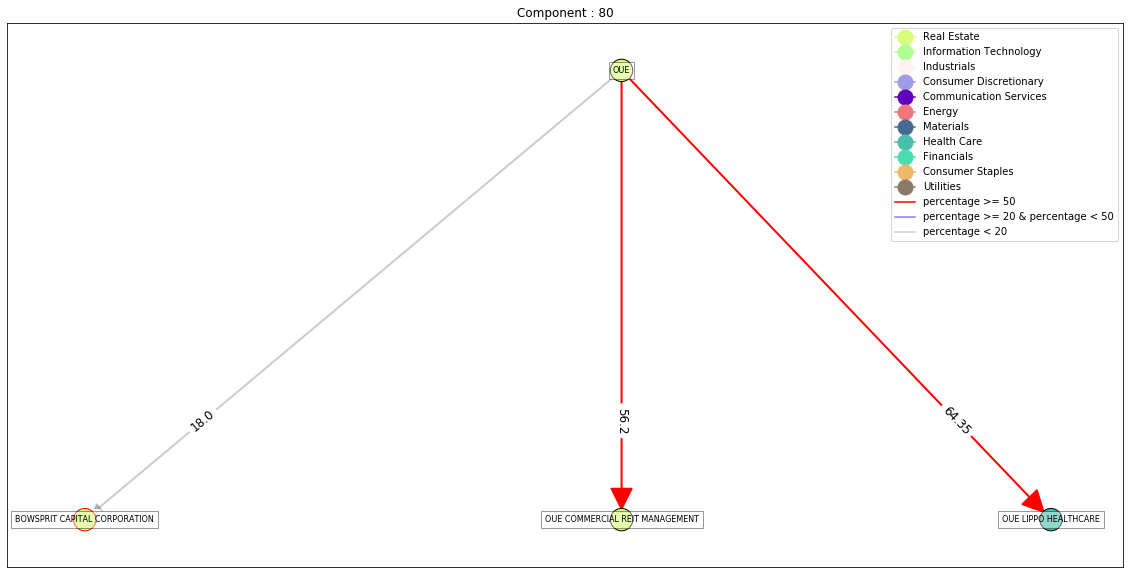

subgraph 92 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

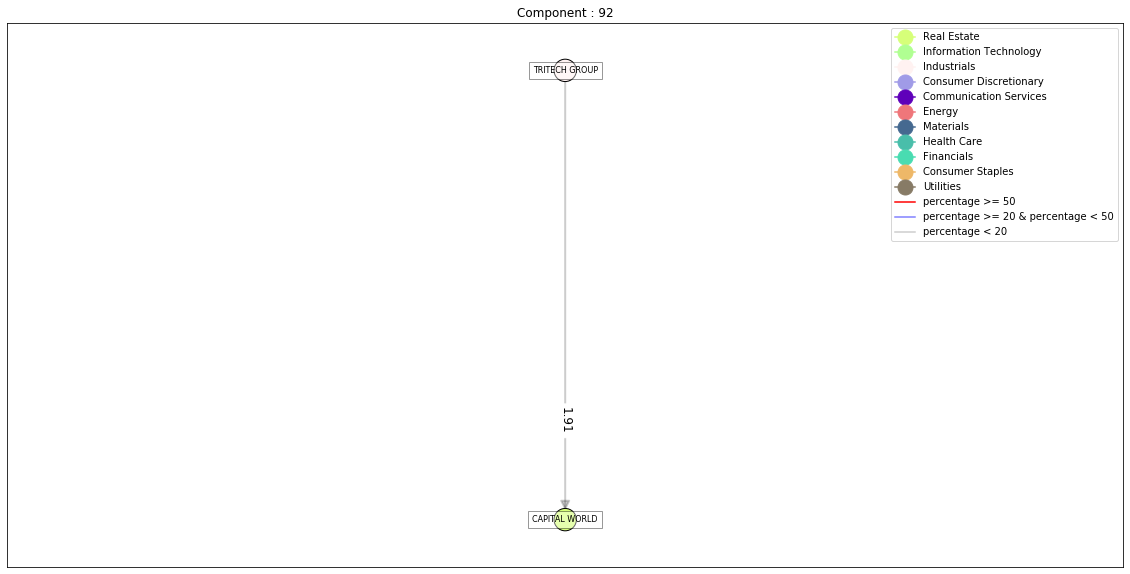

subgraph 127 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

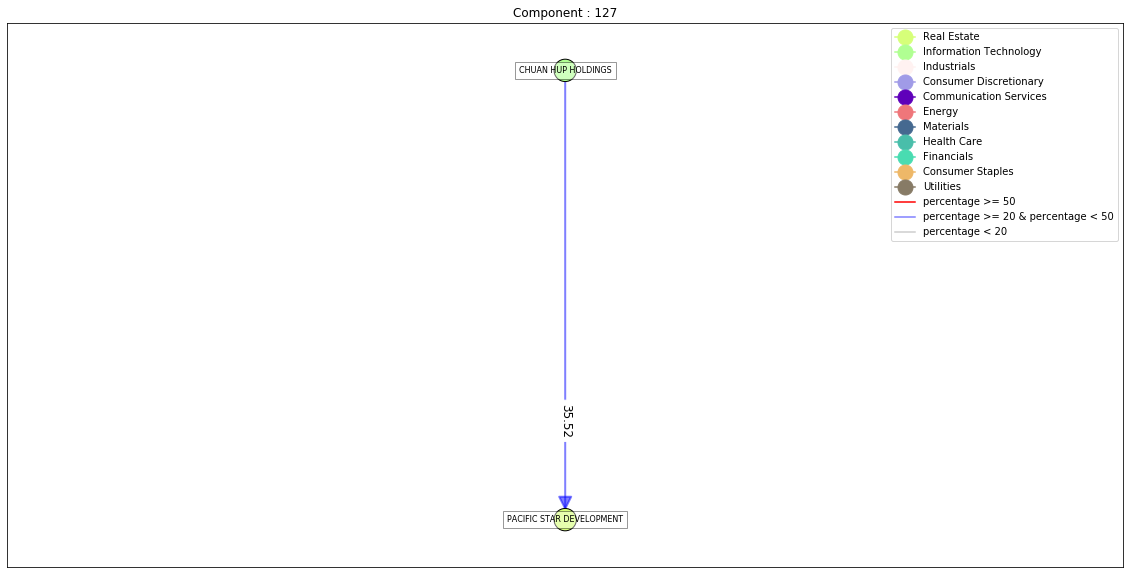

subgraph 130 has 6 nodes


<Figure size 1800x1800 with 0 Axes>

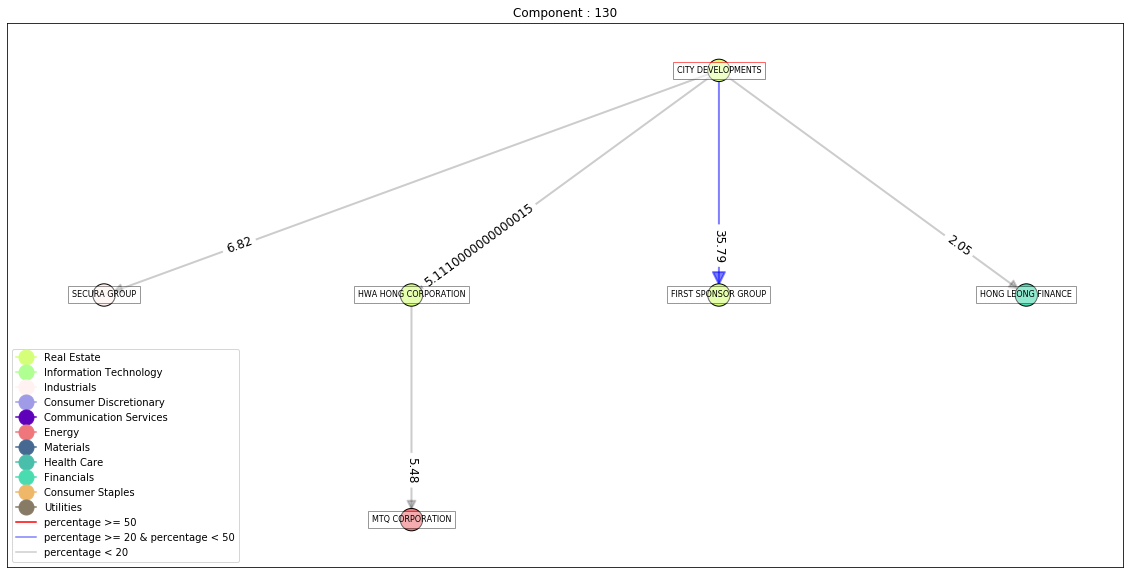

subgraph 135 has 3 nodes


<Figure size 1800x1800 with 0 Axes>

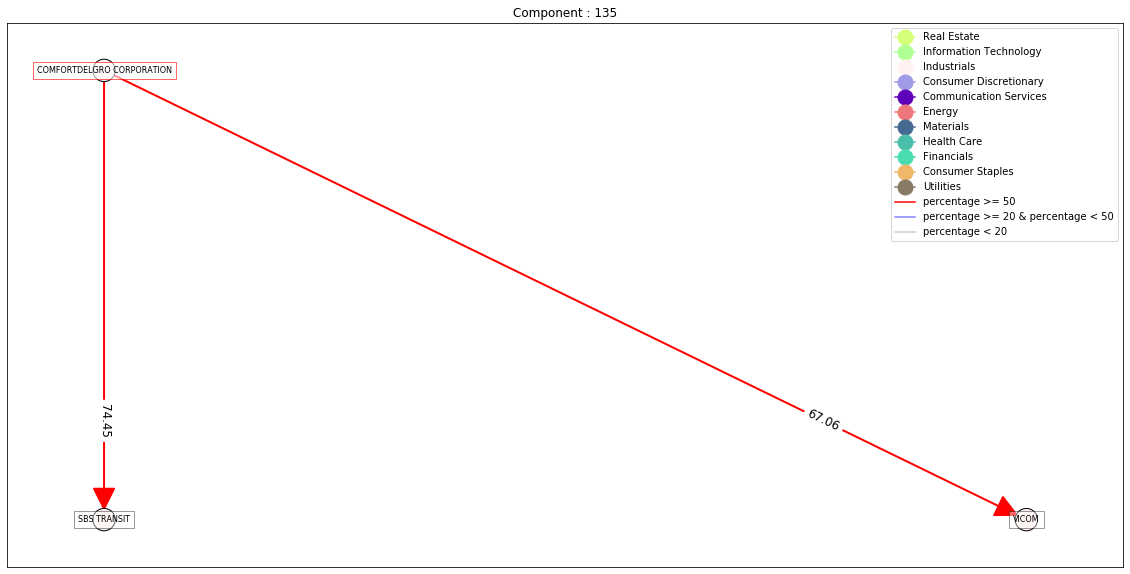

subgraph 142 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

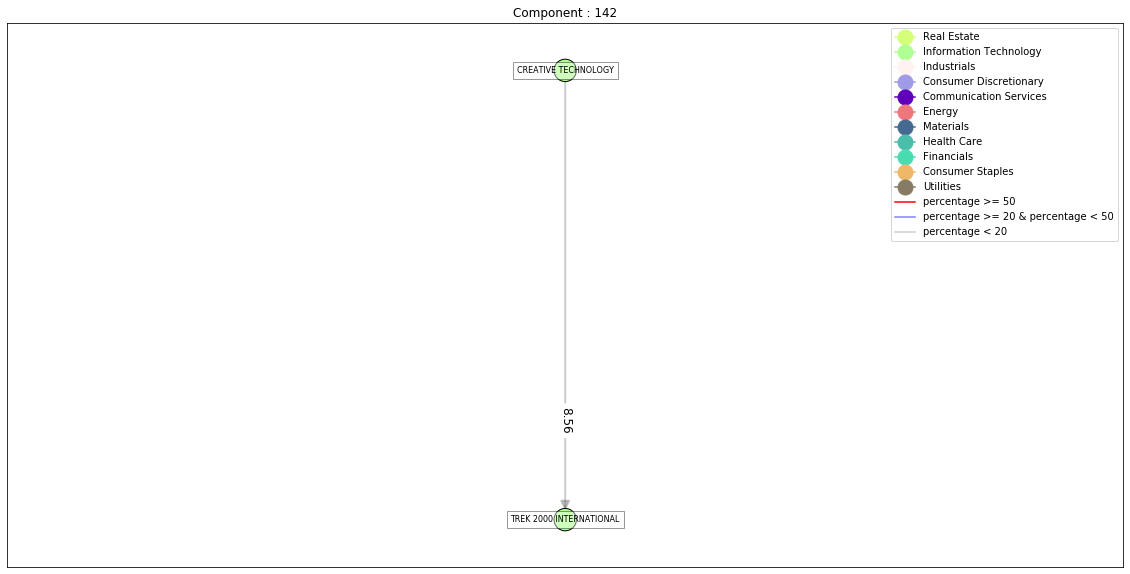

subgraph 147 has 6 nodes


<Figure size 1800x1800 with 0 Axes>

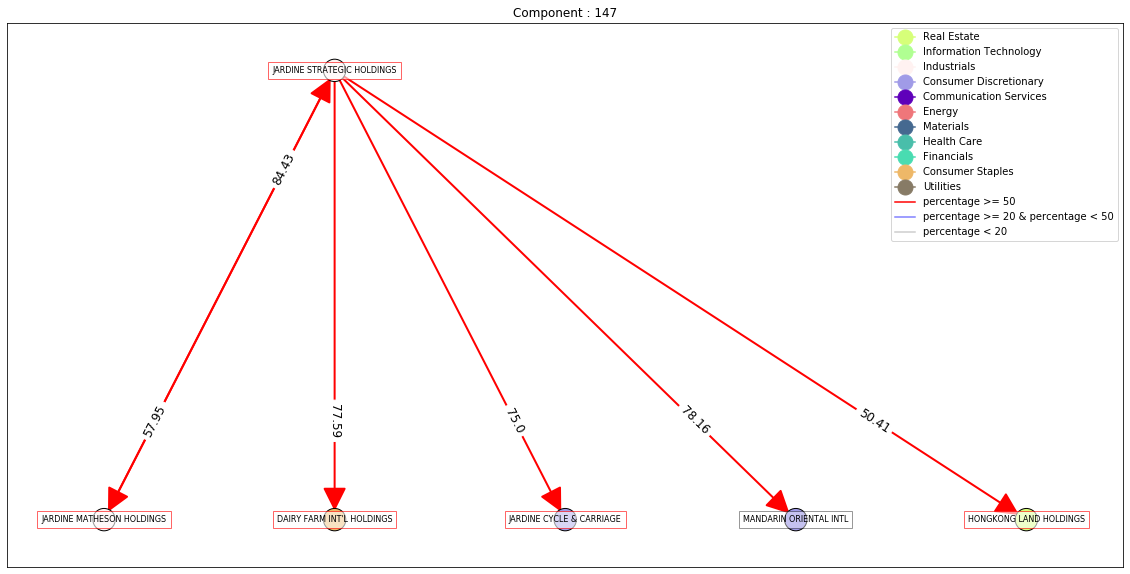

subgraph 160 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

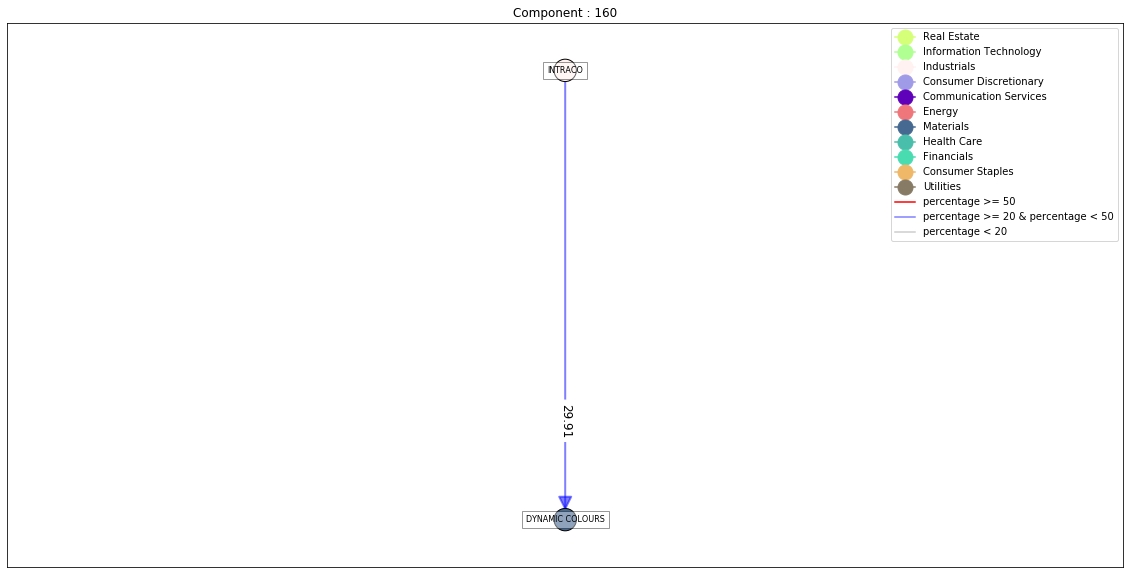

subgraph 167 has 3 nodes


<Figure size 1800x1800 with 0 Axes>

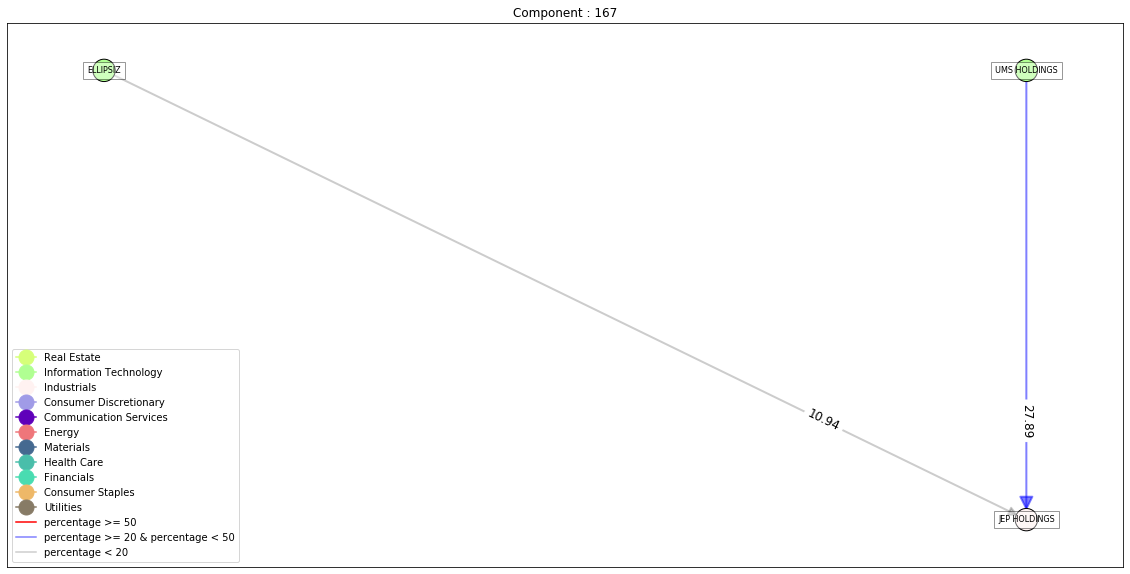

subgraph 172 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

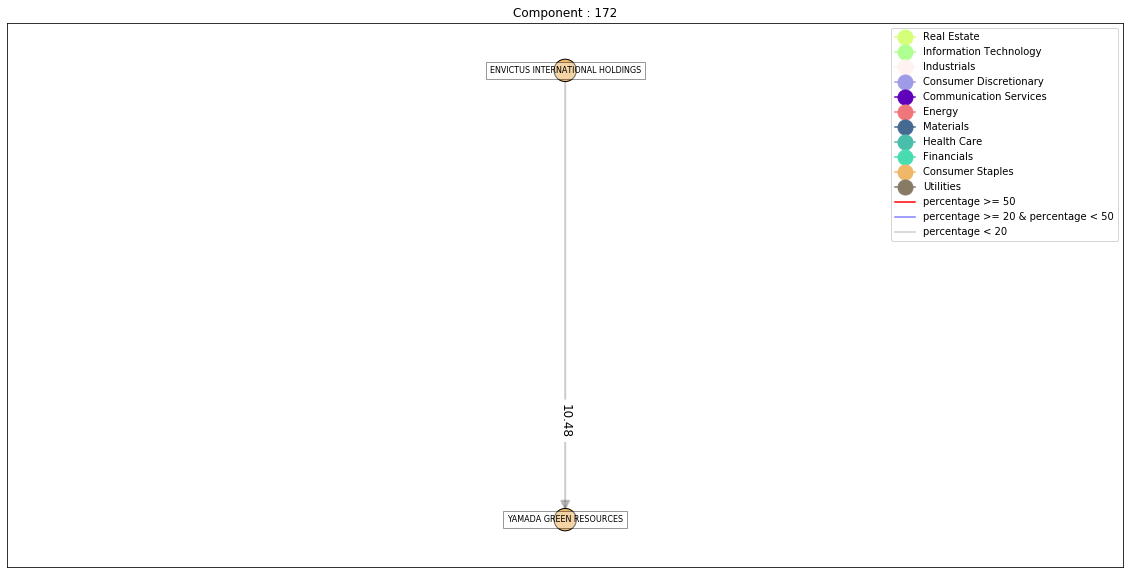

subgraph 189 has 7 nodes


<Figure size 1800x1800 with 0 Axes>

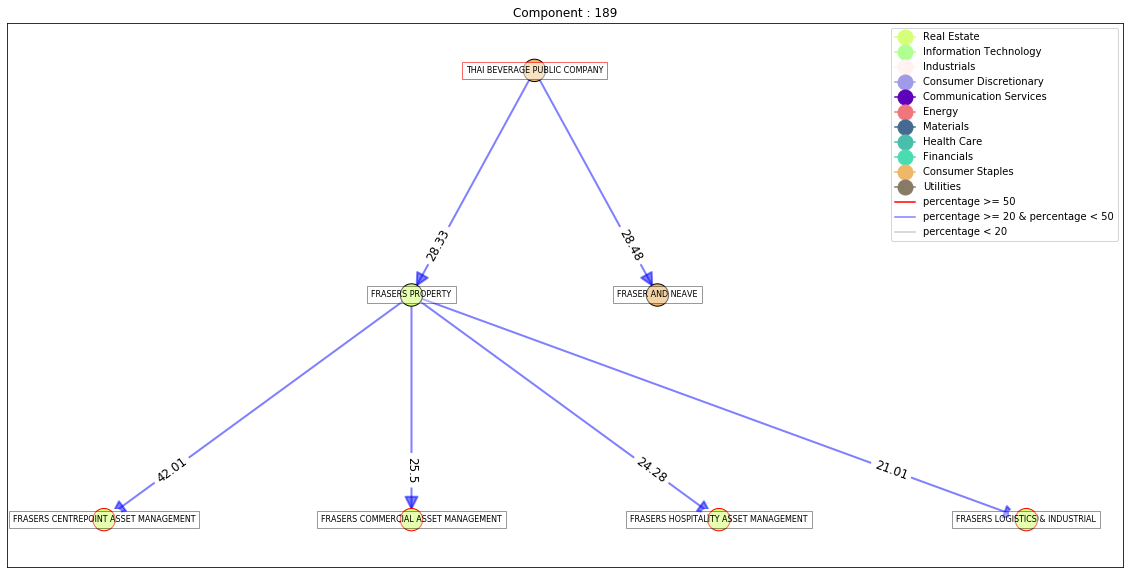

subgraph 202 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

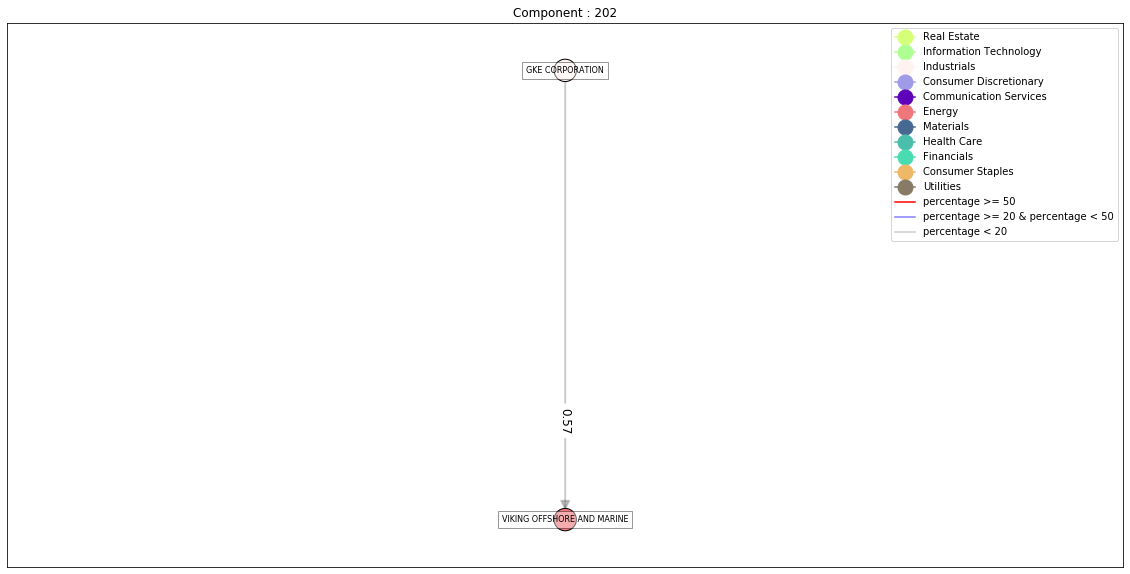

subgraph 225 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

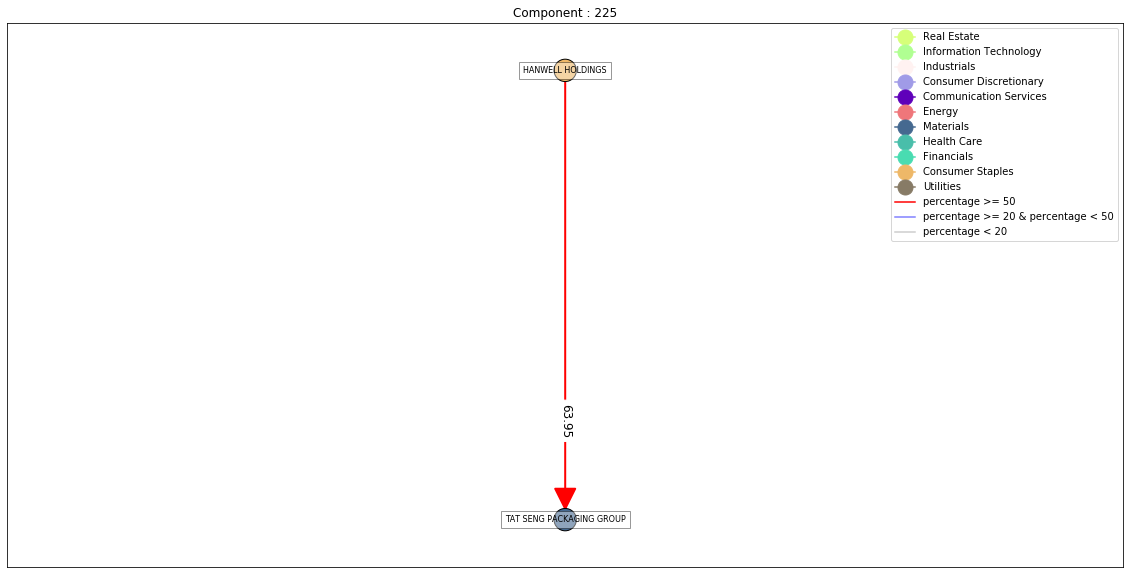

subgraph 227 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

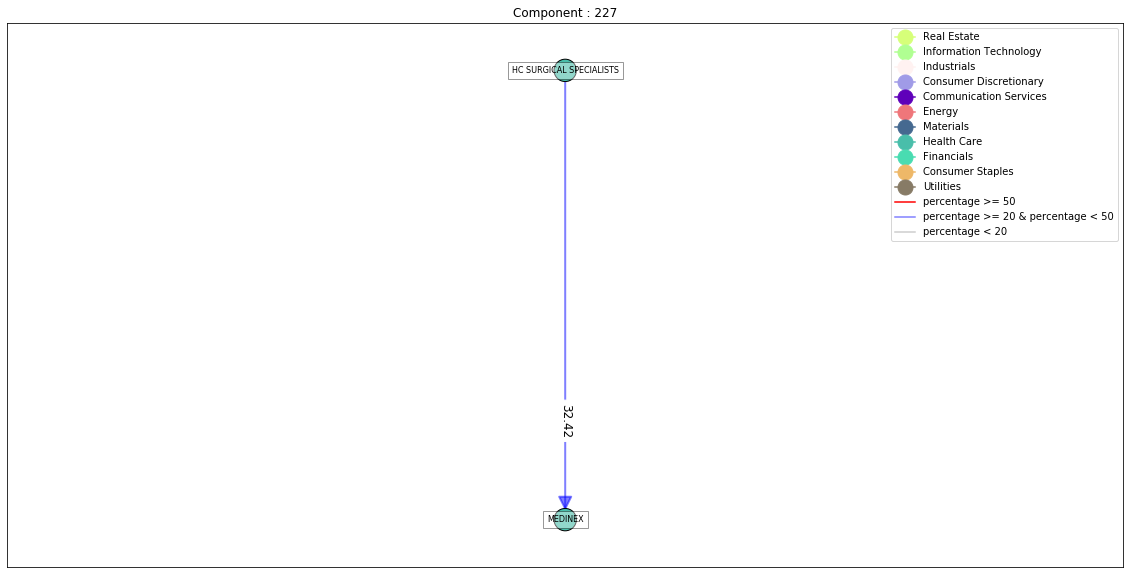

subgraph 236 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

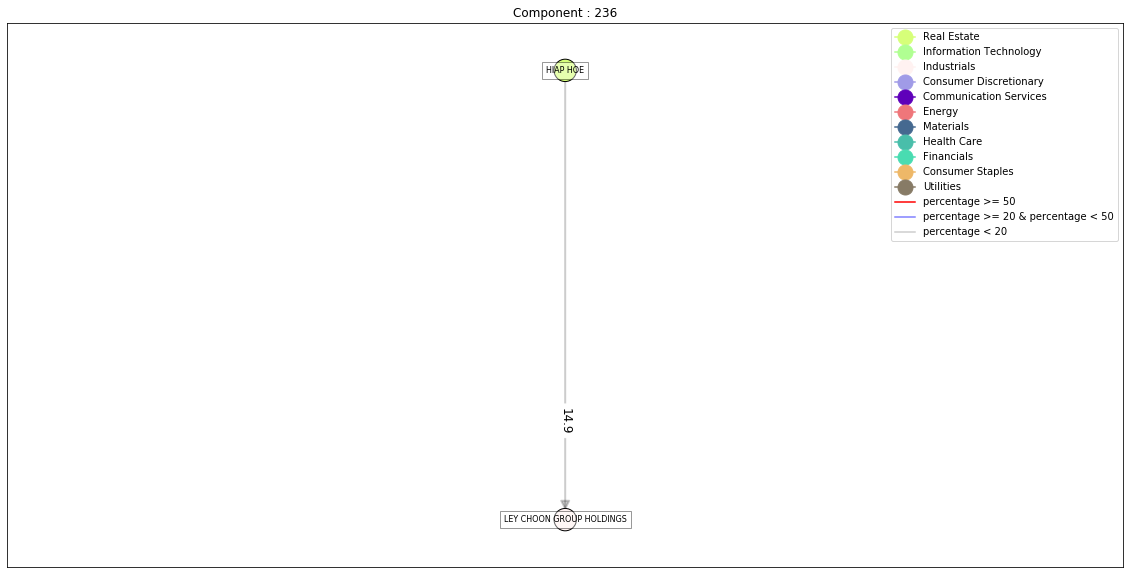

subgraph 251 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

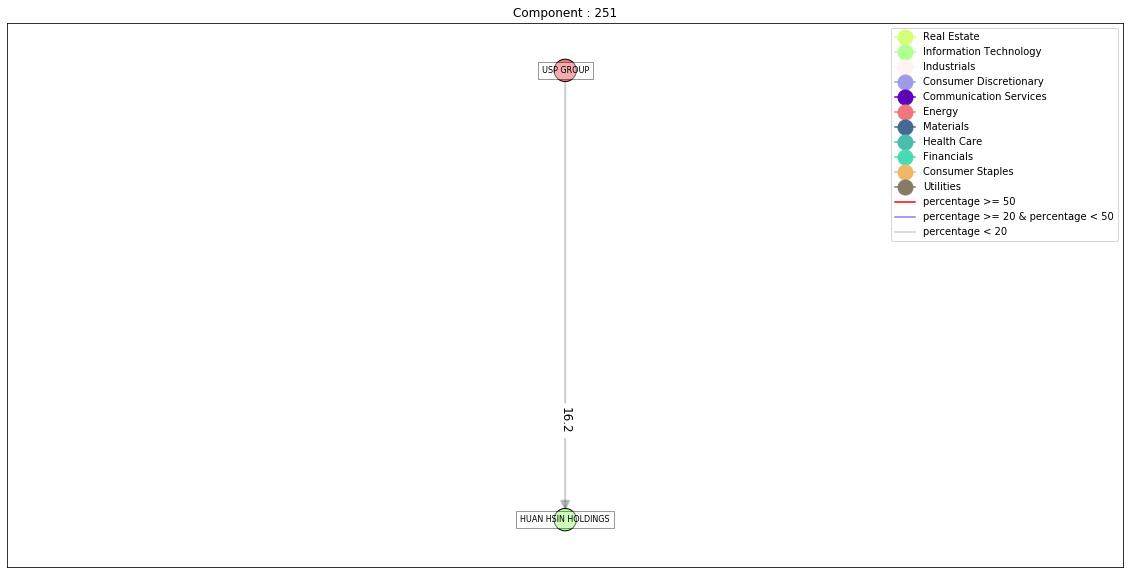

subgraph 257 has 4 nodes


<Figure size 1800x1800 with 0 Axes>

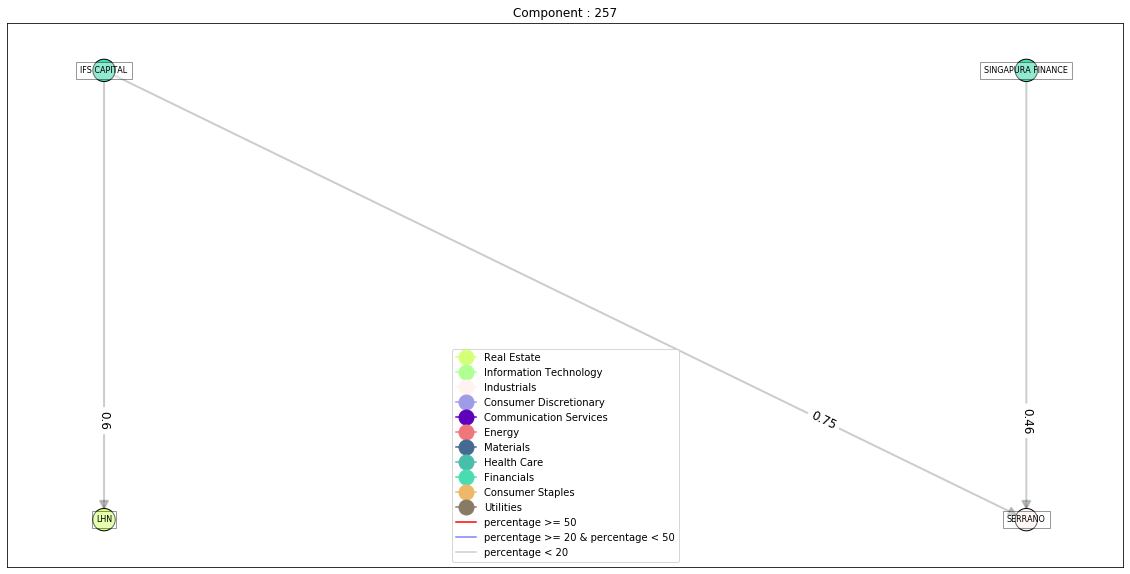

subgraph 293 has 3 nodes


<Figure size 1800x1800 with 0 Axes>

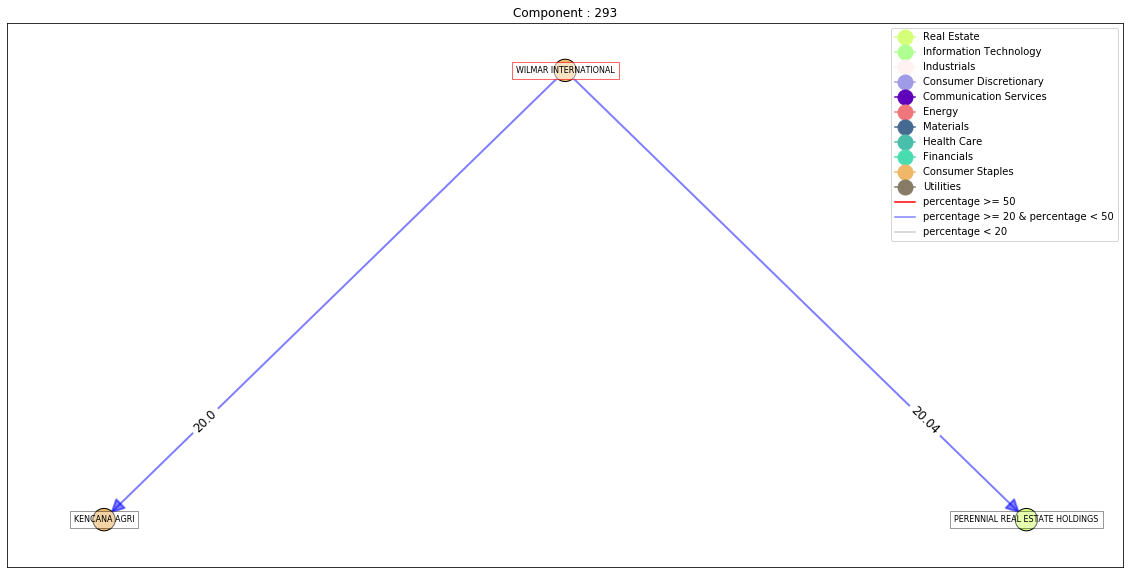

subgraph 294 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

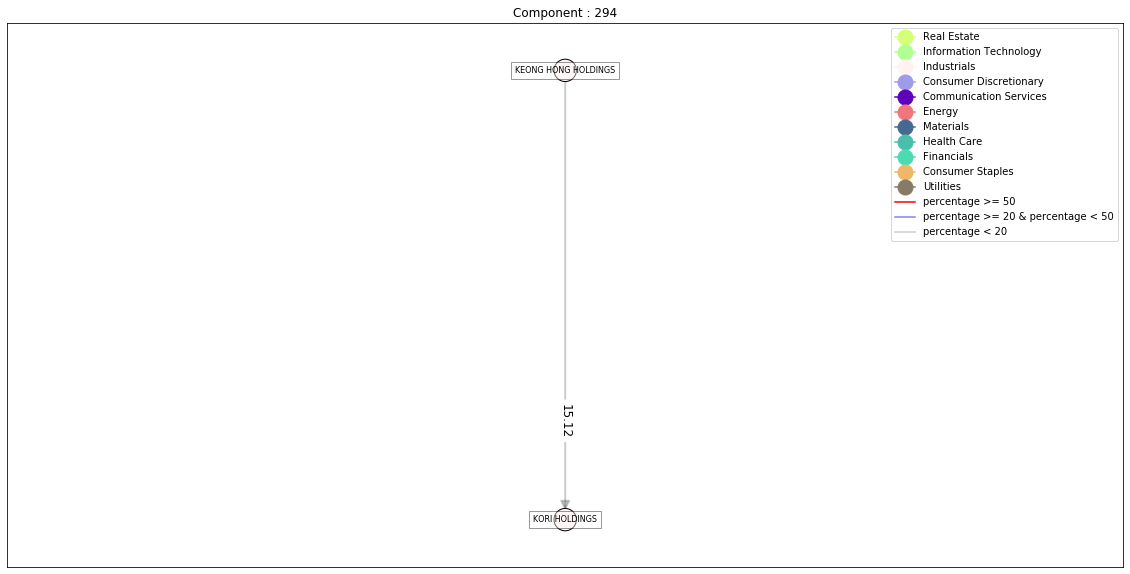

subgraph 303 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

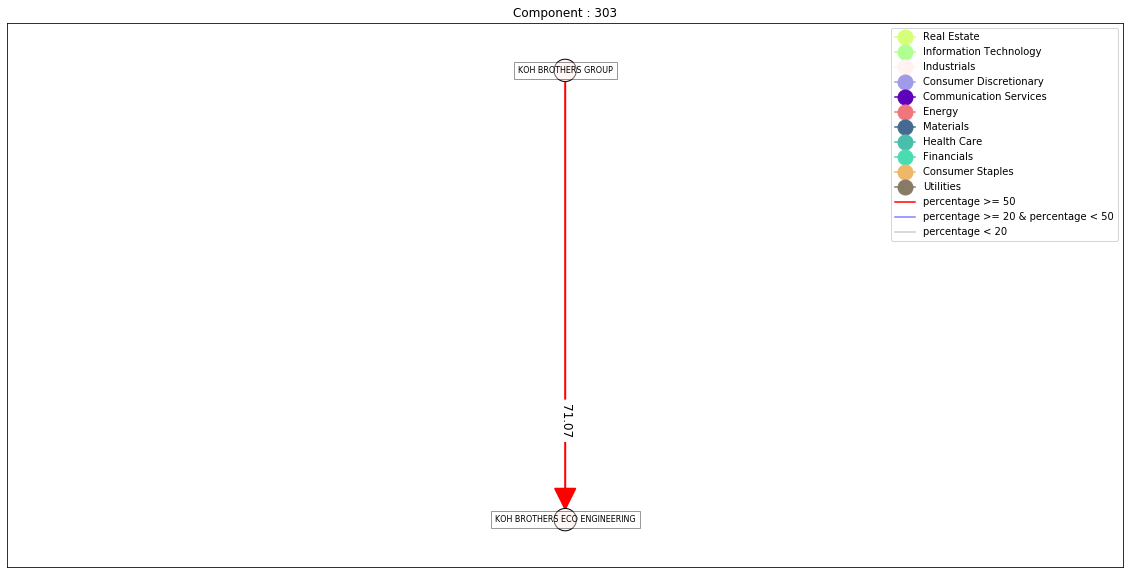

subgraph 318 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

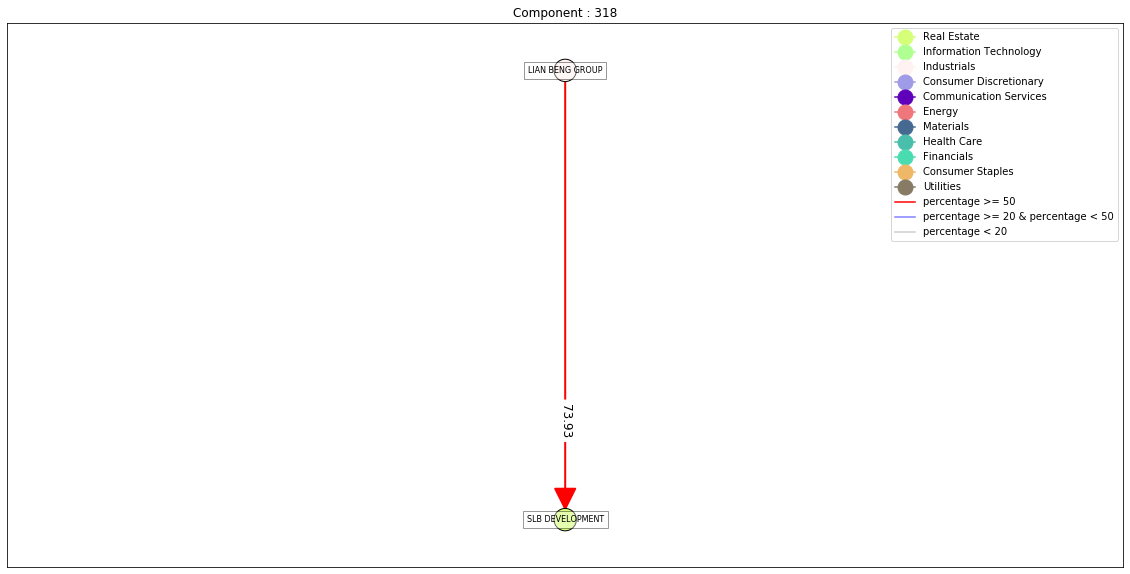

subgraph 347 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

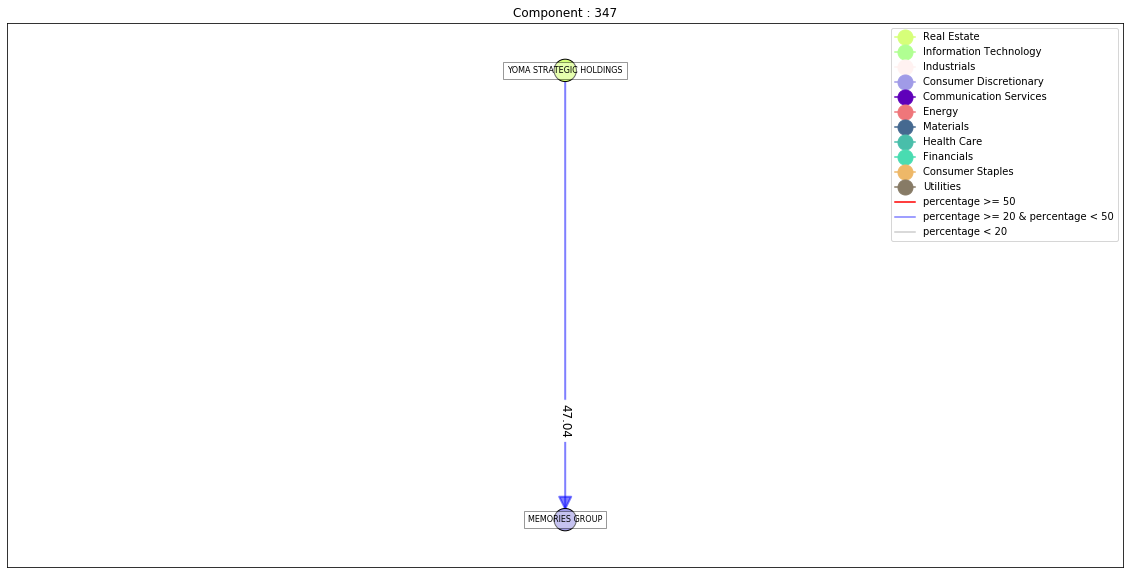

subgraph 373 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

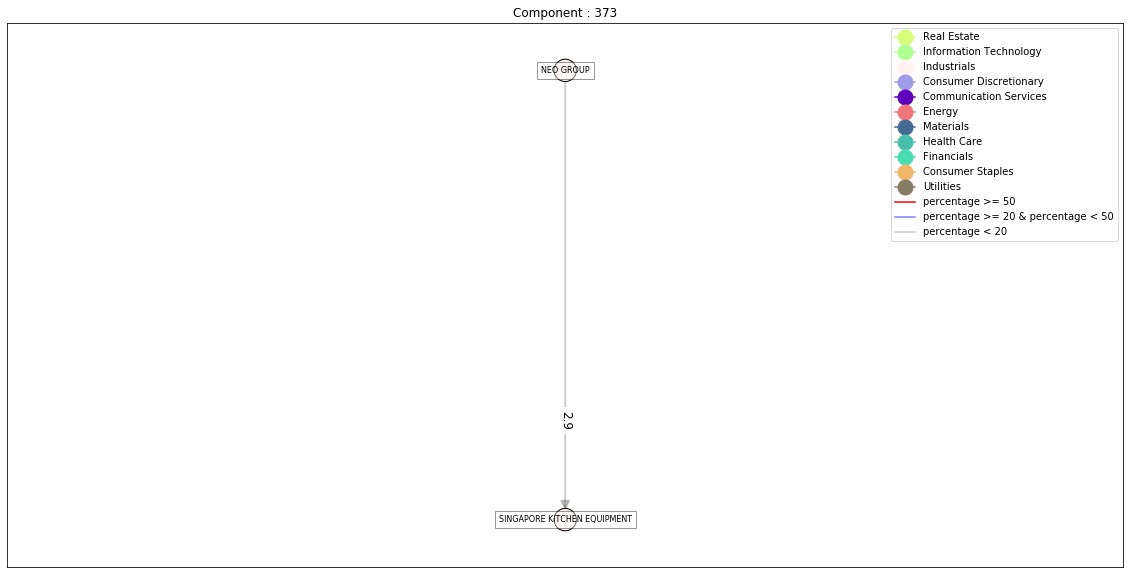

subgraph 496 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

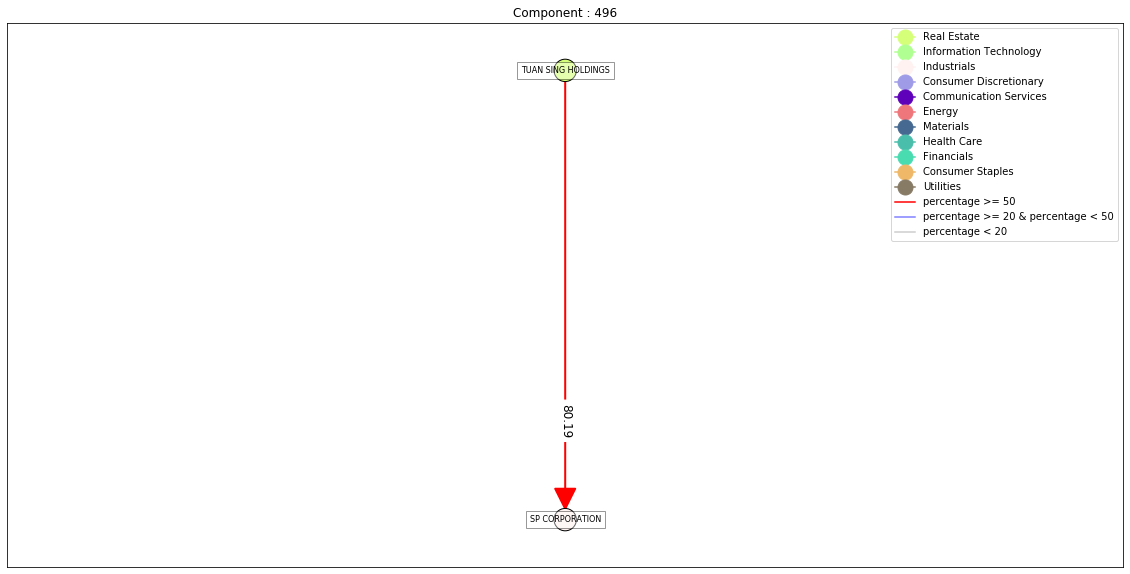

subgraph 525 has 2 nodes


<Figure size 1800x1800 with 0 Axes>

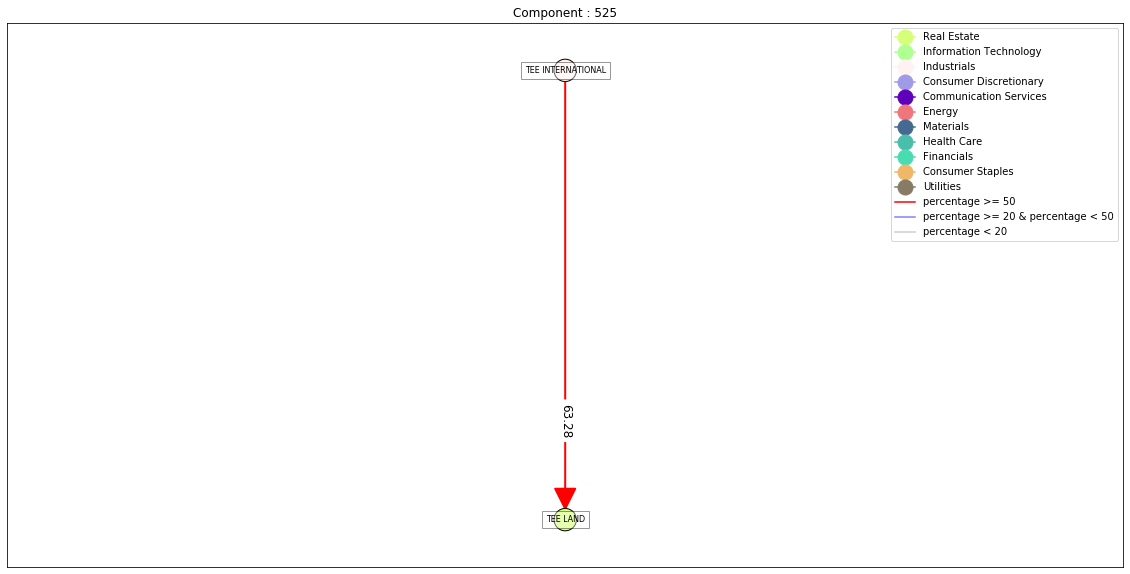

In [99]:
UG = G2.to_undirected()
sub_graphs = (UG.subgraph(c) for c in nx.connected_components(UG))

for i, sg in enumerate(sub_graphs):
#     print(type(sg))
    if sg.number_of_nodes() > 1:
        plt.figure(figsize=(25,25))
        print ("subgraph {} has {} nodes".format(i, sg.number_of_nodes()))
        
#         nx.draw(connected_graph)
        name_list ,name_sti = sti_normal_names(sg.nodes())
        
        short_names = shorten_names(name_list)
        short_names_sti = shorten_names(name_sti)

        sub_graph = G2.subgraph(sg)
        
        outline_edges = edge_colors(sub_graph)
        sect_colors = sector_colors(sub_graph)
        
#         sub_degreeCentrality = nx.pagerank_numpy(sub_graph.reverse())
#         sorted_main_cent = dict(sorted(sub_degreeCentrality.items(), key=lambda x: x[1],reverse=True))
#         for key,cent in sorted_main_cent.items():
#             print(name[key],cent)
#         d_node_sizes = [v * 10000 for v in sub_degreeCentrality.values()]
        
        if sg.number_of_nodes()  > 20:
            plt.figure(figsize = (20,20))
            layout ="twopi"
            font_size_edge = 10
            font_size_text = 8
            offset_label = 0.25
        elif sg.number_of_nodes() > 10 and sg.number_of_nodes()  <20:
            plt.figure(figsize = (20,20))
            layout ="dot"
            font_size_edge = 12
            font_size_text = 10
            offset_label = 0.25
        else:
            plt.figure(figsize = (20,10))   
            layout ="dot"
            font_size_edge = 12
            font_size_text = 8
            offset_label = 0.22

        subgraph_arcweight=cleaned_edges(sub_graph)

    #     write_dot(sub_graph,'test.dot')
        pos =graphviz_layout(sub_graph, prog=layout)
        nx.draw_networkx_nodes(sub_graph,pos,node_color=sect_colors,node_size = 500,edgecolors=outline_edges)

        elarge = [(u, v) for (u, v, d) in sub_graph.edges(data=True) if d['weight'] > 50]
        esmed = [(u, v) for (u, v, d) in sub_graph.edges(data=True) if d['weight'] >= 20 and d['weight'] <=50]
        esmall = [(u, v) for (u, v, d) in sub_graph.edges(data=True) if d['weight'] < 20]

        nx.draw_networkx_edges(sub_graph, pos, edgelist=elarge,alpha=1,arrowstyle='-|>',arrowsize=50,arrows=True,
                               width=2,edge_color='r')
        nx.draw_networkx_edges(sub_graph, pos,edgelist=esmed,alpha=0.5,arrowstyle='-|>',arrowsize=30,arrows=True,
                               width=2,edge_color='blue')
        nx.draw_networkx_edges(sub_graph, pos,edgelist=esmall,alpha=0.2,arrowstyle='-|>',arrowsize=20,arrows=True,
                               width=2,edge_color='black')

        nx.draw_networkx_edge_labels(sub_graph,pos,edge_labels=subgraph_arcweight,label_pos=offset_label,font_size=font_size_edge)
        nx.draw_networkx_labels(sub_graph,pos,labels=short_names,font_size=font_size_text,bbox=dict(facecolor="white",alpha=0.4))
        nx.draw_networkx_labels(sub_graph,pos,labels=short_names_sti,font_size=font_size_text,bbox=dict(facecolor="white",edgecolor="red",alpha=0.6))

        plt.legend(handles=final_list)
        plt.title("Component : "+str(i))
        plt.savefig("./figures/components_graph/component "+str(i)+"_subgraph.png")
        plt.show()
        plt.close()

### Identify root node and plot tree graph

In [100]:
root_nodes = []
for item in G2:
    if len(nx.ancestors(G2,item)) == 0 and len(nx.descendants(G2,item)) > 0:
#         print(item)
        root_nodes.append(item)

ACCRELIST LIMITED 0.6491228070175439
JUBILEE INDUSTRIES HOLDINGS LIMITED 0.3508771929824561


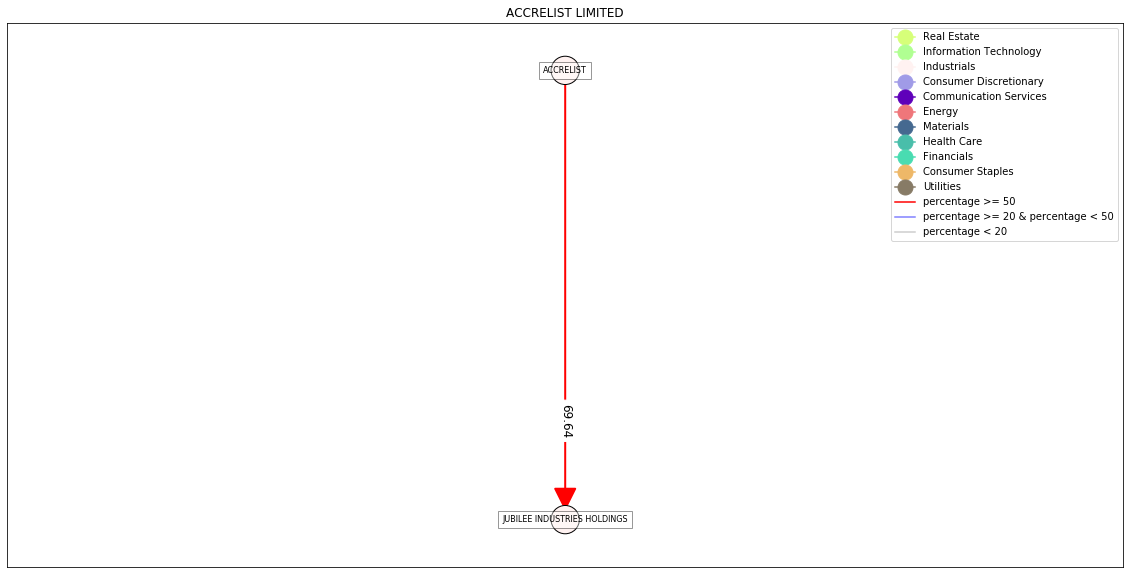

ASPIAL CORPORATION LIMITED 0.5419847328244275
AF GLOBAL LIMITED 0.1526717557251909
WORLD CLASS GLOBAL LIMITED 0.1526717557251909
MAXI-CASH FINANCIAL SERVICES CORPORATION LIMITED 0.15267175572519084


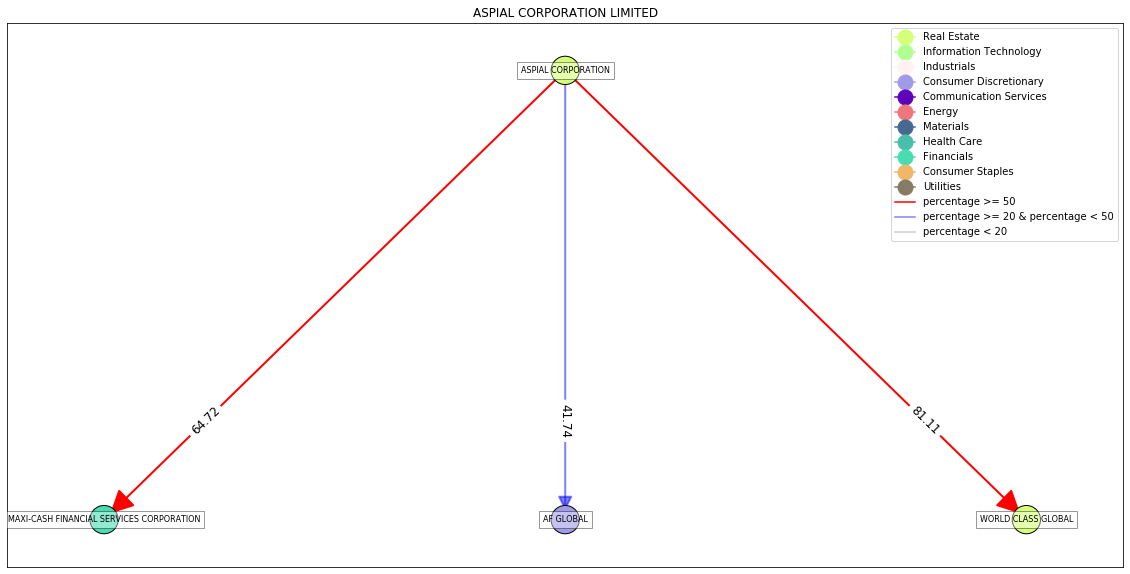

ASTI HOLDINGS LIMITED 0.574468085106383
ADVANCED SYSTEMS AUTOMATION LIMITED 0.21276595744680854
DRAGON GROUP INTL LIMITED 0.21276595744680854


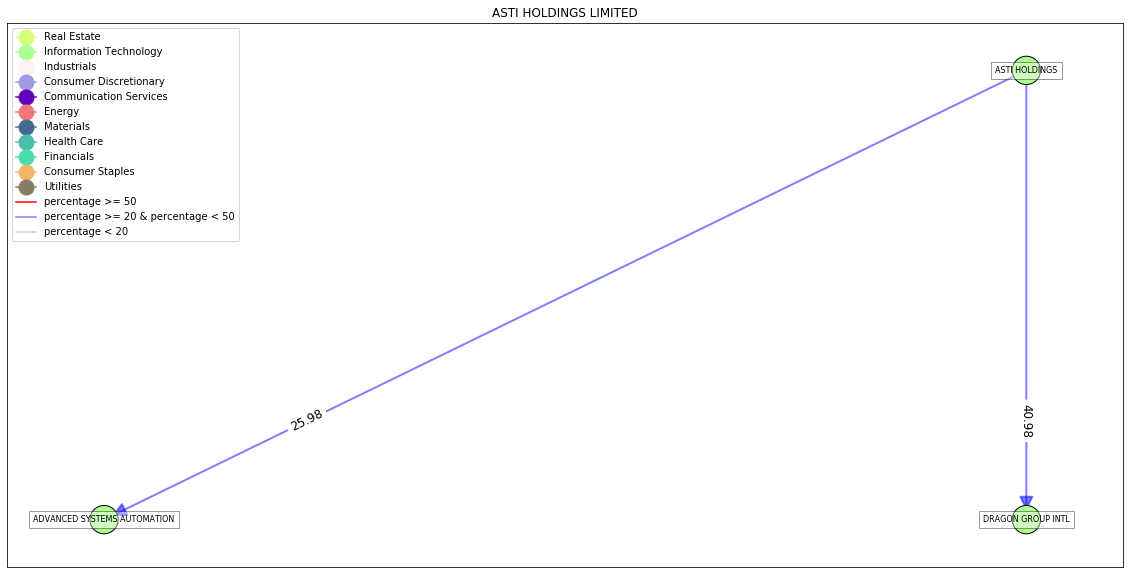

BAKER TECHNOLOGY LIMITED 0.6491228070175439
CH OFFSHORE LIMITED 0.3508771929824561


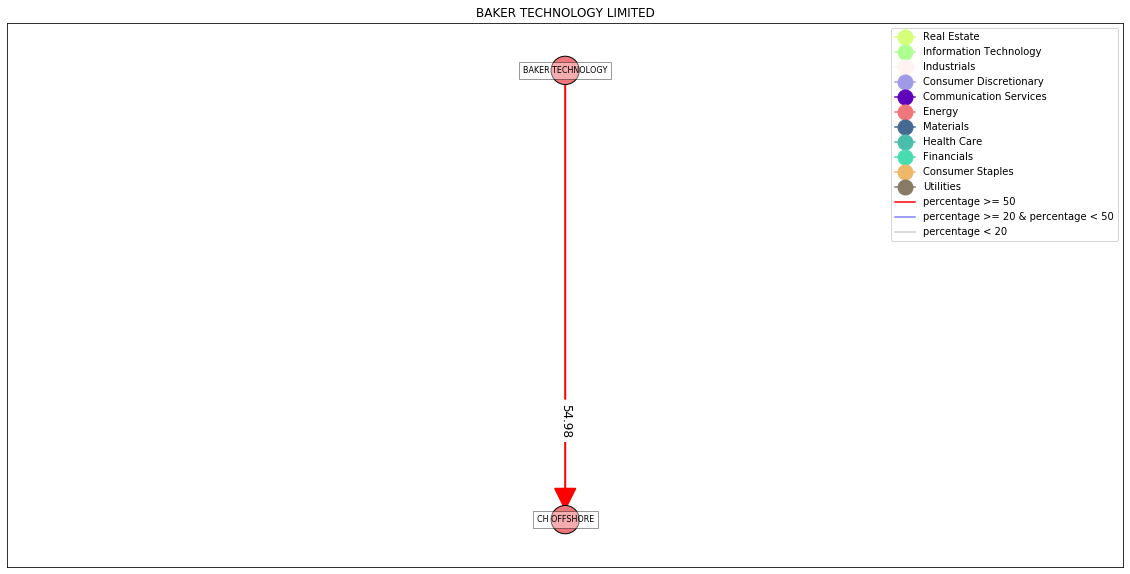

BLUMONT GROUP LIMITED 0.6491228070175439
CHASWOOD RESOURCES HOLDINGS LIMITED 0.3508771929824561


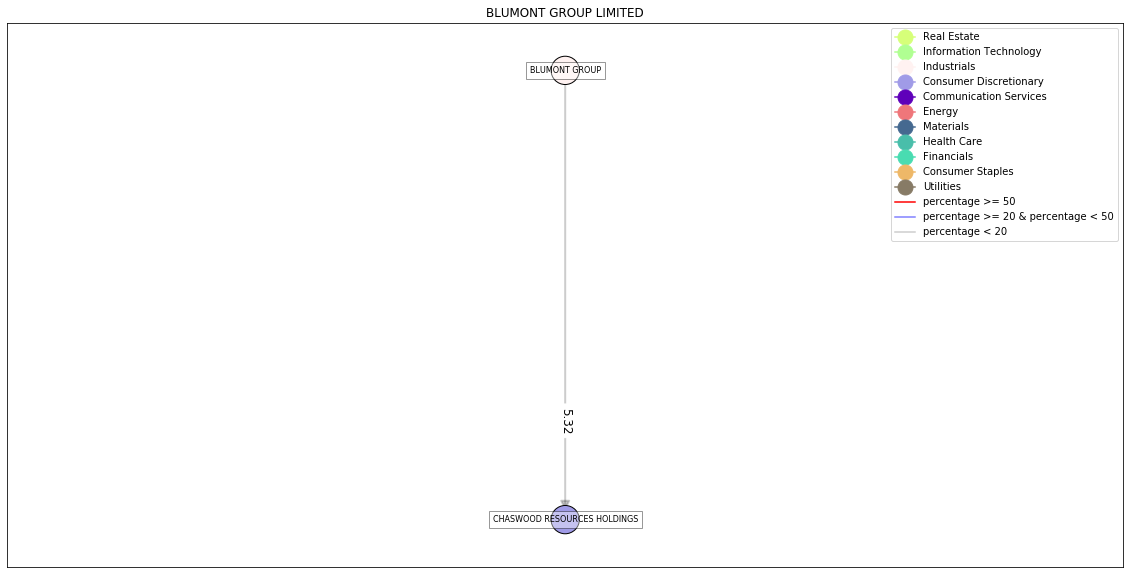

BONVESTS HOLDINGS LIMITED 0.6491228070175439
COLEX HOLDINGS LIMITED 0.3508771929824561


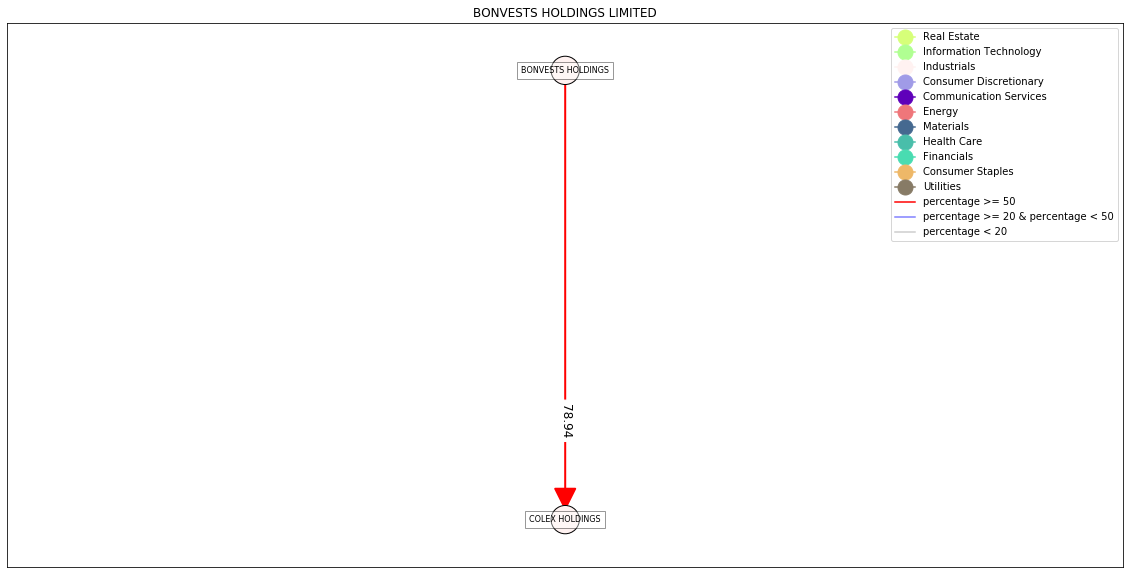

BOUSTEAD SINGAPORE LIMITED 0.6491228070175439
BOUSTEAD PROJECTS LIMITED 0.3508771929824561


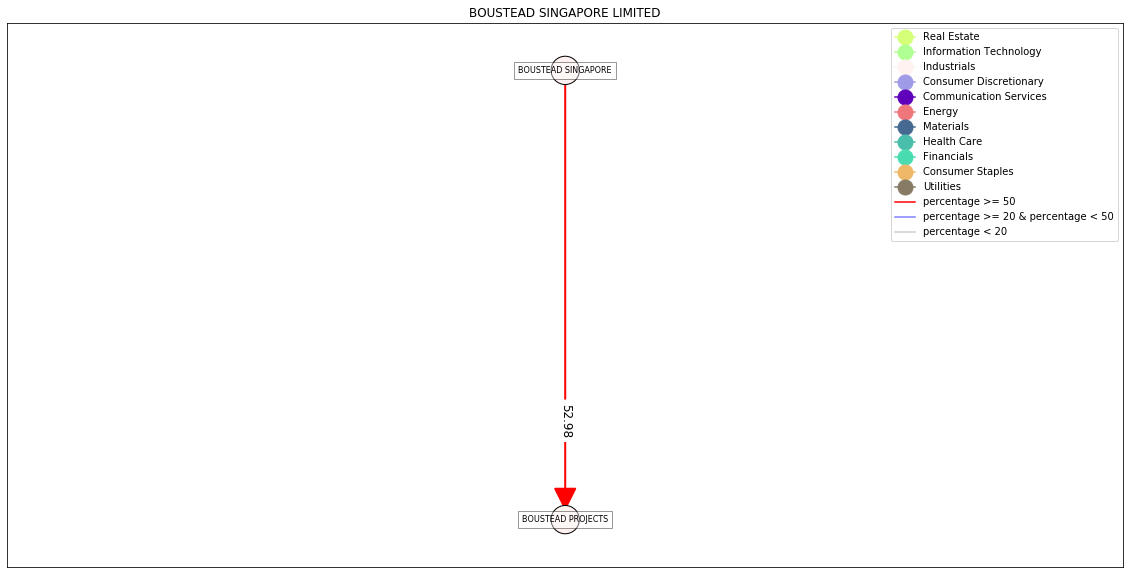

CHUAN HUP HOLDINGS LIMITED 0.6491228070175439
PACIFIC STAR DEVELOPMENT LIMITED 0.3508771929824561


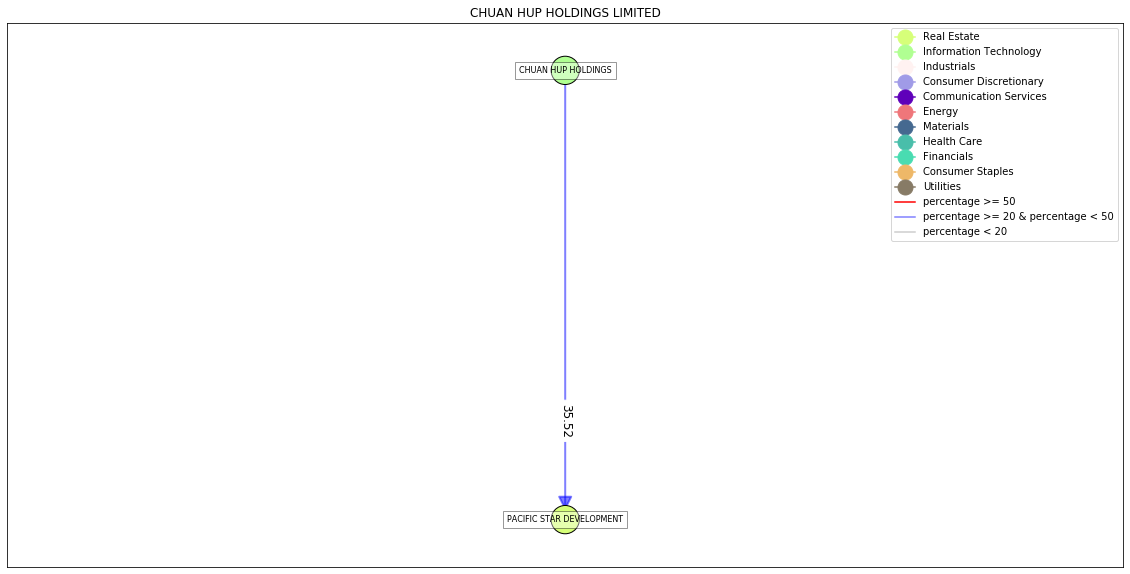

CITY DEVELOPMENTS LIMITED 0.4668489405331511
HWA HONG CORPORATION LIMITED 0.16860332649806326
SECURA GROUP LIMITED 0.09113693324219642
FIRST SPONSOR GROUP LIMITED 0.09113693324219639
HONG LEONG FINANCE LIMITED 0.09113693324219639
MTQ CORPORATION LIMITED 0.09113693324219635


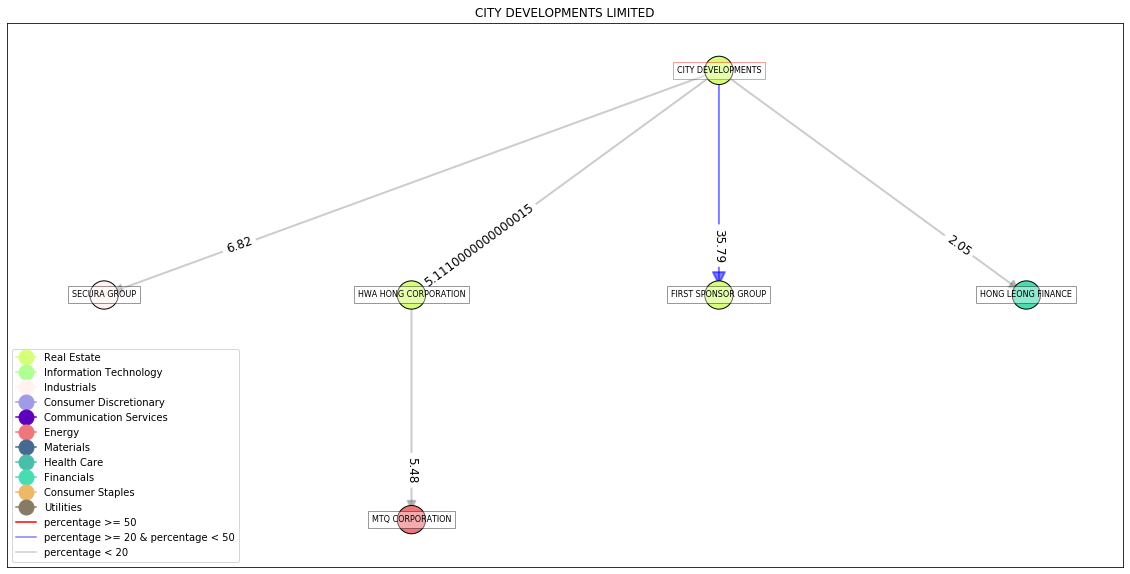

CLEARBRIDGE HEALTH LIMITED 0.6491228070175439
BIOLIDICS LIMITED 0.3508771929824561


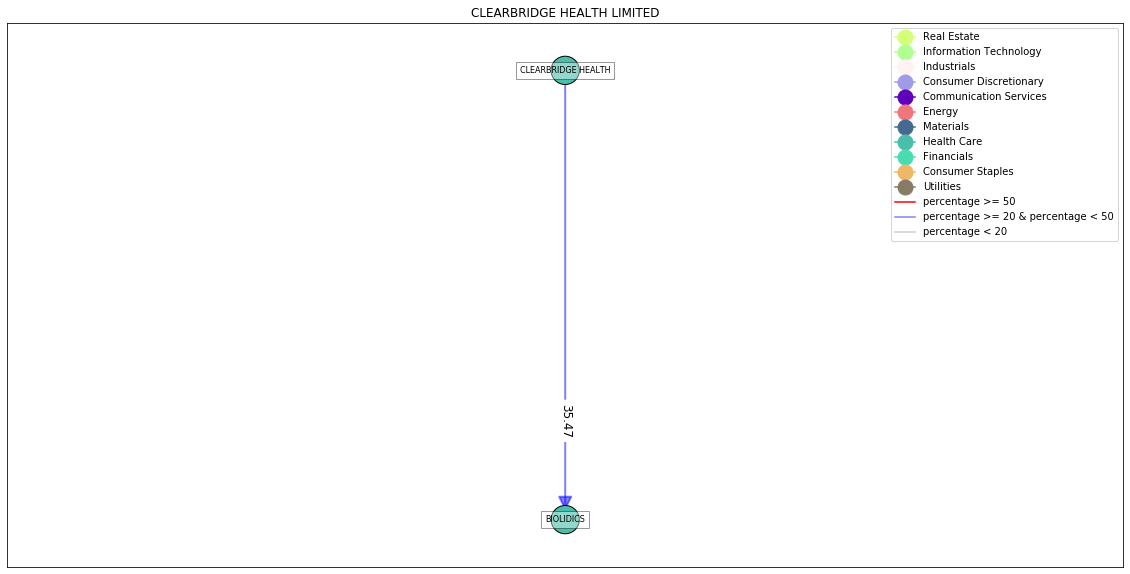

COMFORTDELGRO CORPORATION LIMITED 0.5744680851063829
VICOM LIMITED 0.2127659574468086
SBS TRANSIT LIMITED 0.21276595744680848


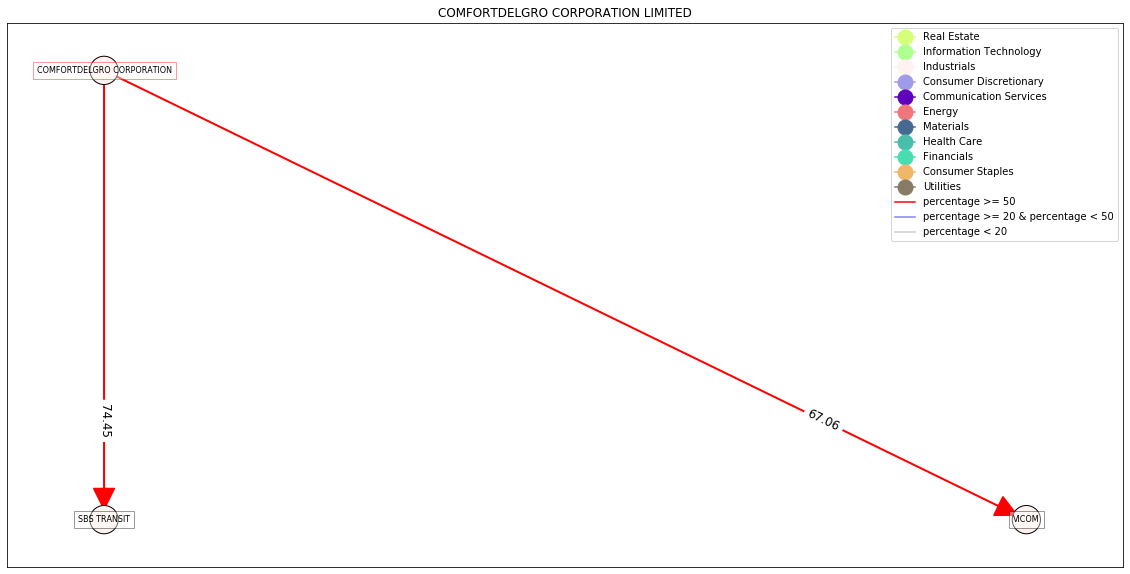

CREATIVE TECHNOLOGY LIMITED 0.6491228070175439
TREK 2000 INTERNATIONAL LIMITED 0.3508771929824561


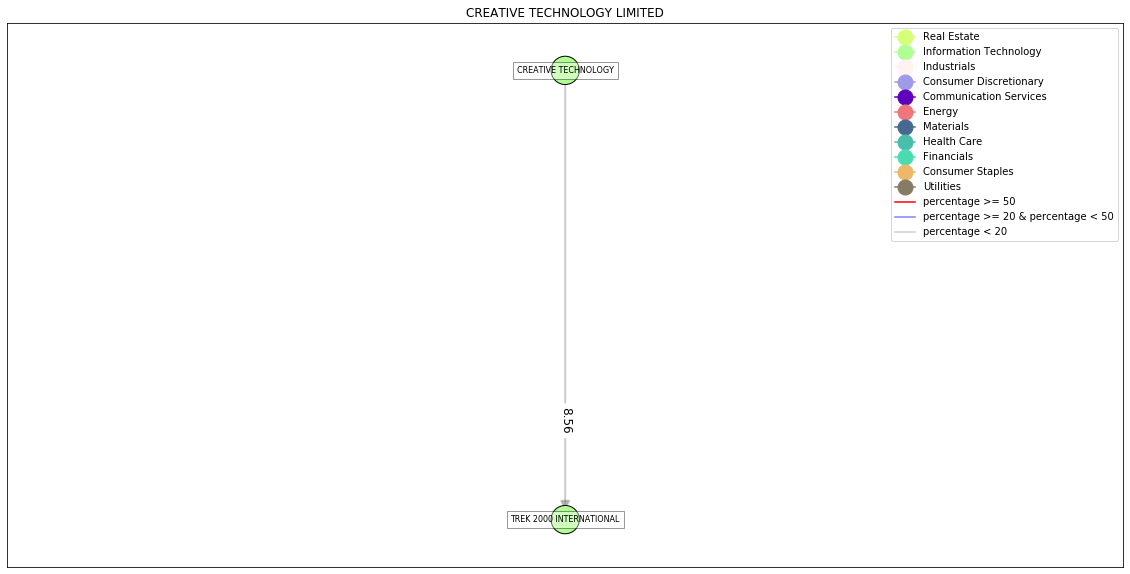

ELLIPSIZ LIMITED 0.6491228070175439
JEP HOLDINGS LIMITED 0.3508771929824561


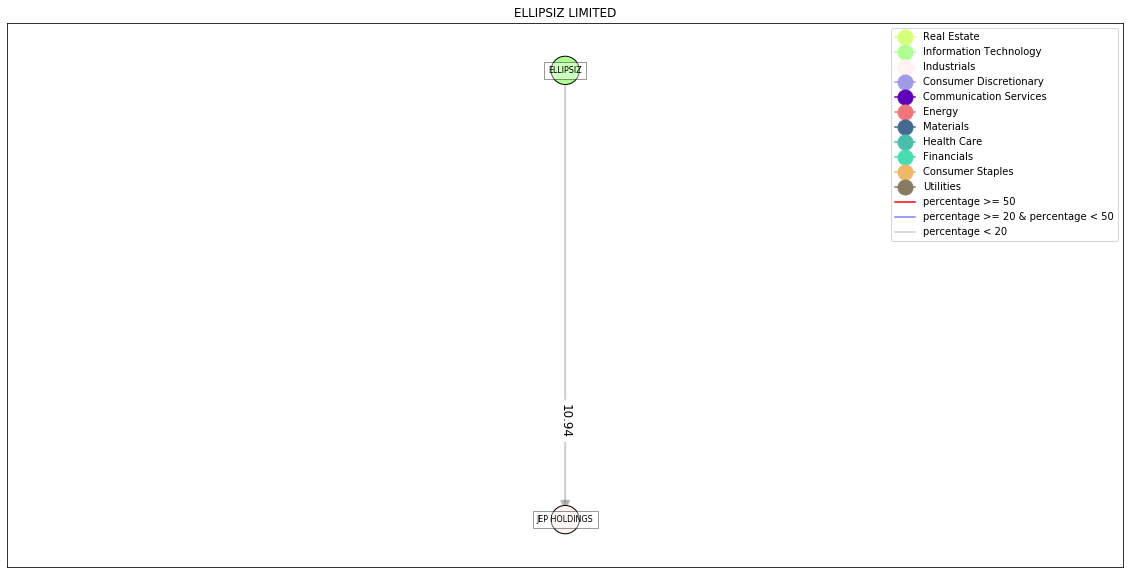

ENVICTUS INTERNATIONAL HOLDINGS LIMITED 0.6491228070175439
YAMADA GREEN RESOURCES LIMITED 0.3508771929824561


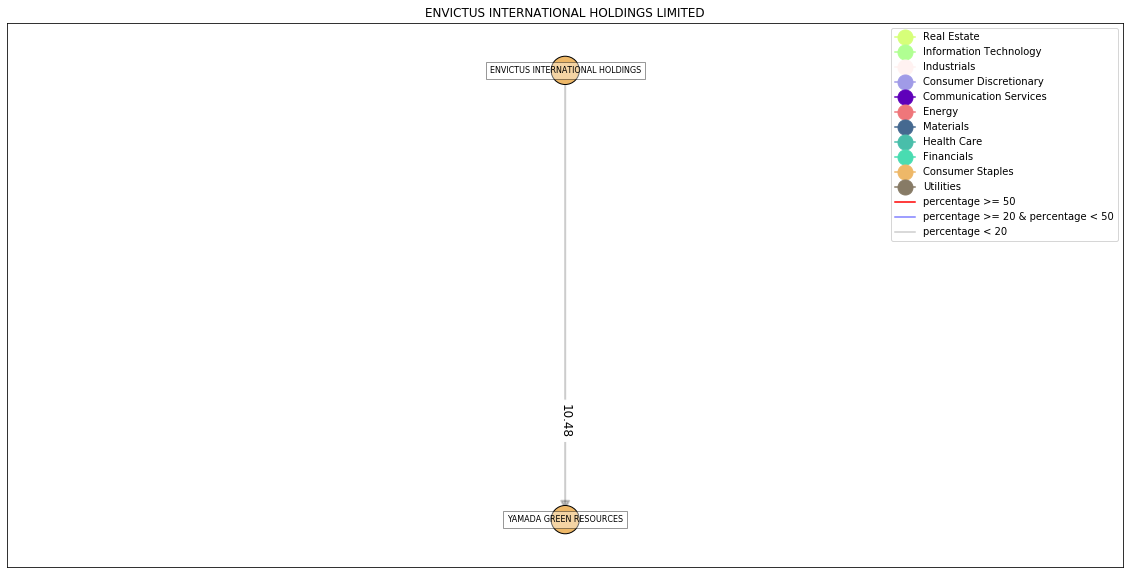

EZION HOLDINGS LIMITED 0.5419847328244274
AUSGROUP LIMITED 0.1526717557251909
CHARISMA ENERGY SERVICES LIMITED 0.15267175572519082
ALPHA ENERGY HOLDINGS LIMITED 0.15267175572519082


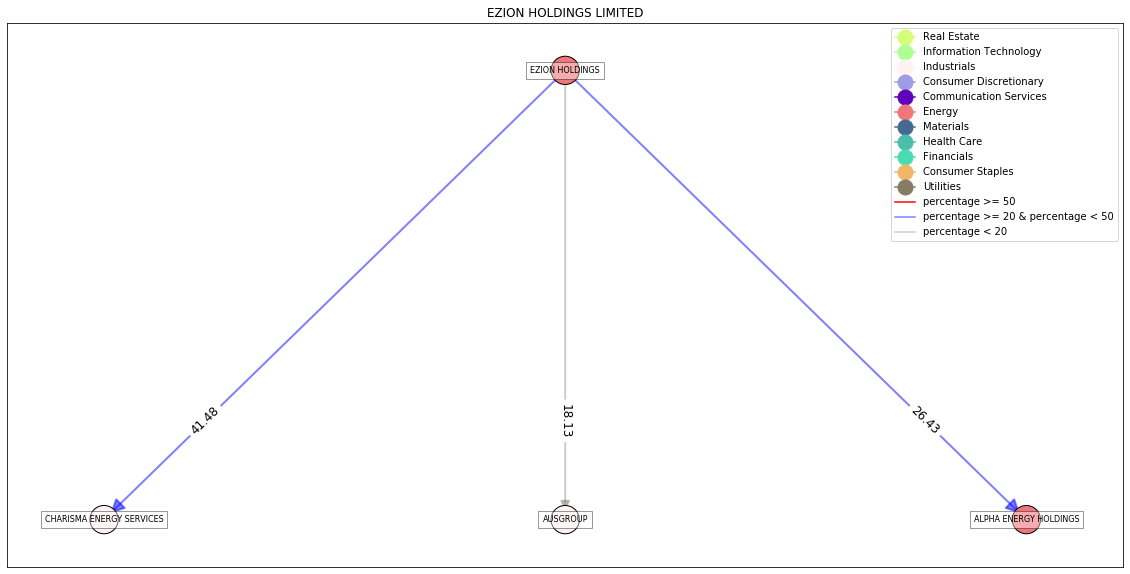

FALCON ENERGY GROUP LIMITED 0.6491228070175439
CH OFFSHORE LIMITED 0.3508771929824561


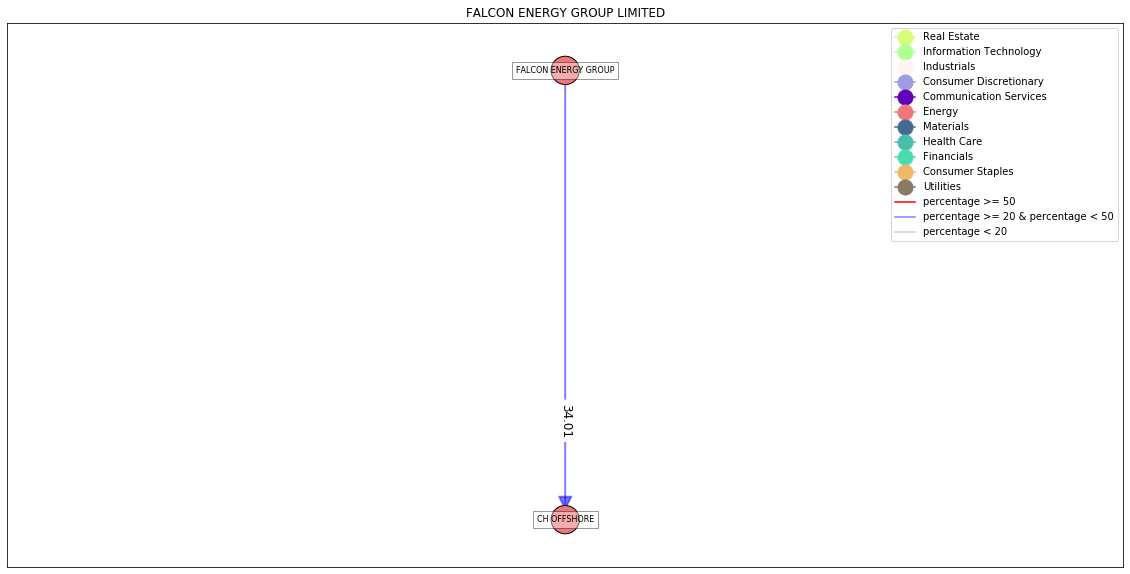

FRAGRANCE GROUP LIMITED 0.6491228070175439
AF GLOBAL LIMITED 0.3508771929824561


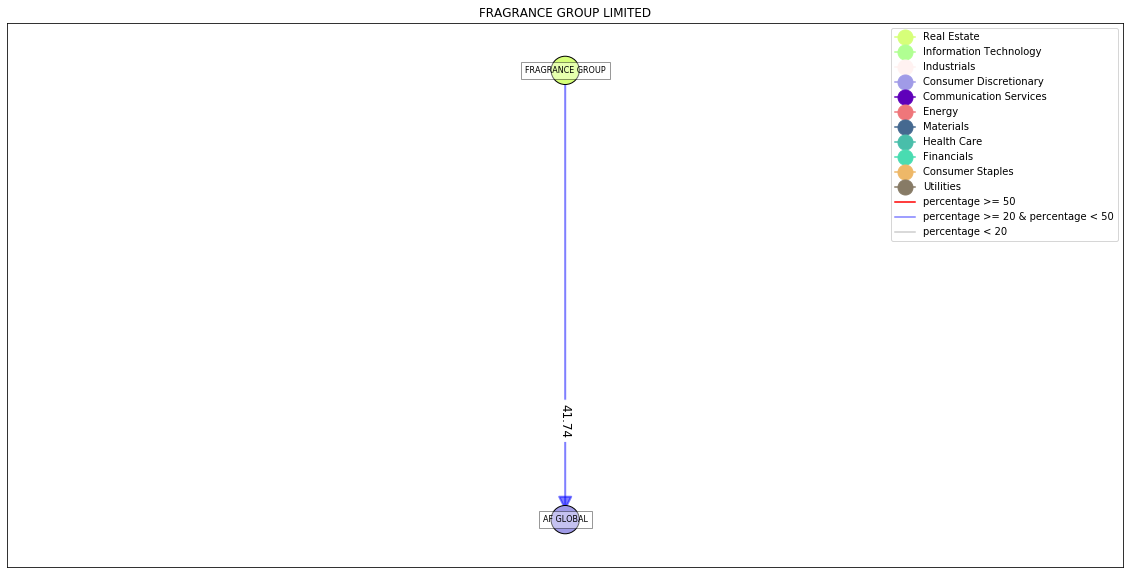

GKE CORPORATION LIMITED 0.6491228070175439
VIKING OFFSHORE AND MARINE LIMITED 0.3508771929824561


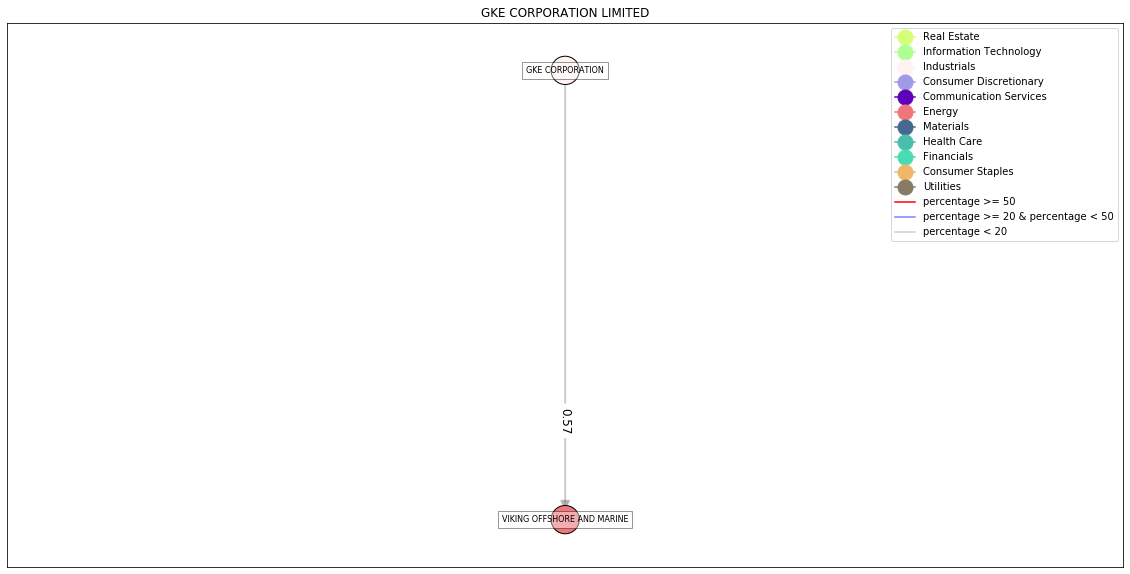

HANWELL HOLDINGS LIMITED 0.6491228070175439
TAT SENG PACKAGING GROUP LIMITED 0.3508771929824561


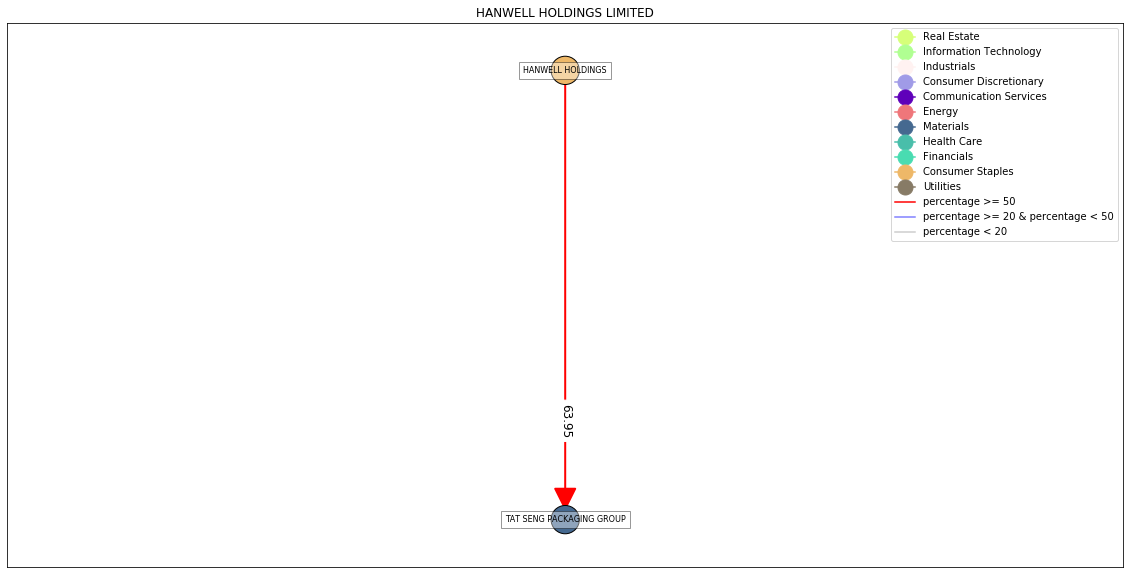

HC SURGICAL SPECIALISTS LIMITED 0.6491228070175439
MEDINEX LIMITED 0.3508771929824561


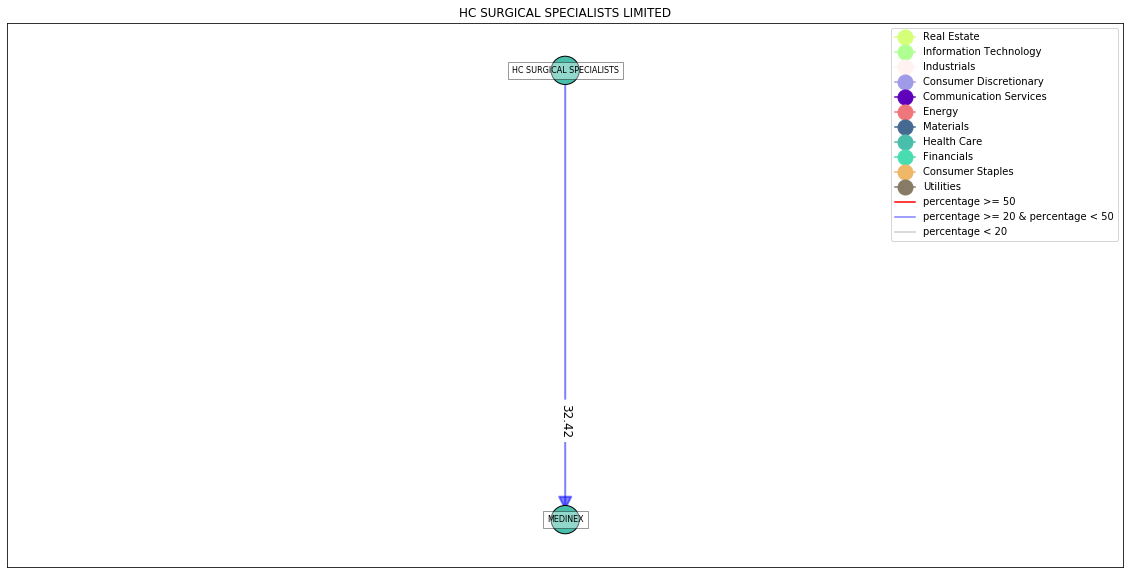

HIAP HOE LIMITED 0.6491228070175439
LEY CHOON GROUP HOLDINGS LIMITED 0.3508771929824561


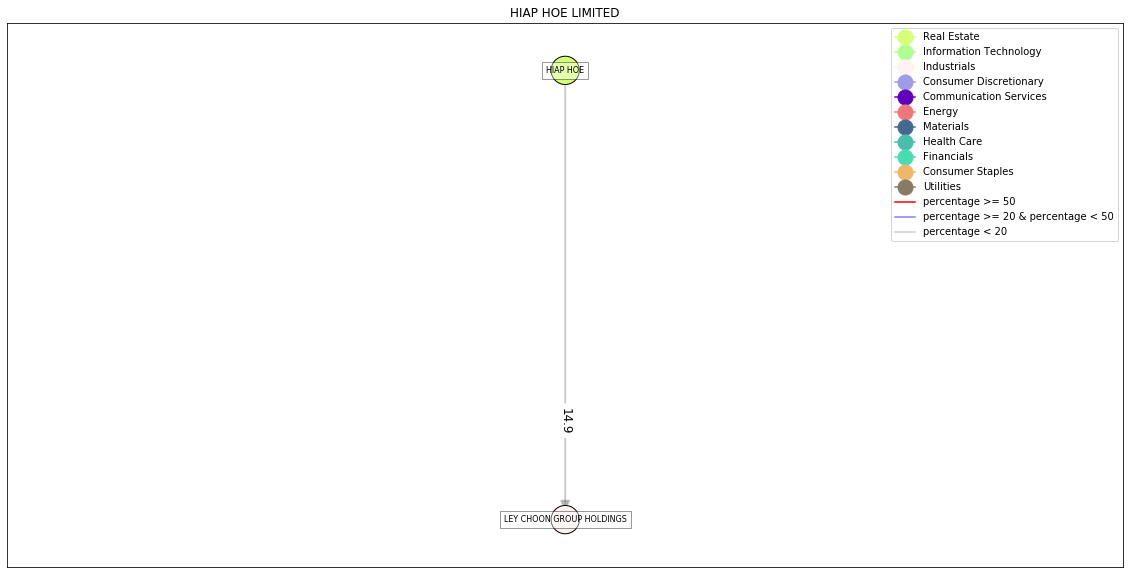

IFS CAPITAL LIMITED 0.5744680851063829
SERRANO LIMITED 0.2127659574468086
LHN LIMITED 0.2127659574468085


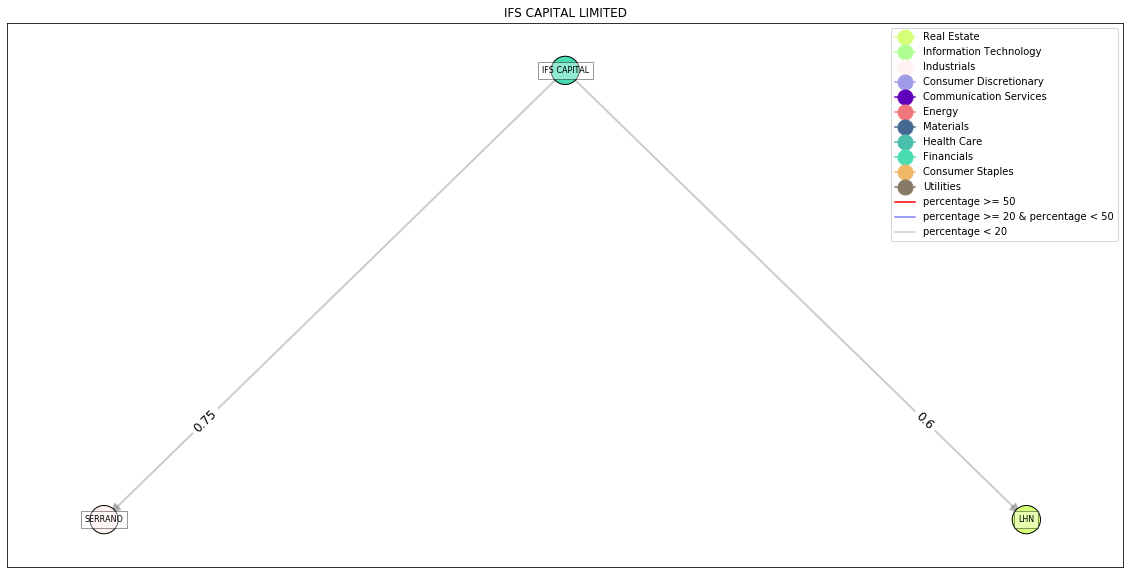

INTRACO LIMITED 0.6491228070175439
DYNAMIC COLOURS LIMITED 0.3508771929824561


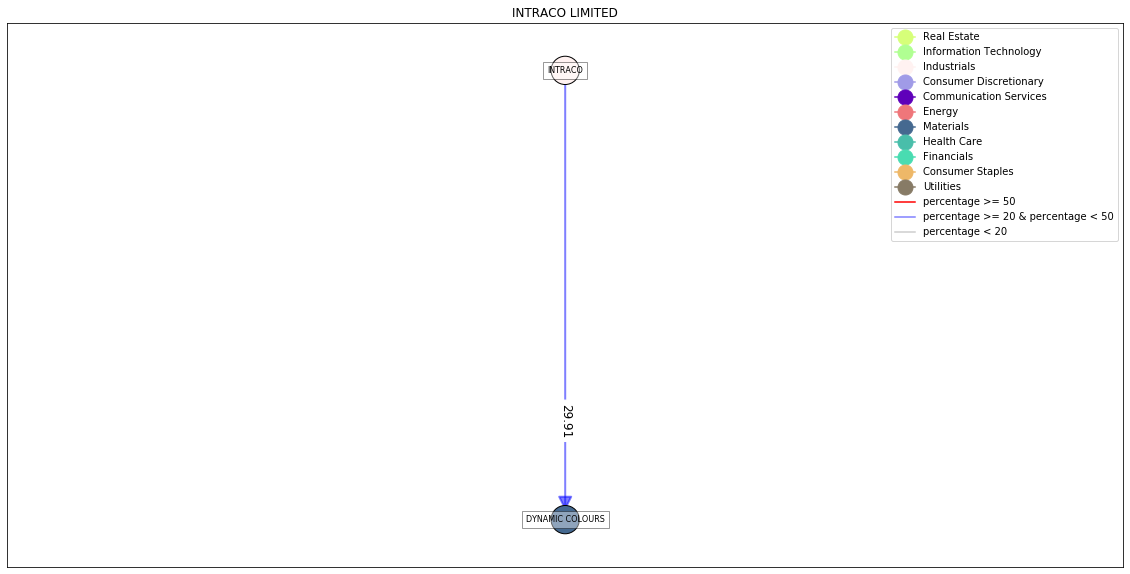

KEONG HONG HOLDINGS LIMITED 0.6491228070175439
KORI HOLDINGS LIMITED 0.3508771929824561


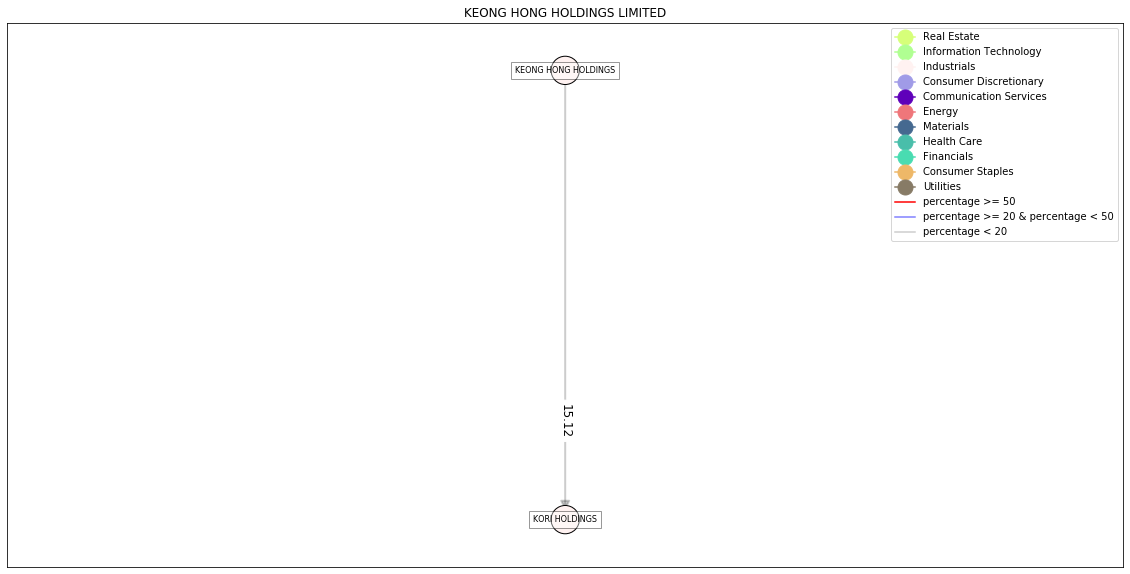

KOH BROTHERS GROUP LIMITED 0.6491228070175439
KOH BROTHERS ECO ENGINEERING LIMITED 0.3508771929824561


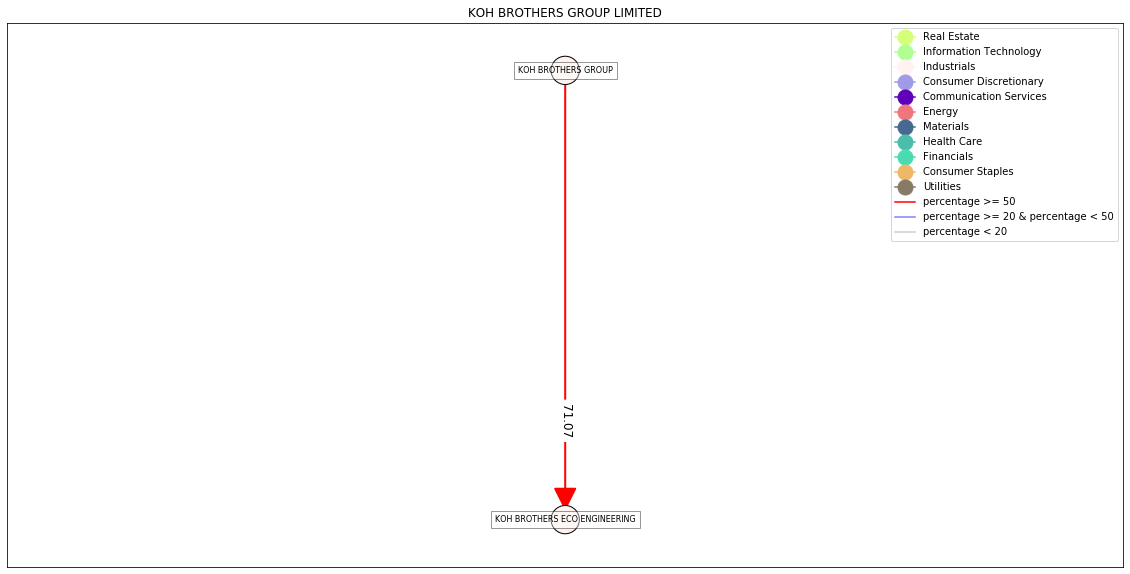

LIAN BENG GROUP LIMITED 0.6491228070175439
SLB DEVELOPMENT LIMITED 0.3508771929824561


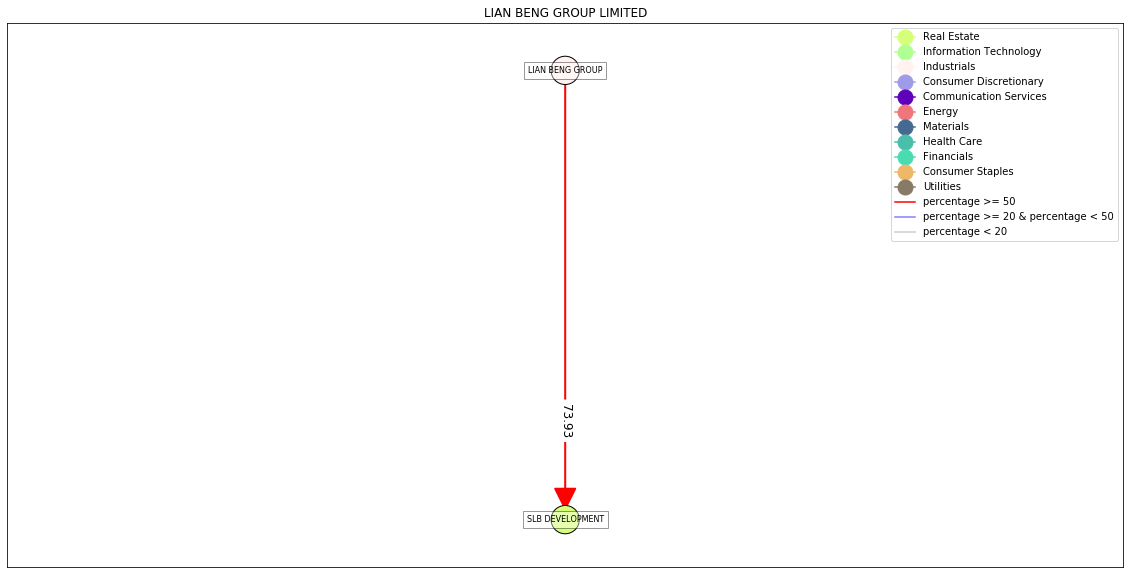

NEO GROUP LIMITED 0.6491228070175439
SINGAPORE KITCHEN EQUIPMENT LIMITED 0.3508771929824561


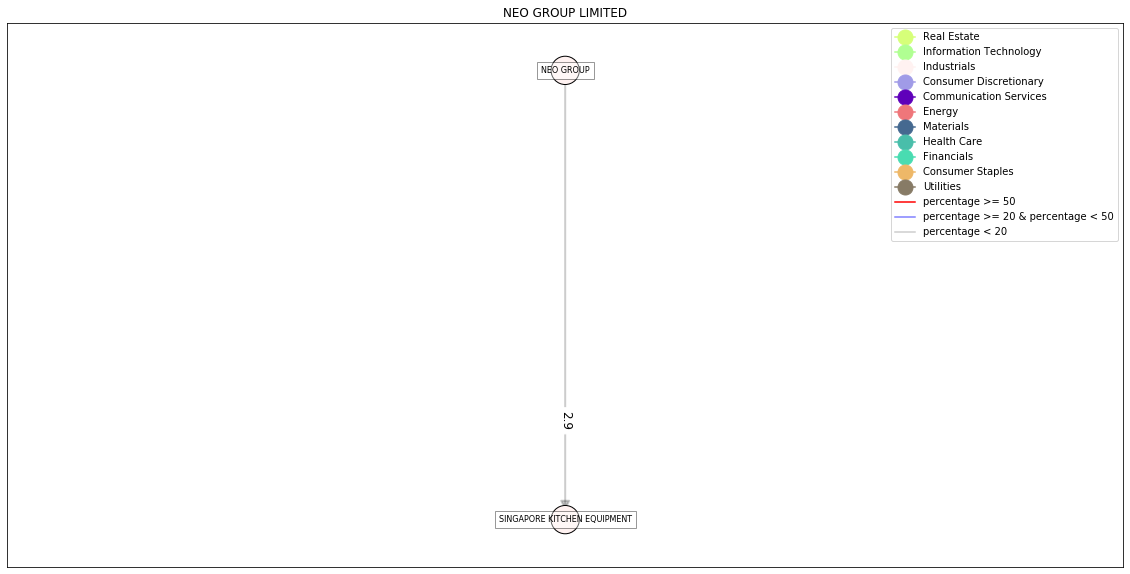

OUE LIMITED 0.5142892829991994
BOWSPRIT CAPITAL CORPORATION LIMITED 0.19213777172614047
OUE COMMERCIAL REIT MANAGEMENT PRIVATE LIMITED 0.14678647263733005
OUE LIPPO HEALTHCARE LIMITED 0.14678647263733002


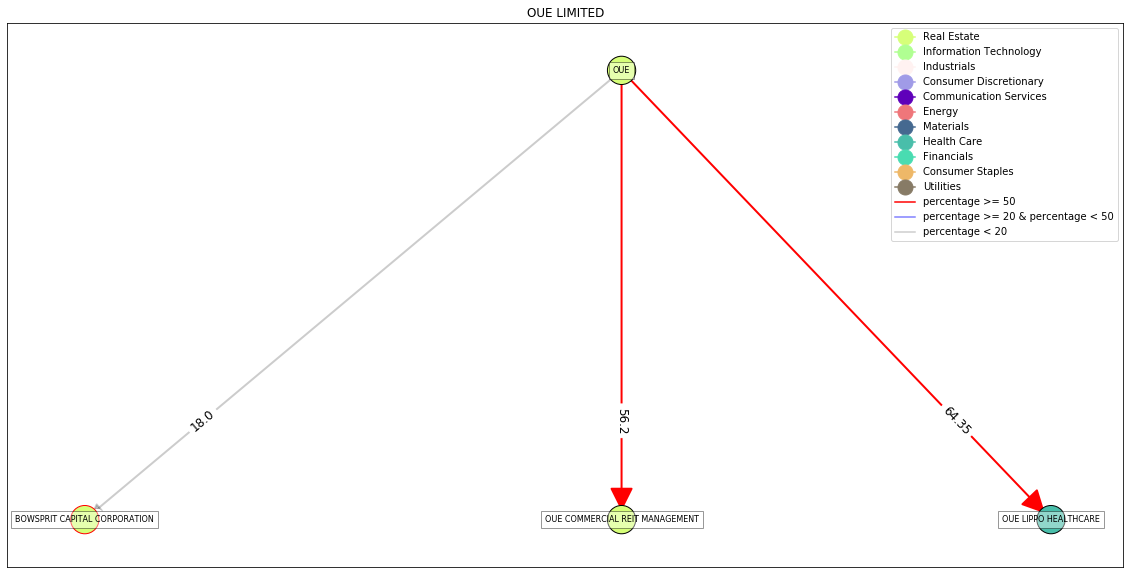

UNITED OVERSEAS BANK LIMITED 0.3082920809115937
HAW PAR CORPORATION LIMITED 0.2879321105401865
OVERSEA-CHINESE BANKING CORPORATION LIMITED 0.08560564575029024
UNITED OVERSEAS INSURANCE LIMITED 0.05829360195496301
GREAT EASTERN HOLDINGS LIMITED 0.05291036474995556
SINGAPORE PRESS HOLDINGS LIMITED 0.049425939753218774
UOL GROUP LIMITED 0.0257571798713957
SINGAPORE REINSURANCE CORPORATION LIMITED 0.02040067702452309
UNITED INDUSTRIAL CORPORATION LIMITED 0.013922799930484186
UOB-KAY HIAN HOLDINGS LIMITED 0.013922799930484163
MINDCHAMPS PRESCHOOL LIMITED 0.013922799930484163
IFAST CORPORATION LIMITED 0.013922799930484163
CHEMICAL INDUSTRIES (FAR EAST) LIMITED 0.013922799930484163
HOE LEONG CORPORATION LIMITED 0.013922799930484163
SPH REIT MANAGEMENT PRIVATE LIMITED 0.013922799930484163
HOTEL ROYAL LIMITED 0.013922799930484151


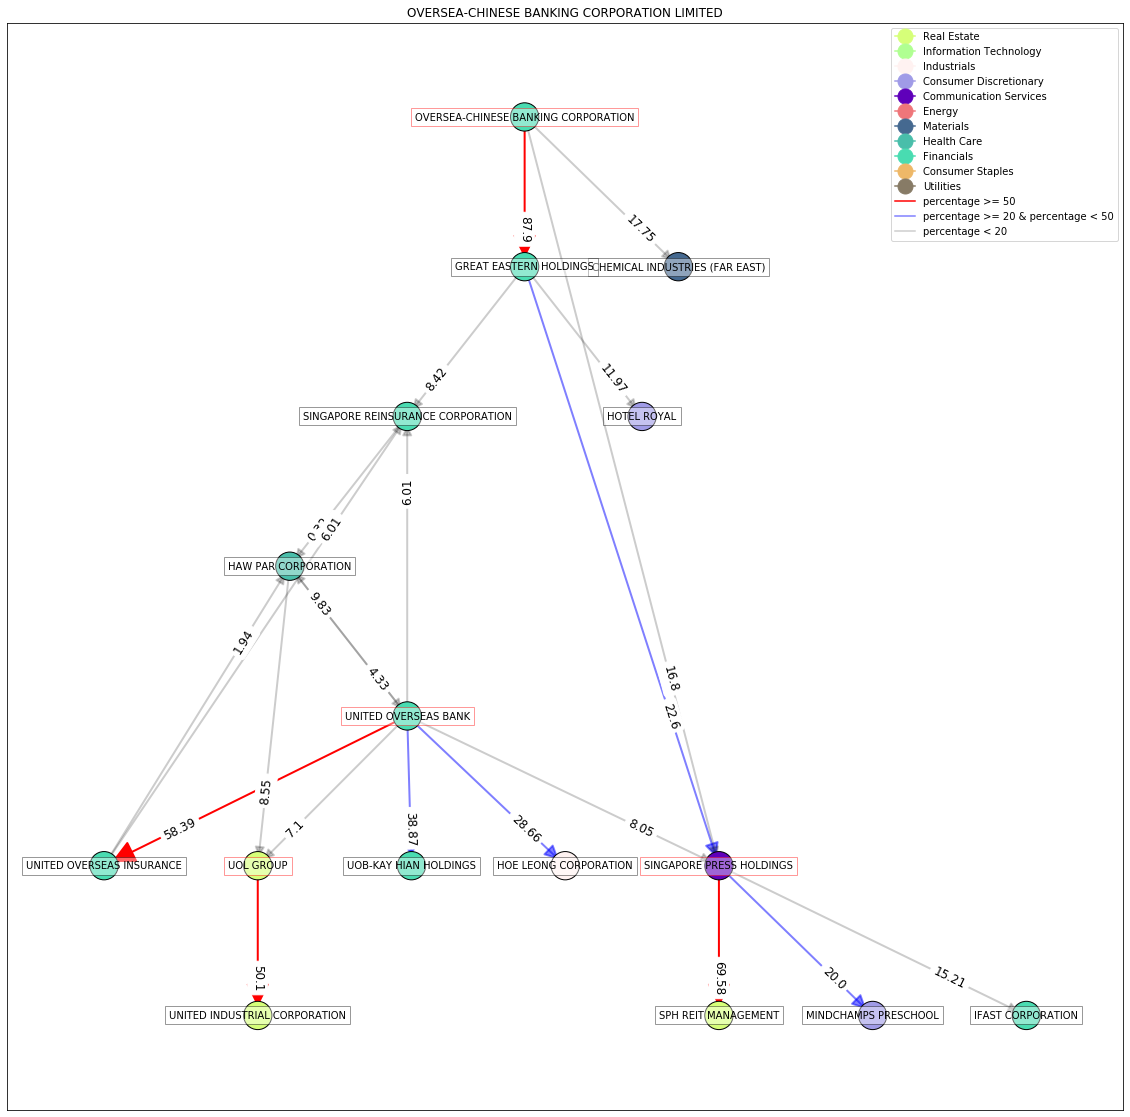

OXLEY HOLDINGS LIMITED 0.574468085106383
UNITED ENGINEERS LIMITED 0.21276595744680854
ASPEN (GROUP) HOLDINGS LIMITED 0.21276595744680854


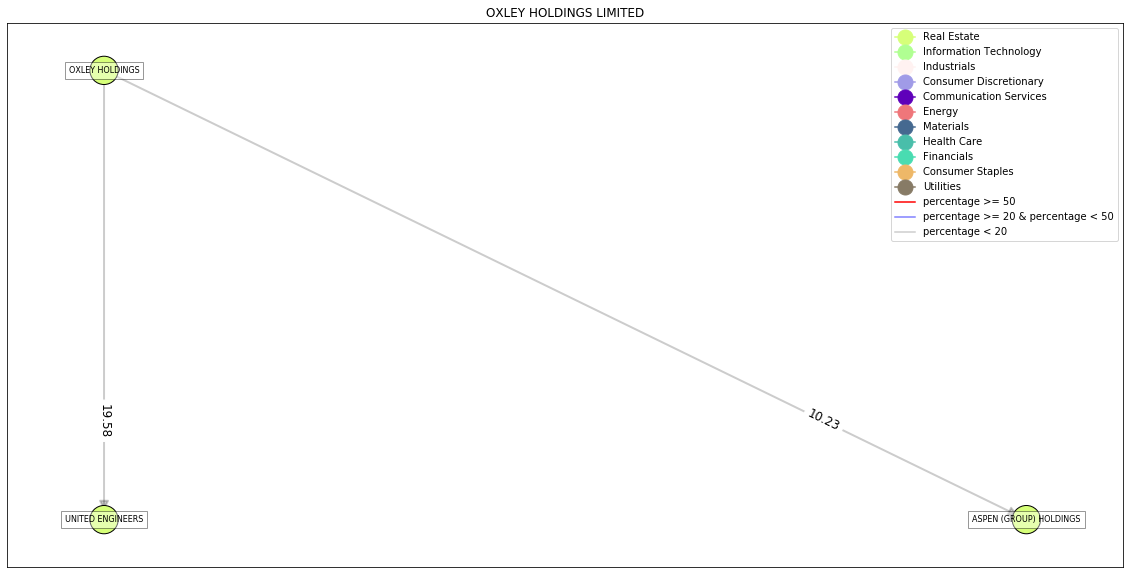

PRUDENTIAL PLC 0.4793826307302462
CAPITALAND RETAIL CHINA TRUST MANAGEMENT LIMITED 0.24187975120939884
MANULIFE US REAL ESTATE MANAGEMENT PRIVATE LIMITED 0.13936880903017757
ARA TRUST MANAGEMENT (CACHE) LIMITED 0.1393688090301774


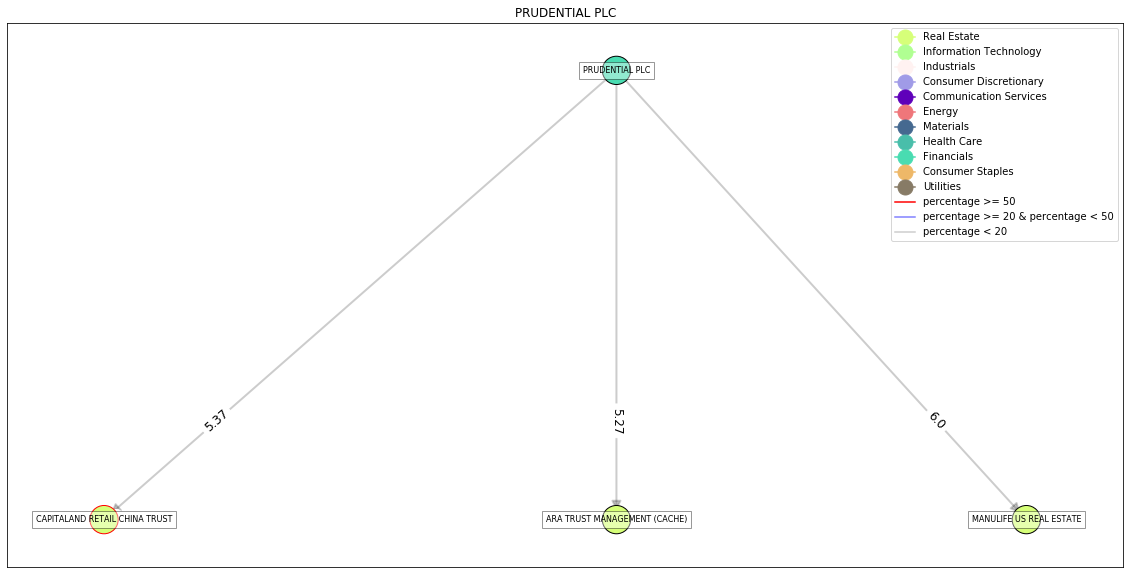

Q & M DENTAL GROUP SINGAPORE LIMITED 0.3859428967528354
GRP LIMITED 0.24595747732243373
STARLAND HOLDINGS LIMITED 0.1768790410287667
AOXIN Q & M DENTAL GRP LIMITED 0.09561029244798207
AYONDO LIMITED 0.09561029244798207


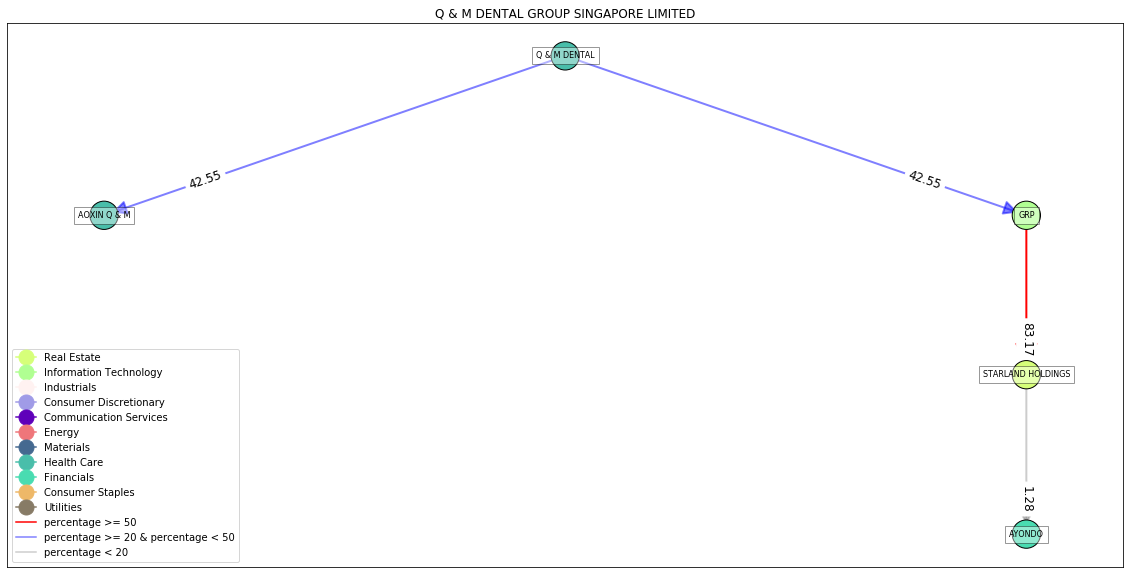

SING HOLDINGS LIMITED 0.4744121715076073
SING INVESTMENTS & FINANCE LIMITED 0.3411710465652375
HOE LEONG CORPORATION LIMITED 0.1844167819271553


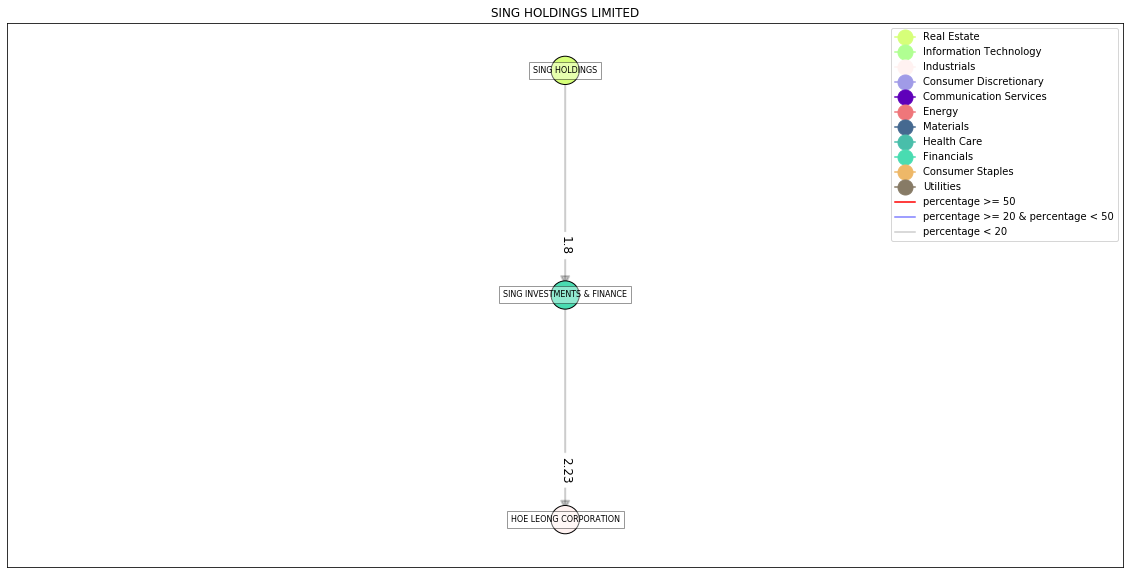

SINGAPURA FINANCE LIMITED 0.6491228070175439
SERRANO LIMITED 0.3508771929824561


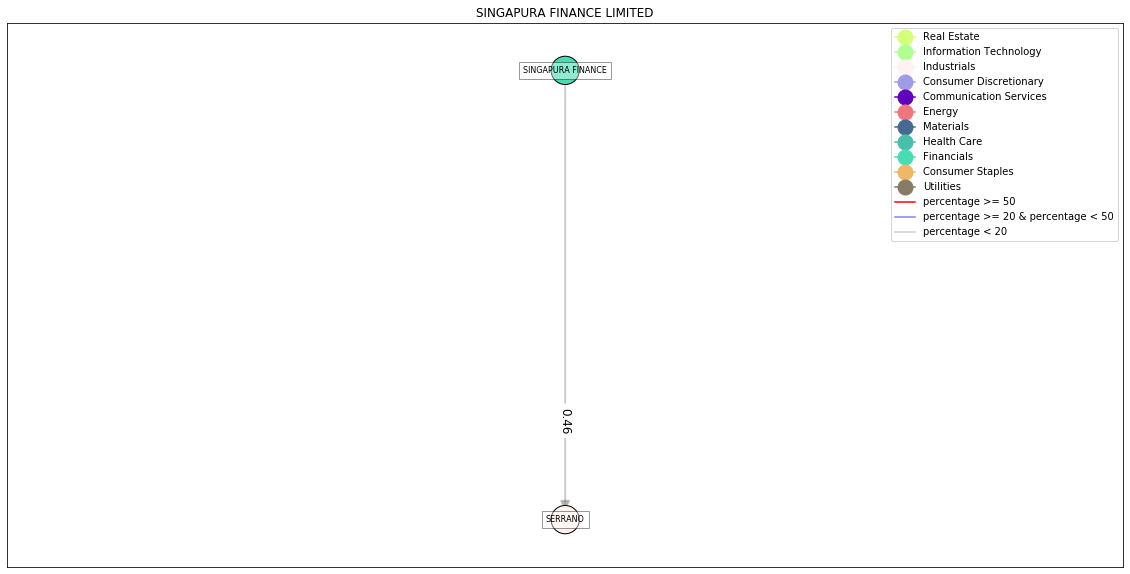

TEE INTERNATIONAL LIMITED 0.6491228070175439
TEE LAND LIMITED 0.3508771929824561


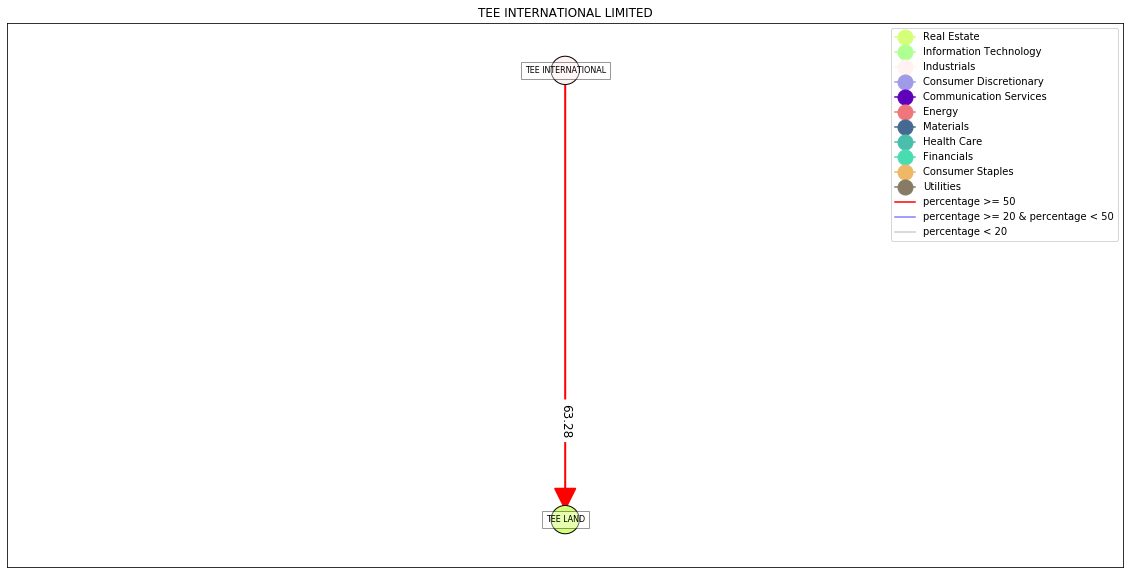

TEMASEK HOLDINGS PRIVATE LIMITED 0.3504684994181912
KEPPEL CORPORATION LIMITED 0.05109238129304231
DBS GROUP HOLDINGS LIMITED 0.0430993664022645
CAPITALAND LIMITED 0.039806298837767706
SINGAPORE TELECOMMUNICATIONS LIMITED 0.03828915706272597
SINGAPORE PRESS HOLDINGS LIMITED 0.03312580618738315
SEMBCORP INDUSTRIES LIMITED 0.02508149847094514
STARHUB LIMITED 0.02400454546958959
SINGAPORE AIRLINES LIMITED 0.01726274406948134
MM2 ASIA LIMITED 0.017262744069481334
ASCOTT RESIDENCE TRUST MANAGEMENT LIMITED 0.010765036918649268
CAPITALAND COMMERCIAL TRUST MANAGEMENT LIMITED 0.010439461237249545
CAPITALAND RETAIL CHINA TRUST MANAGEMENT LIMITED 0.010418030794390198
ASCENDAS FUNDS MANAGEMENT SINGAPORE LIMITED 0.01020916580595816
MAPLETREE NORTH ASIA COMMERCIAL TRUST MANAGEMENT LIMITED 0.01017990518709877
CAPITALAND MALL TRUST MANAGEMENT LIMITED 0.009690401325262698
MAPLETREE INDUSTRIAL TRUST MANAGEMENT LIMITED 0.00945845304415494
KEPPEL REIT MANAGEMENT LIMITED 0.009410114090450387
HL GLOBAL ENTE

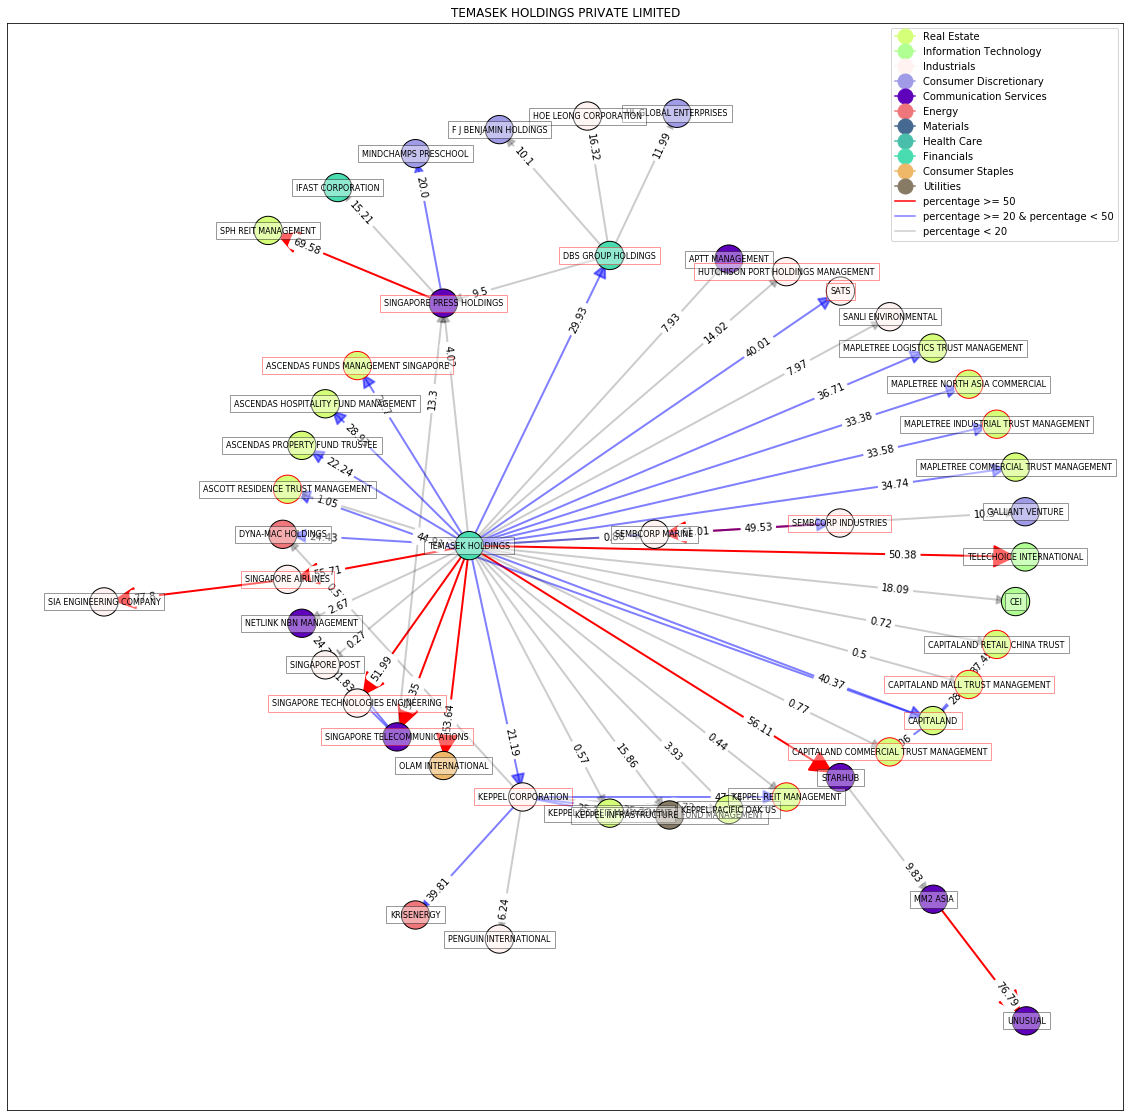

THAI BEVERAGE PUBLIC COMPANY LIMITED 0.3600771982975577
FRASERS PROPERTY LIMITED 0.2818183182789907
FRASERS COMMERCIAL ASSET MANAGEMENT LIMITED 0.08873523415310199
FRASERS CENTREPOINT ASSET MANAGEMENT LIMITED 0.07074774888225527
FRASERS HOSPITALITY ASSET MANAGEMENT PRIVATE LIMITED 0.06755421822339645
FRASERS LOGISTICS & INDUSTRIAL ASSET MANAGEMENT PRIVATE LIMITED 0.06591505094285162
FRASER AND NEAVE LIMITED 0.06515223122184631


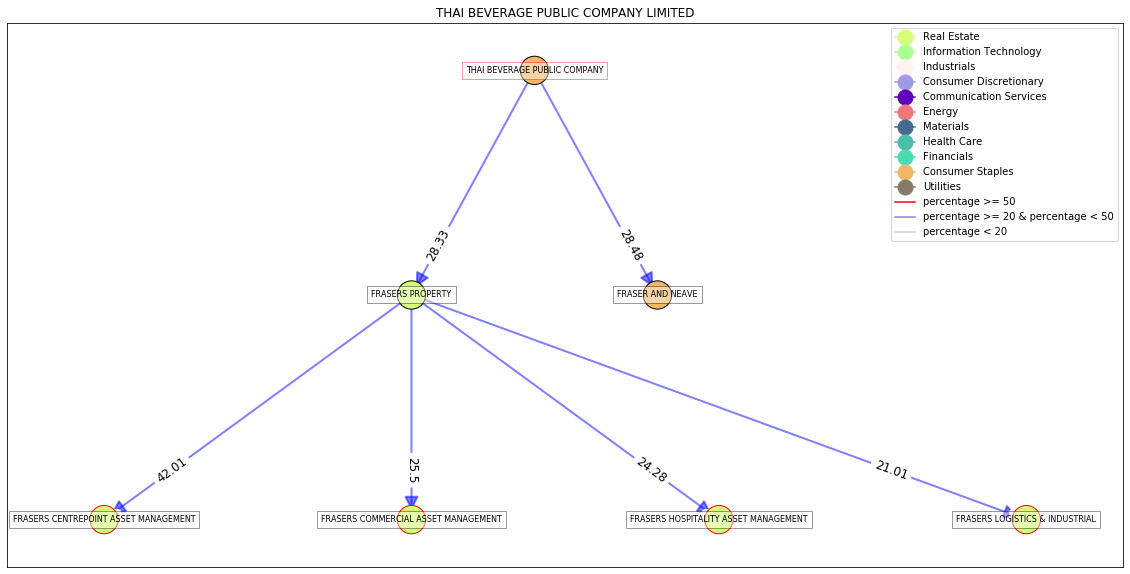

THE STRAITS TRADING COMPANY LIMITED 0.5419847328244274
ARA TRUST MANAGEMENT (SUNTEC) LIMITED 0.15267175572519082
ARA TRUST MANAGEMENT (CACHE) LIMITED 0.15267175572519082
MALAYSIA SMELTING CORP BHD 0.15267175572519082


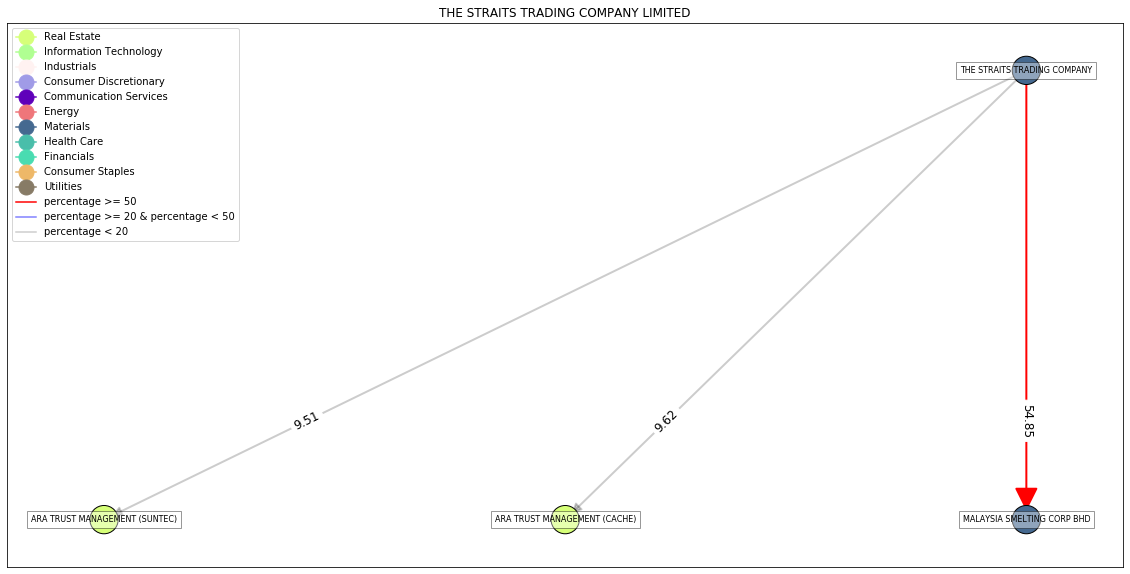

TIH LIMITED 0.6491228070175439
CEI LIMITED 0.3508771929824561


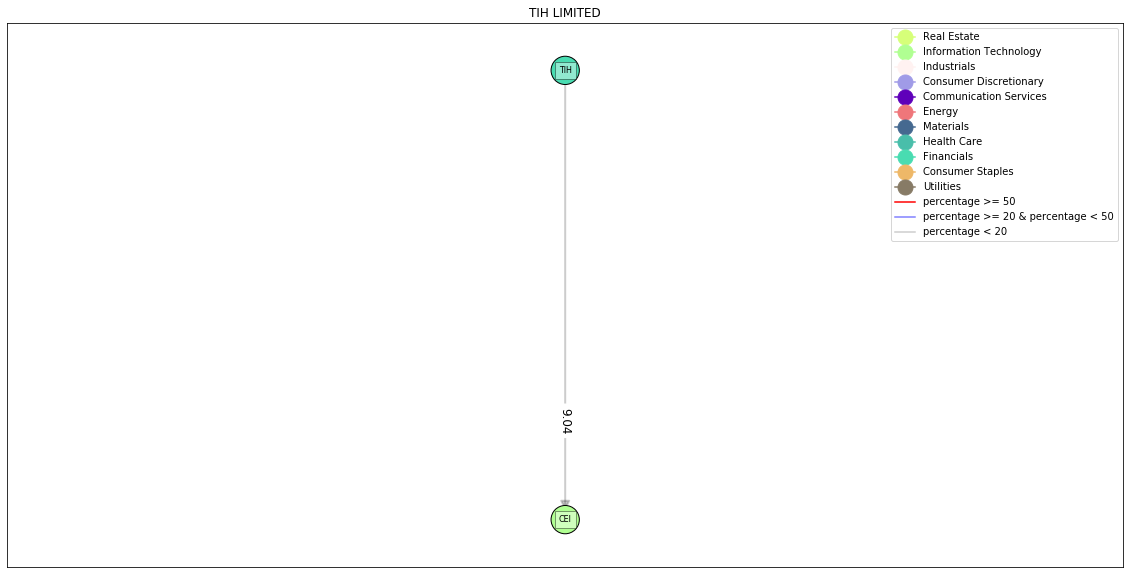

TRITECH GROUP LIMITED 0.6491228070175439
CAPITAL WORLD LIMITED 0.3508771929824561


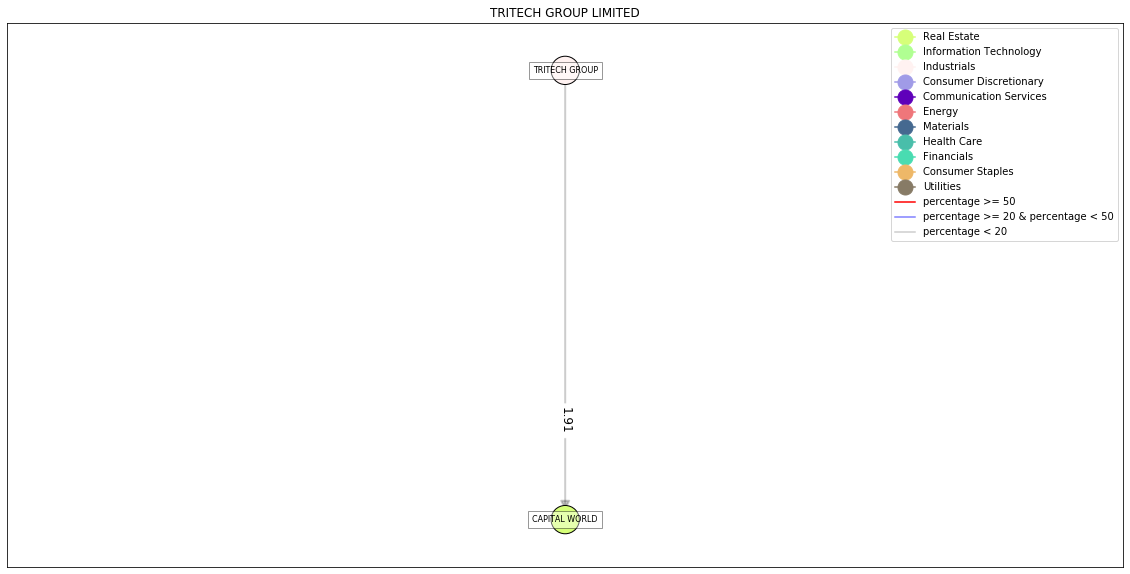

TUAN SING HOLDINGS LIMITED 0.6491228070175439
SP CORPORATION LIMITED 0.3508771929824561


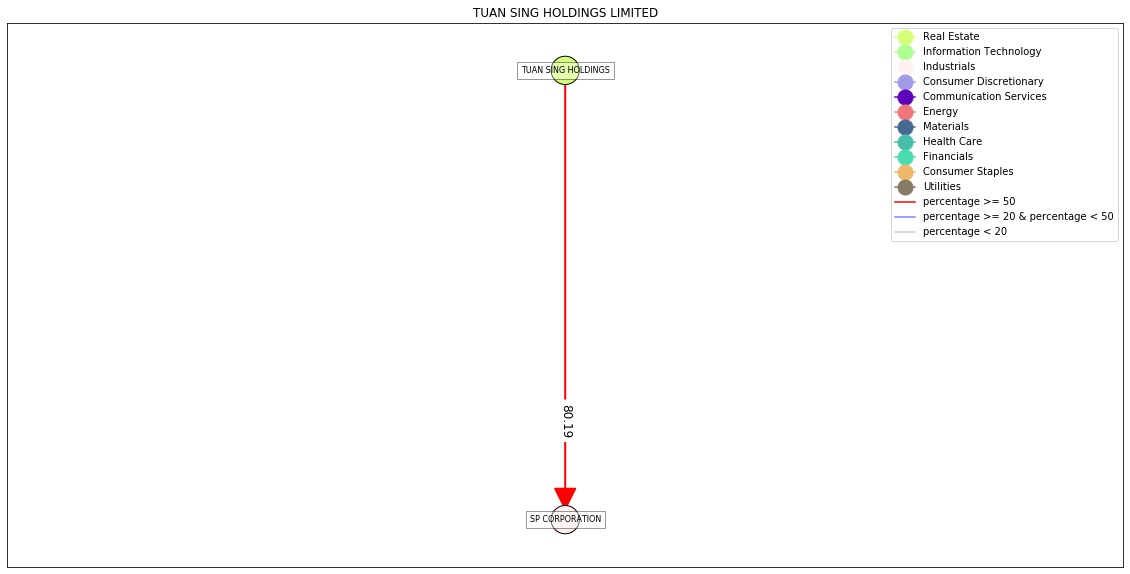

UMS HOLDINGS LIMITED 0.6491228070175439
JEP HOLDINGS LIMITED 0.3508771929824561


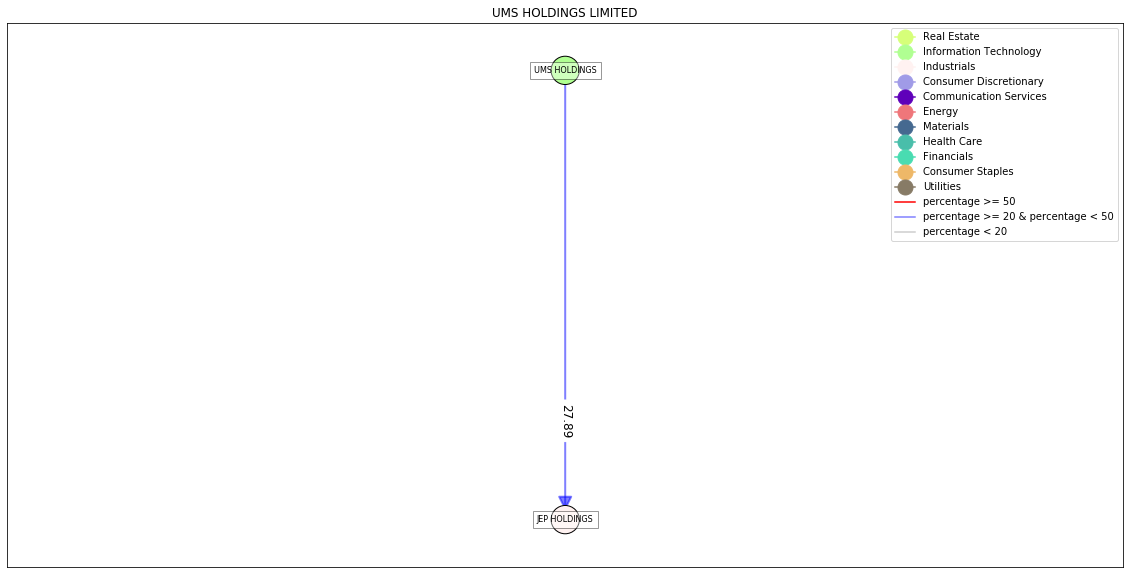

USP GROUP LIMITED 0.6491228070175439
HUAN HSIN HOLDINGS LIMITED 0.3508771929824561


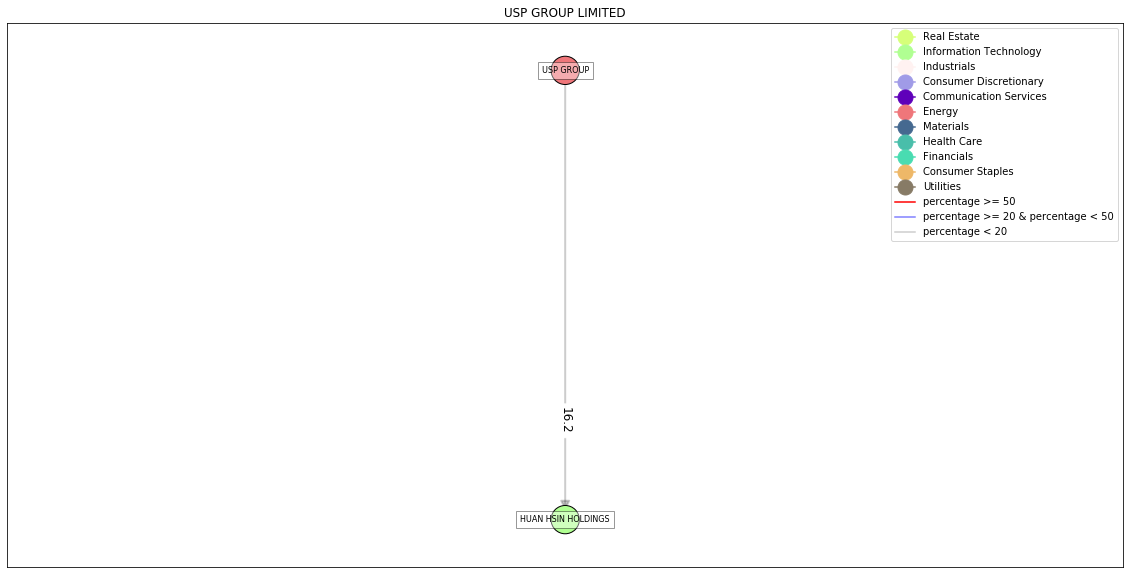

WILMAR INTERNATIONAL LIMITED 0.5744680851063829
KENCANA AGRI LIMITED 0.2127659574468086
PERENNIAL REAL ESTATE HOLDINGS LIMITED 0.2127659574468085


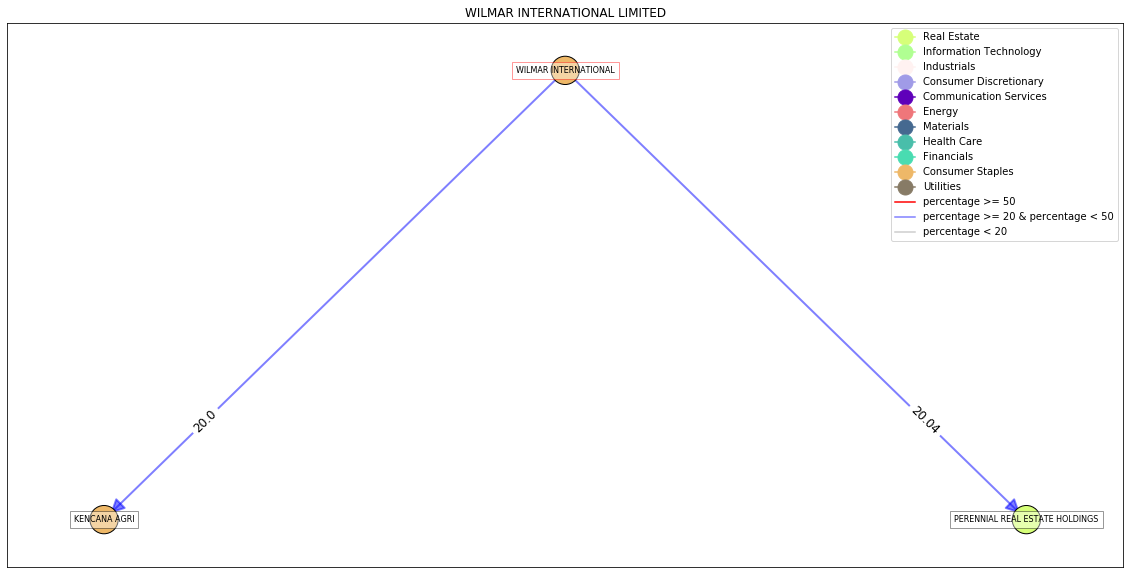

YANLORD LAND GROUP LIMITED 0.6491228070175439
UNITED ENGINEERS LIMITED 0.3508771929824561


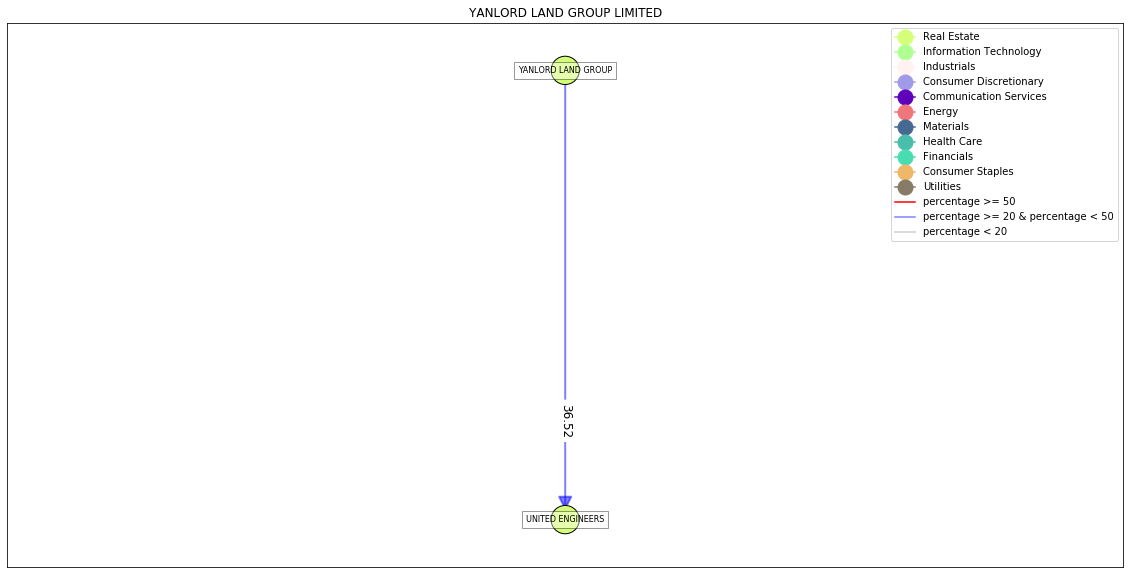

YOMA STRATEGIC HOLDINGS LIMITED 0.6491228070175439
MEMORIES GROUP LIMITED 0.3508771929824561


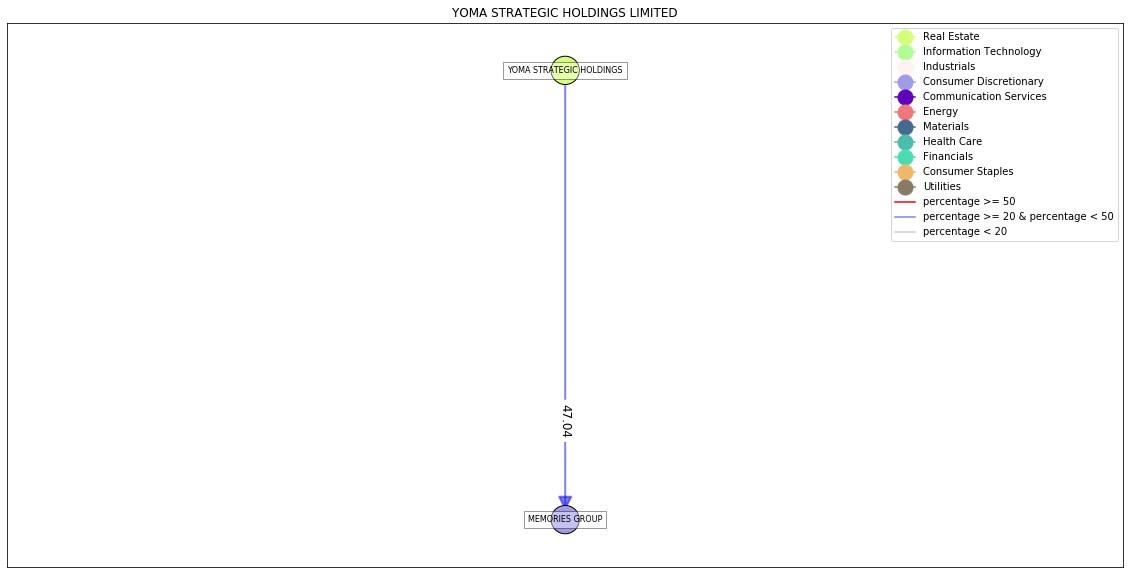

In [101]:
for node in root_nodes:
    all_desc = nx.descendants(G2,node)
#     print(all_desc)
    all_node = all_desc
    all_node.add(node)
#     print(all_node)
    
    name_list ,name_sti = sti_normal_names(all_node)
    
    short_names = shorten_names(name_list)
    short_names_sti = shorten_names(name_sti)
    
    sub_graph = G2.subgraph(all_node)
    
#     Apply page rank on reversed graph ,as the defaul page rank is a left hand eigen vector
    sub_pagerankCentrality = nx.pagerank_numpy(sub_graph.reverse(),weight = "weight")
    sorted_main_cent = dict(sorted(sub_pagerankCentrality.items(), key=lambda x: x[1],reverse=True))
    for key,cent in sorted_main_cent.items():
        print(name[key],cent)
#     d_node_sizes = [v * 10000 for v in sub_degreeCentrality.values()]
    
    sect_colors = sector_colors(sub_graph)
    outline = edge_colors(sub_graph)
            
    if len(all_node) > 20:
        plt.figure(figsize = (20,20))
        layout ="twopi"
        font_size_edge = 10
        font_size_text = 8
        offset_label = 0.22
    elif len(all_node) > 10 and len(all_node) <20:
        plt.figure(figsize = (20,20))
        layout ="dot"
        font_size_edge = 12
        font_size_text = 10
        offset_label = 0.25
    else:
        plt.figure(figsize = (20,10))   
        layout ="dot"
        font_size_edge = 12
        font_size_text = 8
        offset_label = 0.22
    
        
    subgraph_arcweight=cleaned_edges(sub_graph)
    
#     write_dot(sub_graph,'test.dot')
    pos =graphviz_layout(sub_graph, prog=layout)
    nx.draw_networkx_nodes(sub_graph,pos,node_color=sect_colors,node_size = 800,edgecolors=outline)
    
    elarge = [(u, v) for (u, v, d) in sub_graph.edges(data=True) if d['weight'] > 50]
    esmed = [(u, v) for (u, v, d) in sub_graph.edges(data=True) if d['weight'] >= 20 and d['weight'] <=50]
    esmall = [(u, v) for (u, v, d) in sub_graph.edges(data=True) if d['weight'] < 20]
    
    nx.draw_networkx_edges(sub_graph, pos, edgelist=elarge,alpha=1,arrowstyle='-|>',arrowsize=50,arrows=True,
                           width=2,edge_color='r')
    nx.draw_networkx_edges(sub_graph, pos,edgelist=esmed,alpha=0.5,arrowstyle='-|>',arrowsize=30,arrows=True,
                           width=2,edge_color='blue')
    nx.draw_networkx_edges(sub_graph, pos,edgelist=esmall,alpha=0.2,arrowstyle='-|>',arrowsize=20,arrows=True,
                           width=2,edge_color='black')

    nx.draw_networkx_edge_labels(sub_graph,pos,edge_labels=subgraph_arcweight,label_pos=offset_label,font_size=font_size_edge)
    nx.draw_networkx_labels(sub_graph,pos,labels=short_names,font_size=font_size_text,bbox=dict(facecolor="white",alpha=0.4))
    nx.draw_networkx_labels(sub_graph,pos,labels=short_names_sti,font_size=font_size_text,bbox=dict(facecolor="white",edgecolor="red",alpha=0.4))

    plt.legend(handles=final_list)
    plt.title(name[node])
    plt.savefig("./figures/tree_subgraph/"+name[node]+"_subgraph.png")
    plt.show()
    plt.close()

### Plot Cyclical Graph using intermediate nodes

In [102]:
cycles_nodes = []
for items in nx.simple_cycles(G2):
    cycles_nodes.append(items)

In [103]:
store_all = []
for cycle in cycles_nodes:
    tempset = set()
    for node in cycle:
        childs = nx.descendants(G2,node)
        tempset = tempset.union(childs)
#         print(childs)
#     print(tempset)
    if len(tempset) > 0:
        if tempset not in store_all:
            store_all.append(tempset)
print(store_all)

[{169, 329, 331, 330, 400, 286}, {582, 583, 265, 281, 604, 675, 677, 678, 681, 682, 430, 303}]


{169, 329, 331, 330, 400, 286}
JARDINE STRATEGIC HOLDINGS LIMITED 0.4729729729729728
JARDINE MATHESON HOLDINGS LIMITED 0.427027027027027
JARDINE CYCLE & CARRIAGE LIMITED 0.025000000000000085
DAIRY FARM INT'L HOLDINGS LIMITED 0.025000000000000015
MANDARIN ORIENTAL INTL LIMITED 0.025000000000000005
HONGKONG LAND HOLDINGS LIMITED 0.025000000000000005


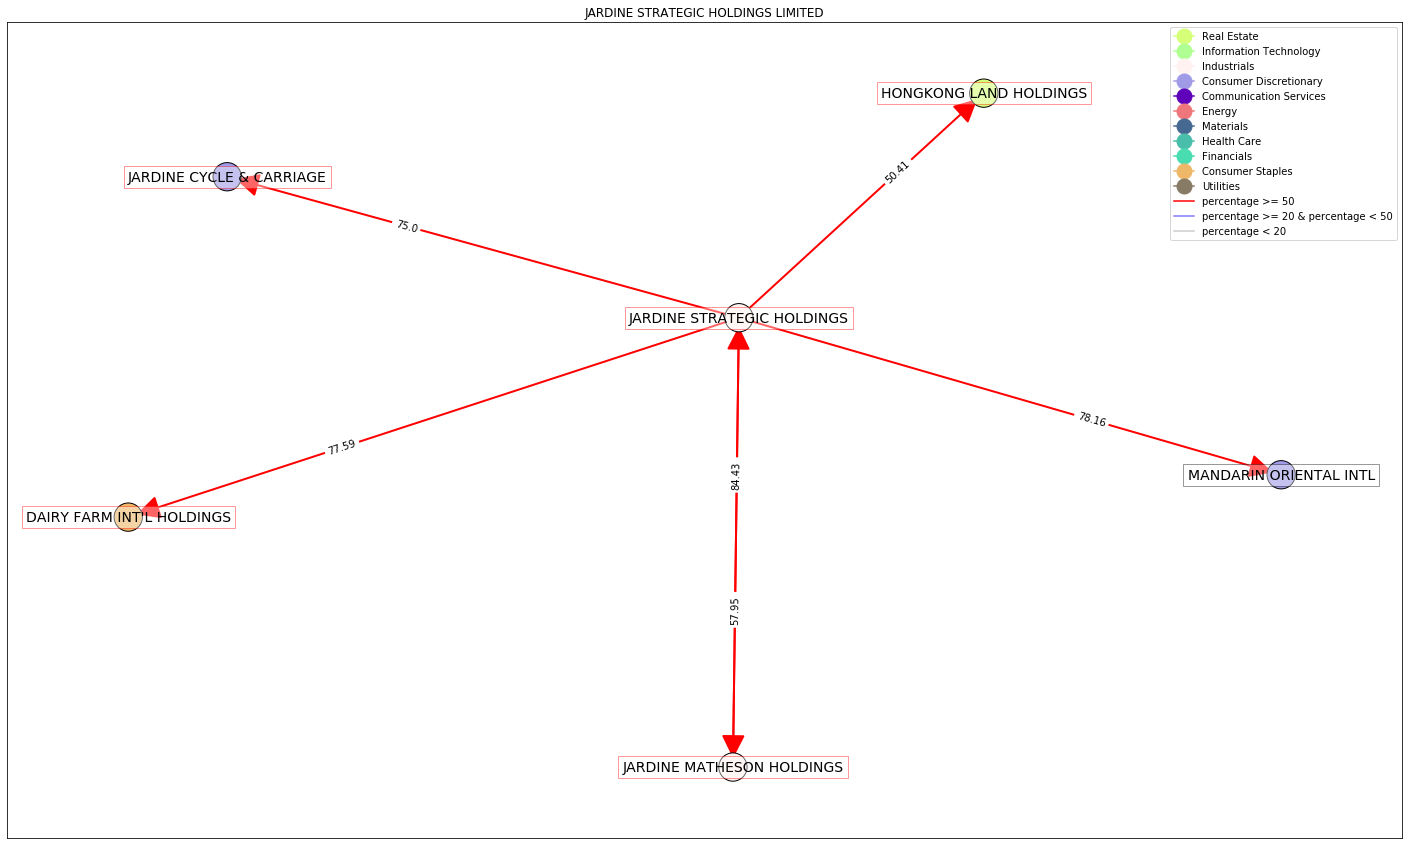

{582, 583, 265, 281, 604, 675, 677, 678, 681, 682, 430, 303}
UNITED OVERSEAS BANK LIMITED 0.40138473485872966
HAW PAR CORPORATION LIMITED 0.36441574268103855
UNITED OVERSEAS INSURANCE LIMITED 0.07100092179776349
SINGAPORE PRESS HOLDINGS LIMITED 0.044375
UOL GROUP LIMITED 0.023125000000000027
SINGAPORE REINSURANCE CORPORATION LIMITED 0.020698600662468362
UNITED INDUSTRIAL CORPORATION LIMITED 0.012500000000000008
UOB-KAY HIAN HOLDINGS LIMITED 0.012500000000000004
MINDCHAMPS PRESCHOOL LIMITED 0.012500000000000004
IFAST CORPORATION LIMITED 0.012500000000000004
HOE LEONG CORPORATION LIMITED 0.012500000000000004
SPH REIT MANAGEMENT PRIVATE LIMITED 0.012500000000000004


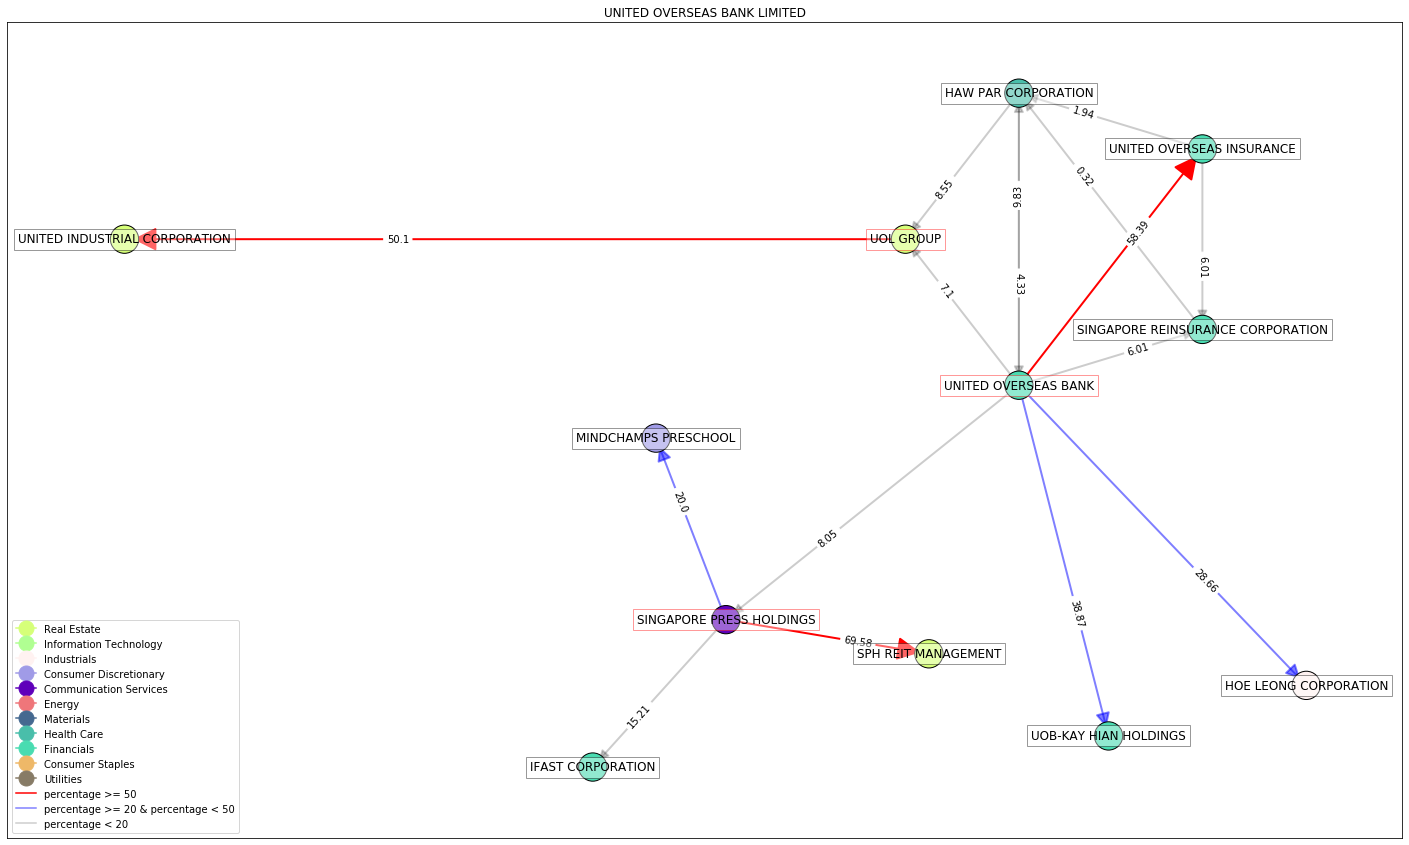

In [104]:
for node in store_all:
    all_node = node
    print(all_node)
    
    highest = 0
    highest_node = None
    for a in node:
        if G2.degree(a) > highest:
            highest = G2.out_degree(a)
            highest_node = a
            
    name_list ,name_sti = sti_normal_names(all_node)
    
    short_names = shorten_names(name_list)
    short_names_sti = shorten_names(name_sti)
    
    sub_graph = G2.subgraph(all_node)
    
    #Apply page rank on reversed graph ,as the defaul page rank is a left hand eigen vector
    sub_pageRankCentrality = nx.pagerank_numpy(sub_graph.reverse(),weight = "weight")
    sorted_main_cent = dict(sorted(sub_pageRankCentrality.items(), key=lambda x: x[1],reverse=True))
    for key,cent in sorted_main_cent.items():
        print(name[key],cent)
  
    
    sect_colors = sector_colors(sub_graph)
    plt.figure(figsize = (25,15))   
    if len(all_node) < 8:
        layout ="fdp"
        font_size_t = 14
    else:
        font_size_t = 12
        layout ="circo"
        
    subgraph_arcweight=cleaned_edges(sub_graph)
    
#     write_dot(sub_graph,'test.dot')
    outline = edge_colors(sub_graph)
    pos =graphviz_layout(sub_graph, prog=layout)
    nx.draw_networkx_nodes(sub_graph,pos,node_color=sect_colors,node_size = 800,edgecolors=outline)
    
    elarge = [(u, v) for (u, v, d) in sub_graph.edges(data=True) if d['weight'] > 50]
    esmed = [(u, v) for (u, v, d) in sub_graph.edges(data=True) if d['weight'] >= 20 and d['weight'] <=50]
    esmall = [(u, v) for (u, v, d) in sub_graph.edges(data=True) if d['weight'] < 20]
    
    nx.draw_networkx_edges(sub_graph, pos, edgelist=elarge,alpha=1,arrowstyle='-|>',arrowsize=50,arrows=True,
                           width=2,edge_color='r')
    nx.draw_networkx_edges(sub_graph, pos,edgelist=esmed,alpha=0.5,arrowstyle='-|>',arrowsize=30,arrows=True,
                           width=2,edge_color='blue')
    nx.draw_networkx_edges(sub_graph, pos,edgelist=esmall,alpha=0.2,arrowstyle='-|>',arrowsize=20,arrows=True,
                           width=2,edge_color='black')

    nx.draw_networkx_edge_labels(sub_graph,pos,edge_labels=subgraph_arcweight,label_pos=0.35)
    nx.draw_networkx_labels(sub_graph,pos,labels=short_names,font_size=font_size_t,bbox=dict(facecolor="white",alpha=0.4))
    nx.draw_networkx_labels(sub_graph,pos,labels=short_names_sti,font_size=font_size_t,bbox=dict(facecolor="white",edgecolor="red",alpha=0.4))

    plt.legend(handles=final_list)
    plt.title(name[highest_node])
    plt.savefig("./figures/cyclical_hybrid_subgraph/"+name[highest_node]+"_subgraph.png")
    plt.show()
    plt.close('all')

### Plotting OCBC Seperately
As OCBC's descendants consist of the UOB cluster due to UOB cyclical structure, we need to manually spilt the OCBC graph

In [105]:
uob = 677
ocbc = 480


uob_des = nx.descendants(G2,uob)
ocbc_des = nx.descendants(G2,ocbc)
uob_des.add(uob)
ocbc_des.add(ocbc)

ocbc_sub = ocbc_des.difference(uob_des)
SPH_desc = nx.descendants(G2,582)
print(ocbc_sub)
tot_nodes = list(ocbc_sub)

tot_nodes.append(ocbc)
tot_nodes.append(583)
tot_nodes.append(582)
for item in SPH_desc:
    tot_nodes.append(item)



{480, 291, 251, 119}


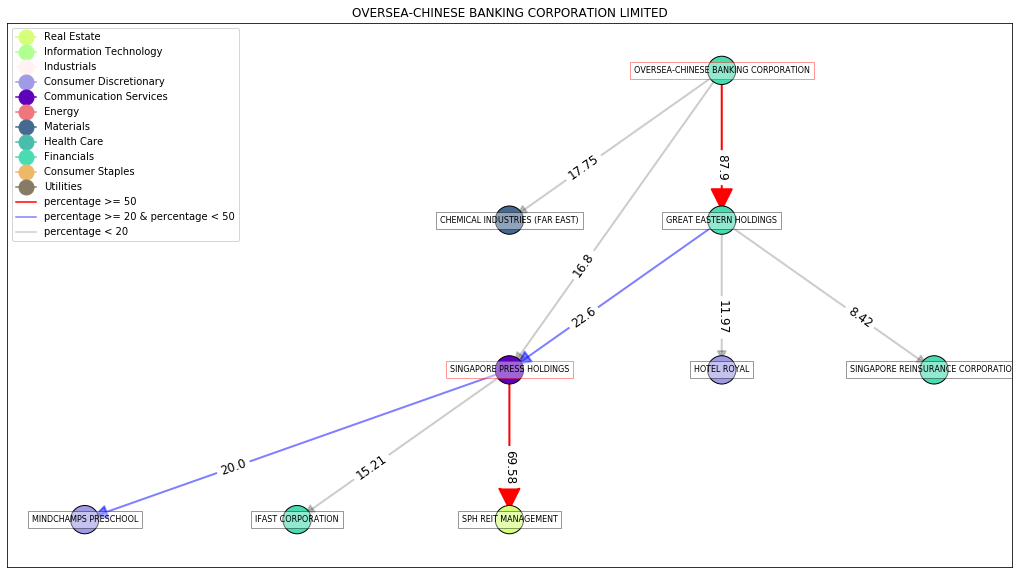

In [106]:
plt.figure(figsize=(18,10))
total =tot_nodes
name_list ,name_sti = sti_normal_names(total)

short_names = shorten_names(name_list)
short_names_sti = shorten_names(name_sti)


SPH = G2.subgraph(total)
sect_colors = sector_colors(SPH)
subgraph_arcweight=cleaned_edges(SPH)
pos =graphviz_layout(SPH, prog='dot')
nx.draw_networkx_nodes(SPH,pos,node_size=800,node_color=sect_colors,edgecolors="black")
elarge = [(u, v) for (u, v, d) in SPH.edges(data=True) if d['weight'] > 50]
esmed = [(u, v) for (u, v, d) in SPH.edges(data=True) if d['weight'] >= 20 and d['weight'] <=50]
esmall = [(u, v) for (u, v, d) in SPH.edges(data=True) if d['weight'] < 20]

nx.draw_networkx_edges(SPH, pos, edgelist=elarge,alpha=1,arrowstyle='-|>',arrowsize=50,arrows=True,
                       width=2,edge_color='r')
nx.draw_networkx_edges(SPH, pos,edgelist=esmed,alpha=0.5,arrowstyle='-|>',arrowsize=30,arrows=True,
                       width=2,edge_color='blue')
nx.draw_networkx_edges(SPH, pos,edgelist=esmall,alpha=0.2,arrowstyle='-|>',arrowsize=20,arrows=True,
                       width=2,edge_color='black')

nx.draw_networkx_edge_labels(SPH,pos,edge_labels=subgraph_arcweight,label_pos=0.35,font_size=12)
nx.draw_networkx_labels(SPH,pos,font_size=8,labels=short_names,bbox=dict(facecolor="white",alpha=0.4))
nx.draw_networkx_labels(SPH,pos,font_size=8,labels=short_names_sti,bbox=dict(facecolor="white",edgecolor="red",alpha=0.4))

plt.legend(handles=final_list)
plt.title(name[ocbc])
plt.savefig("./figures/"+name[ocbc]+"_subgraph.png")
plt.show()
plt.close()

### Finding the structure of Singapore Press Holdings
As SPH has the highest in degrees,we would like to look at its structure

HAW PAR CORPORATION LIMITED 0.16537050991769886
UNITED OVERSEAS BANK LIMITED 0.16304712318108722
UNITED OVERSEAS INSURANCE LIMITED 0.12083261870294083
SINGAPORE REINSURANCE CORPORATION LIMITED 0.11913845084859978
SINGAPORE PRESS HOLDINGS LIMITED 0.11756246767944868
SPH REIT MANAGEMENT PRIVATE LIMITED 0.08883391249143487
MINDCHAMPS PRESCHOOL LIMITED 0.04155425722456767
GREAT EASTERN HOLDINGS LIMITED 0.038525712265362146
IFAST CORPORATION LIMITED 0.03698649706465856
SINGAPORE TELECOMMUNICATIONS LIMITED 0.034074324611379776
DBS GROUP HOLDINGS LIMITED 0.029109746510735182
OVERSEA-CHINESE BANKING CORPORATION LIMITED 0.022482189751043255
TEMASEK HOLDINGS PRIVATE LIMITED 0.022482189751043213


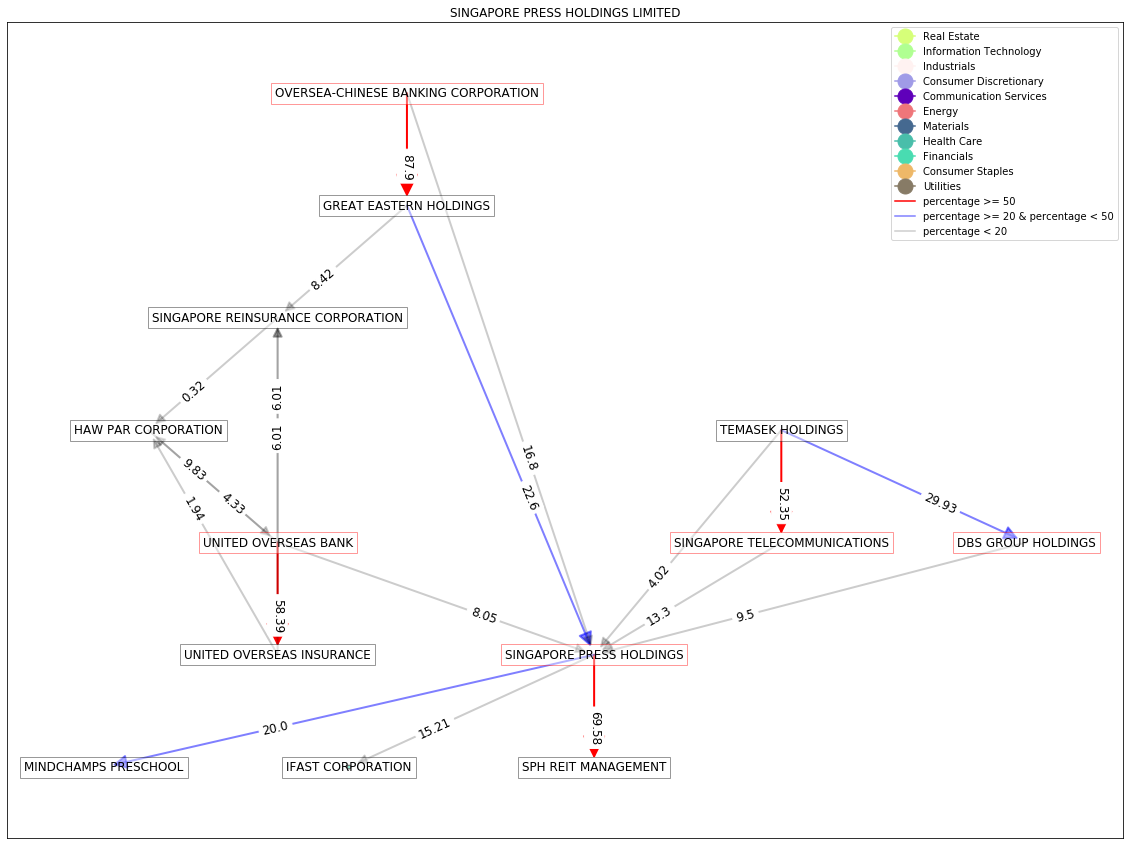

In [107]:
item_id = 582
plt.figure(figsize=(20,15))
anc =nx.ancestors(G2,item_id)
desc =nx.descendants(G2,item_id)
total = anc.union(desc,{item_id})

name_list ,name_sti = sti_normal_names(total)

short_names = shorten_names(name_list)
short_names_sti = shorten_names(name_sti)


SPH = G2.subgraph(total)

# Page Rank using Left hand ,check in degrees
sub_pagerankCentrality = nx.pagerank_numpy(SPH)
sorted_main_cent = dict(sorted(sub_pagerankCentrality.items(), key=lambda x: x[1],reverse=True))
for key,cent in sorted_main_cent.items():
    print(name[key],cent)
d_node_sizes = [v * 10000 for v in sub_degreeCentrality.values()]

sect_colors = sector_colors(SPH)
subgraph_arcweight=cleaned_edges(SPH)
pos =graphviz_layout(SPH, prog='dot')
nx.draw_networkx_nodes(SPH,pos,node_size = d_node_sizes ,node_color=sect_colors,edgecolors="black")
elarge = [(u, v) for (u, v, d) in SPH.edges(data=True) if d['weight'] > 50]
esmed = [(u, v) for (u, v, d) in SPH.edges(data=True) if d['weight'] >= 20 and d['weight'] <=50]
esmall = [(u, v) for (u, v, d) in SPH.edges(data=True) if d['weight'] < 20]

nx.draw_networkx_edges(SPH, pos, edgelist=elarge,alpha=1,arrowstyle='-|>',arrowsize=50,arrows=True,
                       width=2,edge_color='r')
nx.draw_networkx_edges(SPH, pos,edgelist=esmed,alpha=0.5,arrowstyle='-|>',arrowsize=30,arrows=True,
                       width=2,edge_color='blue')
nx.draw_networkx_edges(SPH, pos,edgelist=esmall,alpha=0.2,arrowstyle='-|>',arrowsize=20,arrows=True,
                       width=2,edge_color='black')

nx.draw_networkx_edge_labels(SPH,pos,edge_labels=subgraph_arcweight,label_pos=0.35,font_size=12)
nx.draw_networkx_labels(SPH,pos,font_size=12,labels=short_names,bbox=dict(facecolor="white",alpha=0.4))
nx.draw_networkx_labels(SPH,pos,font_size=12,labels=short_names_sti,bbox=dict(facecolor="white",edgecolor="red",alpha=0.4))

plt.legend(handles=final_list)
plt.title(name[item_id])
plt.savefig("./figures/"+name[item_id]+"_subgraph.png")
plt.show()
plt.close()